In [1]:
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyranges as pr
import glob as glob
import os
from importlib import reload
%matplotlib inline
import sys
sys.path.append("modules")
import bedgraph_tools as bgt
import peak_tools as pkt
from collections import defaultdict
import pyBigWig as pw
from matplotlib_venn import venn2
import pysam
from itertools import groupby
from Bio import motifs
import logomaker
from Bio import Align
from Bio.Seq import Seq
%config InlineBackend.figure_format='retina'
import matplotlib
from scipy import stats
from scipy.interpolate import interp1d
matplotlib.rcParams['pdf.fonttype'] = 42
nmeta = pd.read_parquet('sample_metadata_20250211.parquet')
import matplotlib.colors as mcolors
import upsetplot
from scipy.ndimage import uniform_filter


In [2]:
metadata = pd.read_parquet('sample_metadata_20250211.parquet')

In [3]:
t = metadata.filter(regex='nmumg', axis=0).filter(regex='ar|gr|pr', axis=0).filter(regex='lbd|dbd', axis=0).loc[:, 'peaks_w_summits']
nmumg_fimo = sorted(glob.glob('combined_threshed_peaks_wsummits/output_fimo_fasta_*'))
arr = np.array(list((pd.Index(nmumg_fimo).str.split('output_fimo_fasta_').str[1].str.split('_fc10_'))))

pivoted = pd.DataFrame((arr[:,0], arr[:, 1], nmumg_fimo)).T\
.pivot(index=0, columns=1, values=2)\
.rename_axis(None, axis=1)\
.rename_axis('index', axis=0)

In [4]:
# t = t.drop(['nmumg_mar_wt', 'nmumg_mar_wt_lig'])

In [5]:
nmummg_wtlig_mot_locs = pivoted
md = {'smad1':'SMAD1', 'hgr':'GR', 'mar':'AR', 'hpr':'PR', 'ar':'AR', 'pr':'PR', 'gr':'GR'}

mot_num_table = defaultdict(list)
peak_shape = dict()
for key, value in t.to_dict().items():
    print(key)
    if key == 'nmumg_smad1':
        key = 'nmumg_smad1_bmp_high'
    clocs = nmummg_wtlig_mot_locs.filter(regex=md[key.split('_')[1]]).loc[key]
    lpeak = pr.read_bed(value)
    peak_shape[key] = len(lpeak)
    clocs = clocs.fillna('combined_threshed_peaks_wsummits/output_fimo_fasta_nmumg_smad1_bmp_high_fc10_SMAD1_HNF_mot')
    for cmot, cloc in clocs.reset_index().values:
        loaded_loc = pr.read_gff3(cloc + '/fimo.gff')
        mot_num_table[key].append((cmot, lpeak.join(loaded_loc).cluster().Cluster.max()))

nmumg_ar_dlbd_dn100


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curr

nmumg_ar_dlbd_dn150


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curr

nmumg_ar_dlbd_dn200


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curr

nmumg_gr_dlbd_dn100


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curr

nmumg_hgr_dbd


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curr

nmumg_hgr_dlbd


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curr

nmumg_hgr_dlbd_dn150


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curr

nmumg_hgr_dlbd_dn250


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curr

nmumg_hgr_dlbd_dn300


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curr

nmumg_hgr_dlbd_dn400


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curr

nmumg_hgr_dlbd_dn50


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curr

nmumg_hpr_dbd


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curr

nmumg_hpr_del_lbd


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curr

nmumg_hpr_dlbd_dn100


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curr

nmumg_hpr_dlbd_dn300


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curr

nmumg_hpr_dlbd_dn450


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curr

nmumg_mar_dbd


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curr

nmumg_mar_dlbd


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curr

nmumg_mar_dlbd_dn300


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curr

nmumg_mar_dlbd_dn350


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curr

nmumg_mar_dlbd_dn400


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curr

nmumg_mar_dlbd_dn450


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curr

In [6]:

motn_Df = pd.DataFrame(mot_num_table).T.unstack().reset_index().drop('level_0', axis=1)
motn_Df.loc[:, 'mot_source'] = motn_Df.loc[:, 0].apply(lambda x: x[0])
motn_Df.loc[:, 'mot_len'] = motn_Df.loc[:, 0].apply(lambda x: x[1])
mot_table = motn_Df.drop(0, axis=1).pivot(index='level_1', columns='mot_source', values='mot_len')
motn_Df = pd.concat([motn_Df.set_index('level_1') , pd.DataFrame(peak_shape, index=['num_peaks']).T.loc[motn_Df.set_index('level_1').index]], axis=1).reset_index()
motn_Df.loc[:, 'type'] = motn_Df.mot_source.apply(lambda x: x.split('_')[1])

In [7]:
order_ar = ['nmumg_mar_dlbd', 'nmumg_ar_dlbd_dn100', 'nmumg_ar_dlbd_dn150', 'nmumg_ar_dlbd_dn200',
        'nmumg_mar_dlbd_dn300',
       'nmumg_mar_dlbd_dn350', 'nmumg_mar_dlbd_dn400', 'nmumg_mar_dlbd_dn450','nmumg_mar_dbd',]
order_pr = ['nmumg_hpr_del_lbd', 'nmumg_hpr_dlbd_dn100',
       'nmumg_hpr_dlbd_dn300', 'nmumg_hpr_dlbd_dn450', 'nmumg_hpr_dbd', ]
order_gr = ['nmumg_hgr_dlbd', 'nmumg_hgr_dlbd_dn50','nmumg_gr_dlbd_dn100', 
       'nmumg_hgr_dlbd_dn150', 'nmumg_hgr_dlbd_dn250', 'nmumg_hgr_dlbd_dn300', 'nmumg_hgr_dbd','nmumg_hgr_dlbd_dn400']

In [8]:
nmotsnmumg = motn_Df.\
set_index('mot_source').\
set_index('level_1').filter(regex='nmumg', axis=0)
nmotsnmumg.loc[:, 'frac'] = (nmotsnmumg.mot_len / nmotsnmumg.num_peaks).values
nmotsnmumg = nmotsnmumg.reset_index()
nmotsnmumg.loc[:, 'tf'] = nmotsnmumg.iloc[:,0].apply(lambda x: x.split('ar_')[-1])
nmotsnmumg = nmotsnmumg.set_index('level_1').loc[order_ar+order_pr+order_gr]
# fig, ax = plt.subplots(1, figsize=(7,2))
# sns.swarmplot(data=nmotsnmumg.set_index('level_1'), x='type', y='frac', c='lightgray', edgecolor='k', linewidth=1, hue='tf')
# ax.scatter(data=nmotsnmumg.set_index('level_1').loc[:, ['type', 'frac']].groupby('type').mean().reset_index(), x='type', y='frac', zorder=20, s=100, c='purple', ec='k')
# fig.savefig('figures/Fig1/peaks_mots_enrich.pdf')

In [9]:
labels_ar = ['nmumg_mar_dlbd', 'nmumg_ar_dlbd_dn100', 'nmumg_ar_dlbd_dn150',
       'nmumg_ar_dlbd_dn200', 'nmumg_mar_dlbd_dn300', 'nmumg_mar_dlbd_dn350',
       'nmumg_mar_dlbd_dn400', 'nmumg_mar_dlbd_dn450', 'nmumg_mar_dbd']

/tmp/ipykernel_4140466/2025249943.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


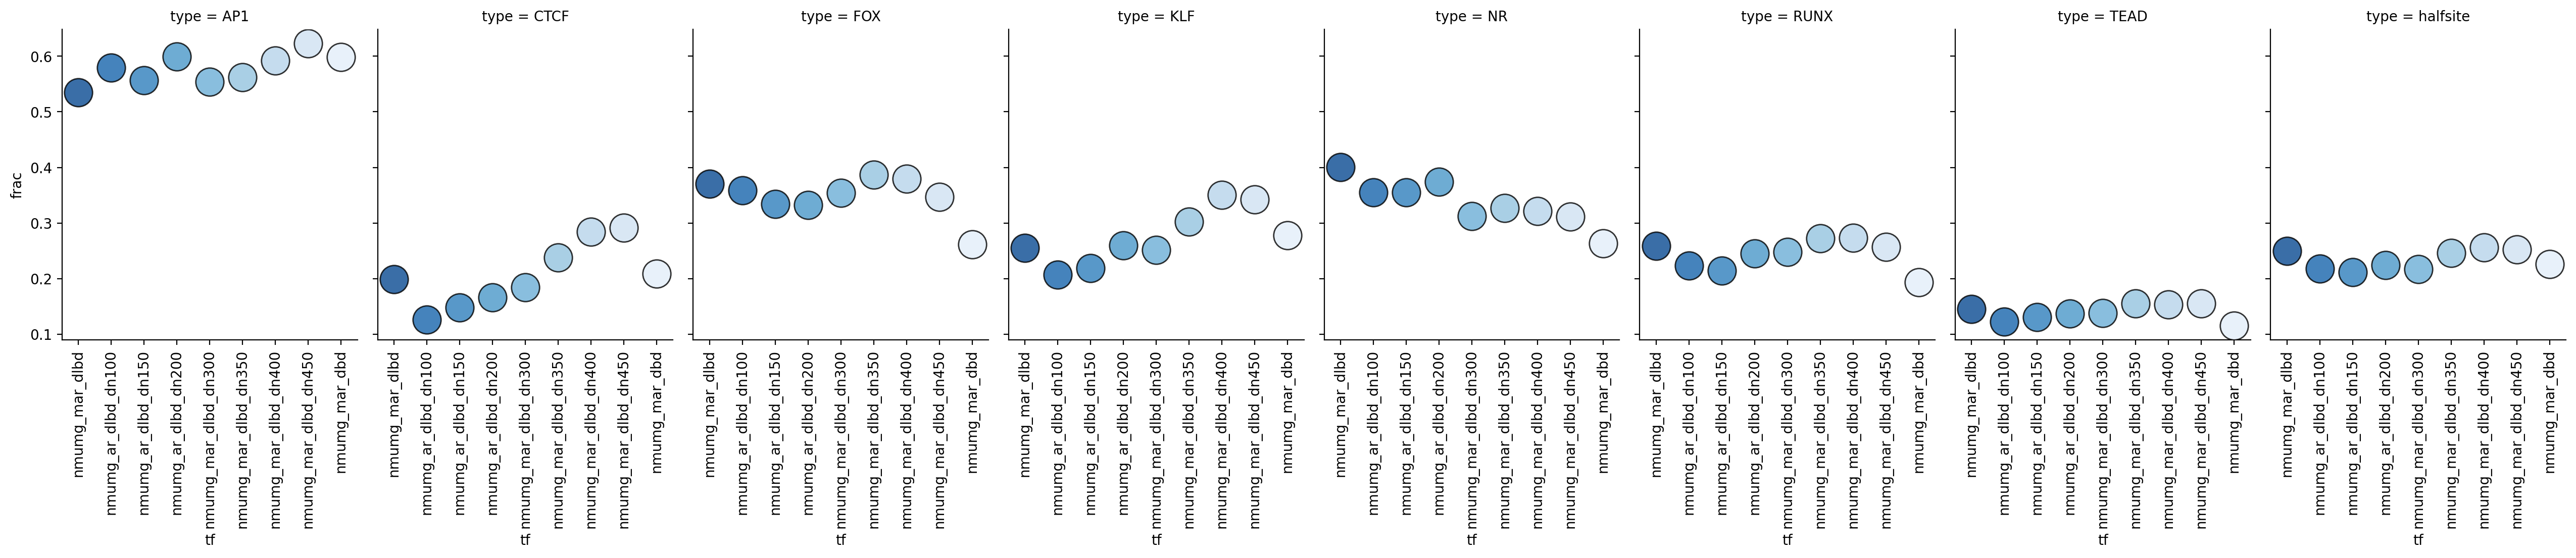

In [10]:
g = sns.catplot(
    nmotsnmumg.filter(regex='ar', axis=0), kind="strip",
    col="type", y='frac', x="tf",
    height=4, aspect=.8, sharey=True,native_scale=True, palette='Blues_r', alpha=.8, size=20, edgecolor='k', linewidth=1
)
g.set_xticklabels(order_ar, rotation=90)
g.fig.savefig('figures/Fig6/frac_motifs_ar.pdf')

/tmp/ipykernel_4140466/1670303477.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


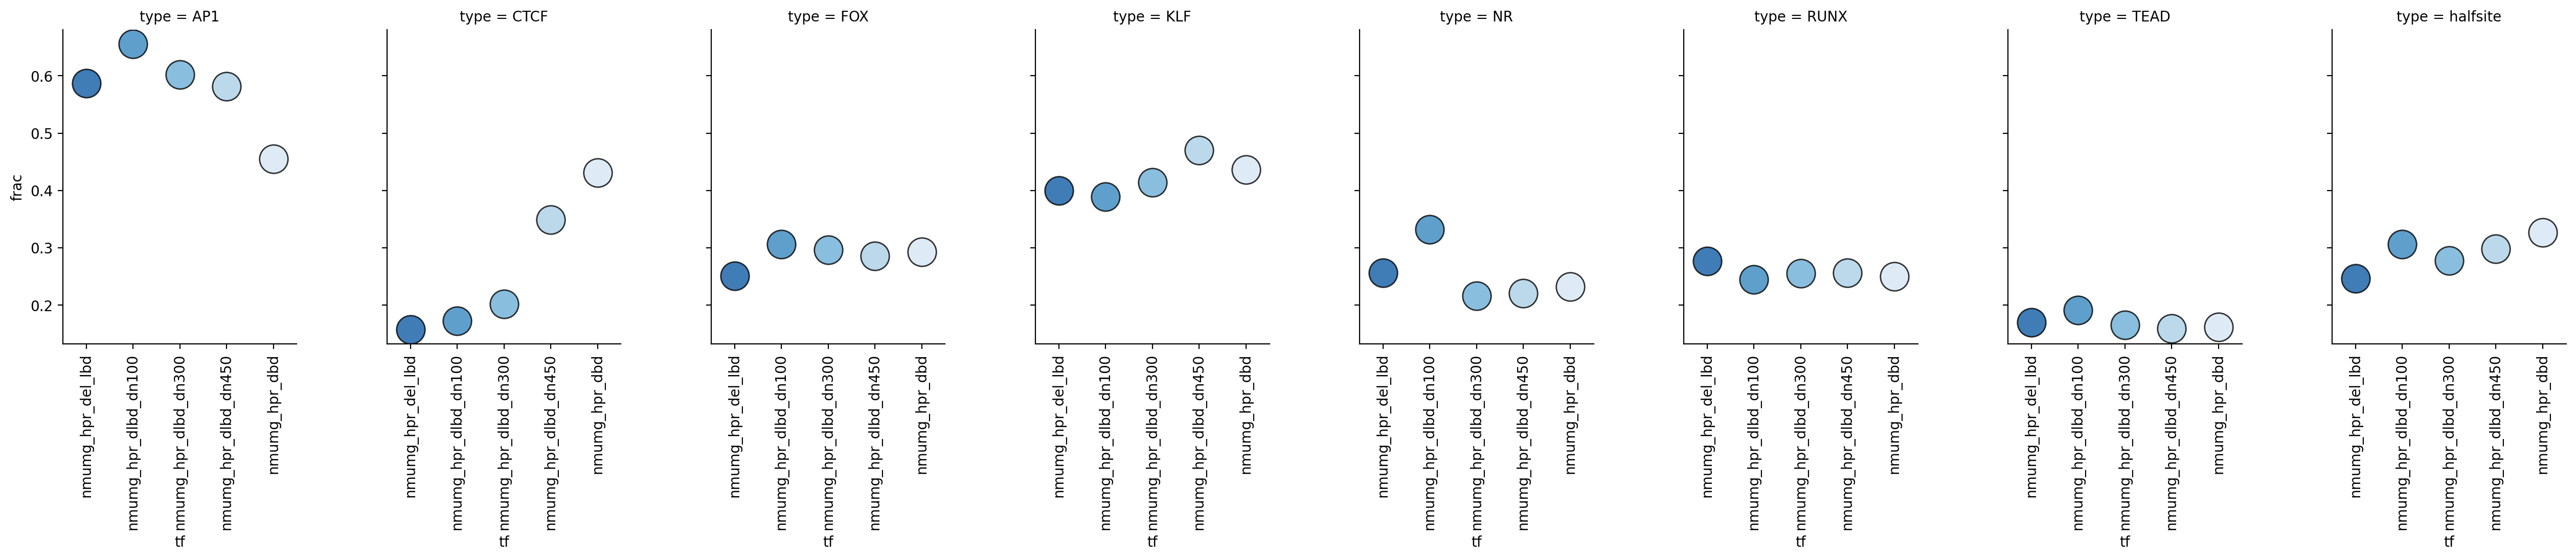

In [11]:
g = sns.catplot(
    nmotsnmumg.filter(regex='pr', axis=0), kind="strip",
    col="type", y='frac', x="tf",
    height=4, aspect=.8, sharey=True,native_scale=True, palette='Blues_r', alpha=.8, size=20, edgecolor='k', linewidth=1
)
g.set_xticklabels(order_pr, rotation=90)
g.fig.savefig('figures/Fig6/frac_motifs_pr.pdf')

/tmp/ipykernel_4140466/1323888026.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


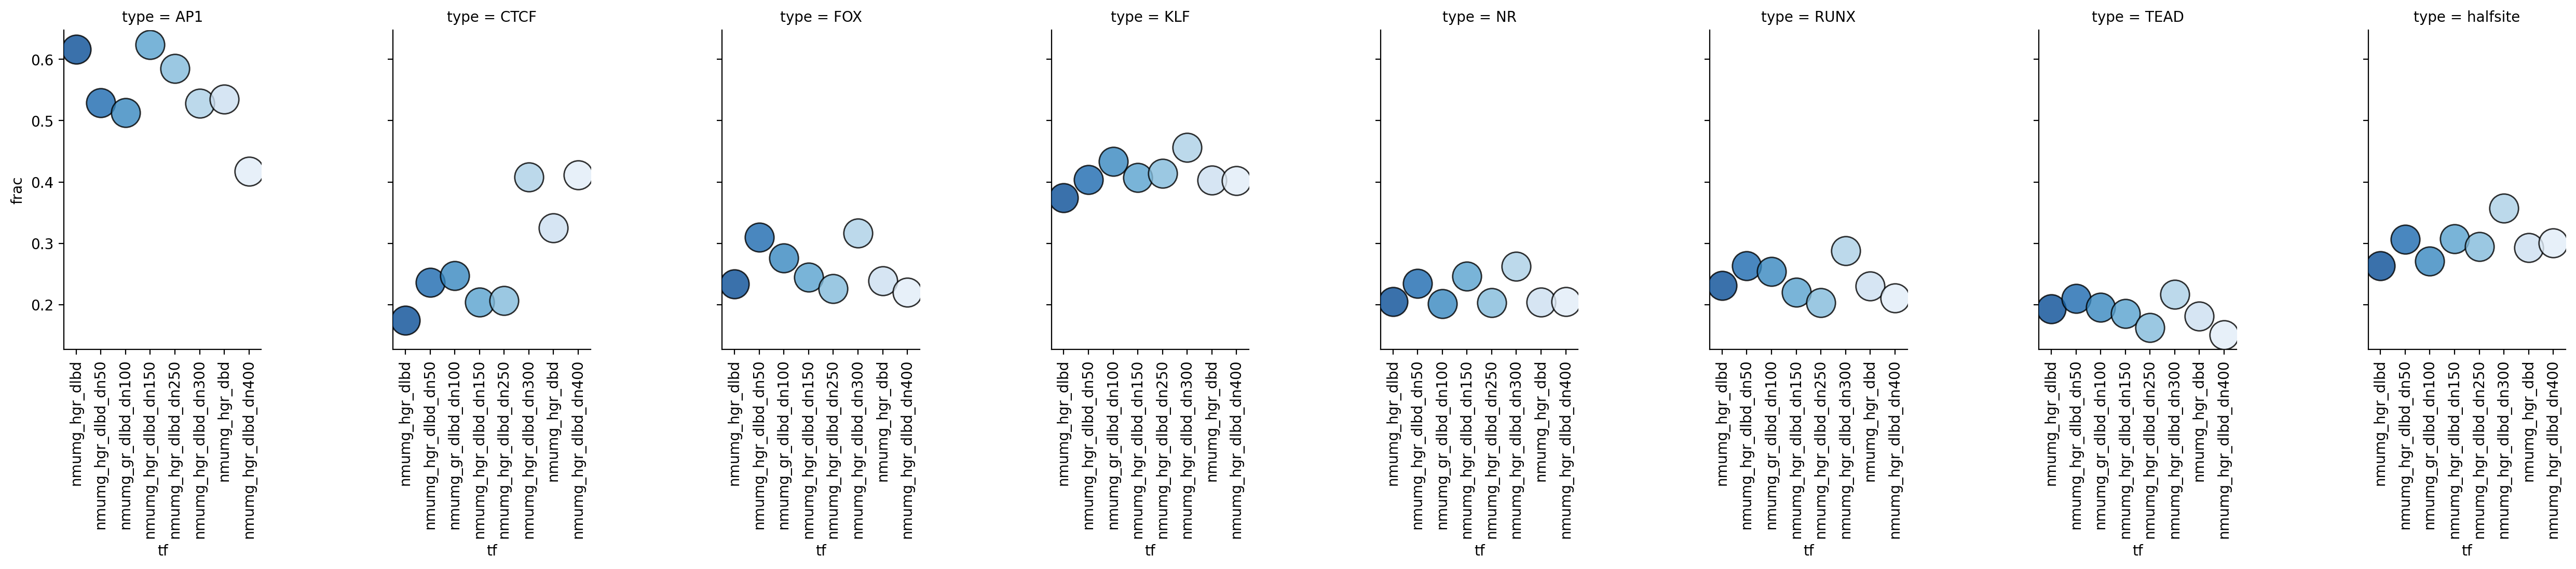

In [12]:
g = sns.catplot(
    nmotsnmumg.filter(regex='gr', axis=0), kind="strip",
    col="type", y='frac', x="tf",
    height=4, aspect=.8, sharey=True,native_scale=True, palette='Blues_r', alpha=.8, size=20, edgecolor='k', linewidth=1
)
g.set_xticklabels(order_gr, rotation=90)
g.fig.savefig('figures/Fig6/frac_motifs_gr.pdf')

/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


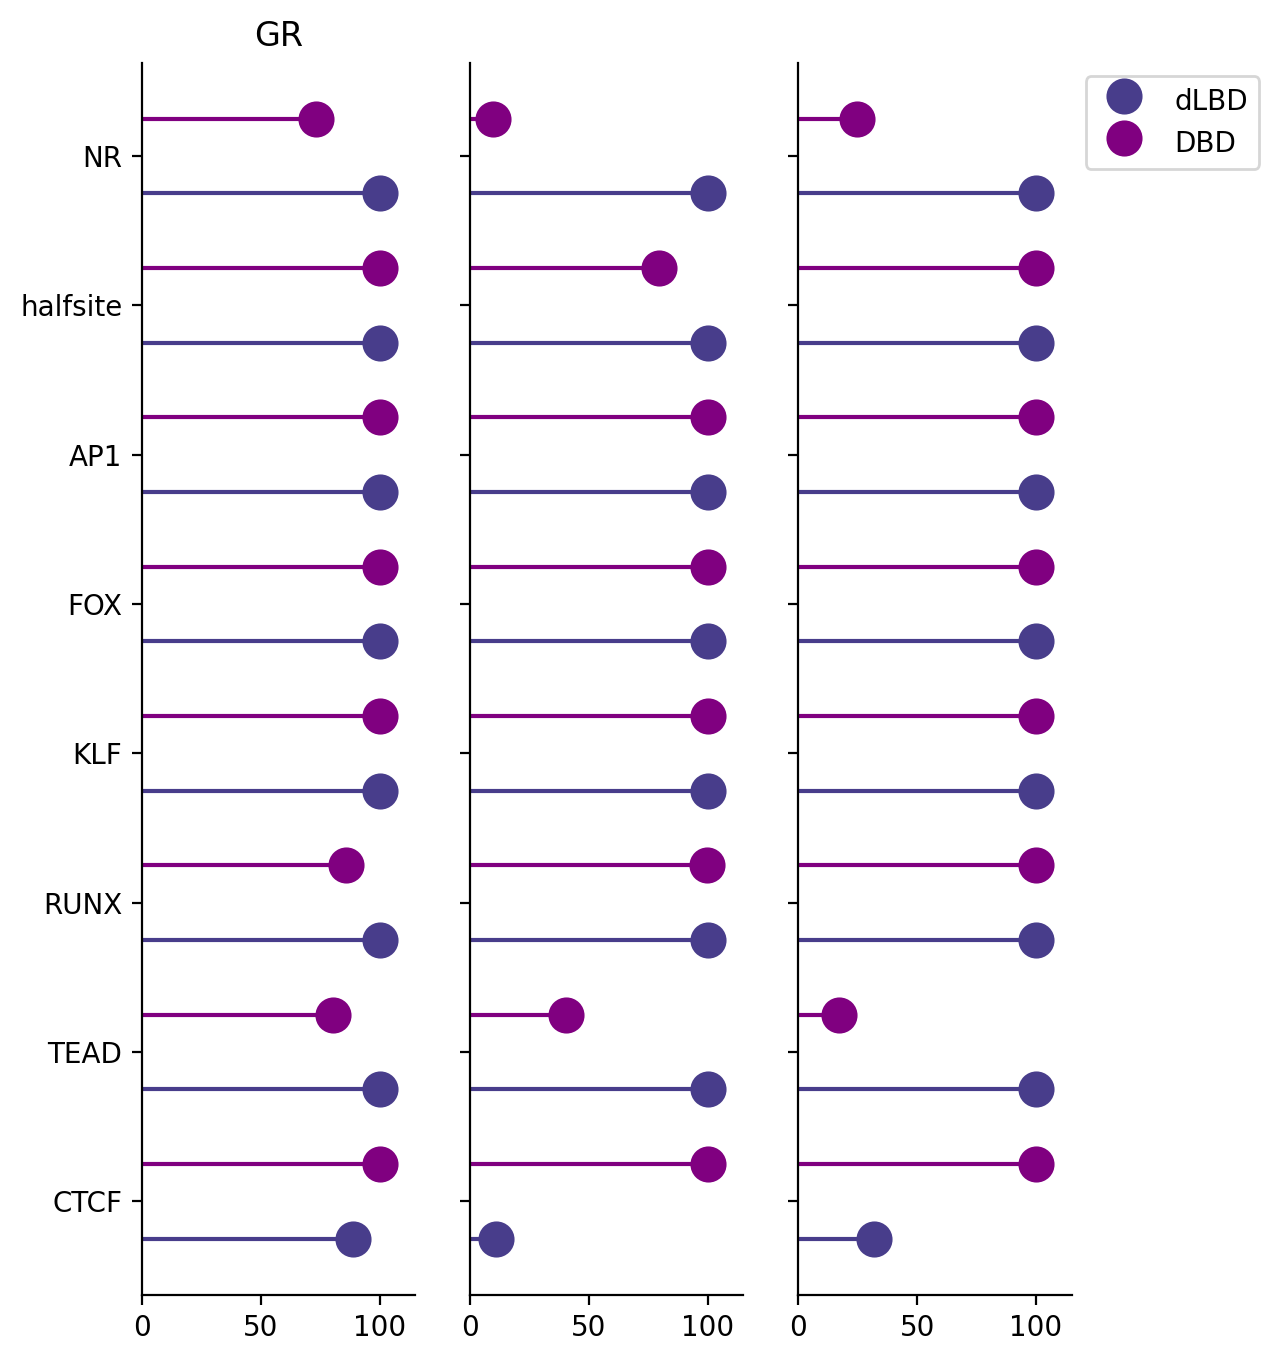

In [13]:
sea = glob.glob('combined_threshed_peaks_wsummits/output_sea_fasta_*')

import os
def proc(x):
    return pd.read_csv(os.path.join(x, 'sea.tsv'), delimiter='\t').iloc[:-3, ]\
    .loc[:, ['ID', 'PVALUE']]\
    .rename({'PVALUE':x.split('_fasta_')[-1].split('_fc10')[0]},axis=1)\
    .set_index('ID')
#     pd.read_csv( 'combined_threshed_peaks_wsummits/output_sea_fasta_nmumg_mar_wt_lig_fc10.bed.fasta/sea.tsv',
#            delimiter='\t')


enrich_table = pd.concat([proc(x) for x in sea], axis=1)

order_ar = ['nmumg_mar_dlbd','nmumg_mar_dbd',]
order_pr = ['nmumg_hpr_del_lbd','nmumg_hpr_dbd', ]
order_gr = ['nmumg_hgr_dlbd', 'nmumg_hgr_dlbd_dn400',]

ndata = enrich_table.filter(regex='nmumg').loc[:, order_ar+order_pr+order_gr].filter(regex='KLF|AP1|NR|TEAD|FOX|RUNX|halfsite|CTCF', axis=0)
pvals = -10 * np.log10(ndata)
pvals = pvals.replace(np.inf, 4000)
pvals[pvals>100] = 100
pvals.loc[:, 'mot_type'] = ndata.reset_index().loc[:, 'ID'].apply(lambda x: x.split('_')[-1]).values
pvals = pvals.groupby('mot_type').mean()

pvals = pvals.loc[['NR', 'halfsite', 'AP1', 'FOX', 'KLF', 'RUNX', 'TEAD', 'CTCF'][::-1]].reset_index()

msize=12
fig, (ax,ax1,ax2) = plt.subplots(1,3, figsize=(6,8), sharey=True)
s = ax.stem(np.arange(8),pvals.filter(regex='ar').iloc[:, 0], orientation='horizontal', linefmt='darkslateblue', markerfmt='o', basefmt=' ')
ax.set_yticks(np.arange(pvals.shape[0])+.25, pvals.mot_type)
s.markerline.set_markersize(msize) 
s = ax.stem(np.arange(8)+.5,pvals.filter(regex='ar').iloc[:, 1], orientation='horizontal', linefmt='purple', markerfmt='o', basefmt=' ')
s.markerline.set_markersize(msize)

s = ax1.stem(np.arange(8),pvals.filter(regex='pr').iloc[:, 0], orientation='horizontal', linefmt='darkslateblue', markerfmt='o', basefmt=' ')
ax1.set_yticks(np.arange(pvals.shape[0])+.25, pvals.mot_type)
s.markerline.set_markersize(msize) 
s = ax1.stem(np.arange(8)+.5,pvals.filter(regex='pr').iloc[:, 1], orientation='horizontal', linefmt='purple', markerfmt='o', basefmt=' ')
s.markerline.set_markersize(msize)

s = ax2.stem(np.arange(8),pvals.filter(regex='gr').iloc[:, 0], orientation='horizontal', linefmt='darkslateblue', markerfmt='o', basefmt=' ', label='dLBD')
ax2.set_yticks(np.arange(pvals.shape[0])+.25, pvals.mot_type)
s.markerline.set_markersize(msize) 
s = ax2.stem(np.arange(8)+.5,pvals.filter(regex='gr').iloc[:, 1], orientation='horizontal', linefmt='purple', markerfmt='o', basefmt=' ', label='DBD')
s.markerline.set_markersize(msize)


for axi in (ax,ax1,ax2):
    sns.despine(ax=axi, right=True)
    axi.set_xlim([0,115])
ax2.legend(bbox_to_anchor=[1,1])
ax.set_title('AR')
ax.set_title('PR')
ax.set_title('GR')
fig.savefig('figures/Fig6/pvalues_motifs.pdf')

In [14]:
def load_and_rename_mot(path, name):
    mot_enrich = pd.DataFrame(pd.read_csv(os.path.join(path, 'fimo.tsv'), delimiter='\t').iloc[:-3].set_index('sequence_name').loc[:, 'score']).reset_index().groupby('sequence_name').count()
    mot_enrich.columns = [name]
    return mot_enrich

def average_bgs(path_list, ):
    con = pl.concat([pl.read_parquet(x) for x in path_list])\
    .groupby(['Chromosome', 'Start', 'End']).sum()\
    .with_columns((pl.col('Normalized_Reads')/len(path_list)).alias('mean_norm_reads'),
                  (pl.col('Name')/len(path_list)).alias('mean_raw_reads'),
                  pl.col('Chromosome').cast(str))\
    .sort(by=['Chromosome', 'Start'])

    return con


def process_window_peaks(n_peaks: pd.DataFrame, avbgs: pl.DataFrame, window: int = 1000, mid_col: str = 'Middle', strand_col: str = 'Strand'):
    """
    Process windowed peak regions and extract normalized read values.

    Parameters:
        n_peaks (pd.DataFrame): DataFrame containing peaks with columns ['Chromosome', 'middle', 'strand'].
        avbgs (pl.DataFrame): Polars DataFrame with columns ['Chromosome', 'Start', 'End', 'mean_norm_reads'].
        window (int): Window size around the mid_motif_peak (default is 200).

    Returns:
        list: List of normalized read arrays, adjusted for strand orientation.
    """
    signals = []

    for chrom, mid, strand in n_peaks[['Chromosome', mid_col, strand_col]].values:
        a = np.zeros(window)

        coords = avbgs.filter(
            (pl.col('Chromosome') == chrom) &
            (pl.col('Start') >= (int(mid) - (window / 2))) &
            (pl.col('End') <= (int(mid) + (window / 2)))
        ).select(['Start', 'mean_norm_reads']) \
         .with_columns(pl.col('Start') - (int(mid) - (window / 2))) \
         .sort(['Start']) \
         .to_numpy()

        a[coords[:, 0].astype(int)] = coords[:, 1]

        signals.append(a if strand == '+' else a[::-1])

    return signals

In [15]:
data1 = pd.read_parquet('cell_peaks_dbddlbdwtlig/nmumg_ar_trunc_clustered_peak_wsignals.parquet')
scols1 = ['nmumg_mar_dlbd','nmumg_ar_dlbd_dn100', 'nmumg_ar_dlbd_dn150', 'nmumg_ar_dlbd_dn200',
        'nmumg_mar_dlbd_dn300',
       'nmumg_mar_dlbd_dn350', 'nmumg_mar_dlbd_dn400', 'nmumg_mar_dlbd_dn450','nmumg_mar_dbd', ]
z = data1.set_index('nindex').loc[:, scols1]
z = (z-z.mean()) / z.std()

mot_folders = ['cell_peaks_dbddlbdwtlig/mot_enrich/NR_nmumg_ar_trunc_cluster', 
'cell_peaks_dbddlbdwtlig/mot_enrich/NR_hs_nmumg_ar_trunc_cluster',
'cell_peaks_dbddlbdwtlig/mot_enrich/AP1_nmumg_ar_trunc_cluster', 
'cell_peaks_dbddlbdwtlig/mot_enrich/FOX_nmumg_ar_trunc_cluster',
'cell_peaks_dbddlbdwtlig/mot_enrich/KLF_nmumg_ar_trunc_cluster',
'cell_peaks_dbddlbdwtlig/mot_enrich/RUNX_nmumg_ar_trunc_cluster',
'cell_peaks_dbddlbdwtlig/mot_enrich/TEAD_nmumg_ar_trunc_cluster',
              'cell_peaks_dbddlbdwtlig/mot_enrich/CTCF_nmumg_ar_trunc_cluster']

mots_enrich = pd.concat([load_and_rename_mot(x, x.split('/')[-1]) for x in mot_folders], axis=1)
clustered_w_motifs_ar = pd.concat([data1.set_index('nindex'), mots_enrich.fillna(0)], axis=1).fillna(0)


dl_ind_ar = list(z.query("nmumg_mar_dlbd>3 & nmumg_mar_dbd<2").sort_values(by='nmumg_mar_dlbd', ascending=False).index)
dbd_ind_ar = list(z.query("nmumg_mar_dlbd<2 & nmumg_mar_dbd>=3").sort_values(by='nmumg_mar_dbd', ascending=False).index)

In [16]:
data2 = pd.read_parquet('cell_peaks_dbddlbdwtlig/nmumg_pr_trunc_clustered_peak_wsignals.parquet')

z = data2.set_index('nindex').loc[:, order_pr]
z = (z-z.mean()) / z.std()

mot_folders = ['cell_peaks_dbddlbdwtlig/mot_enrich/NR_nmumg_pr_trunc_cluster', 
'cell_peaks_dbddlbdwtlig/mot_enrich/NR_hs_nmumg_pr_trunc_cluster',
'cell_peaks_dbddlbdwtlig/mot_enrich/AP1_nmumg_pr_trunc_cluster', 
'cell_peaks_dbddlbdwtlig/mot_enrich/FOX_nmumg_pr_trunc_cluster',
'cell_peaks_dbddlbdwtlig/mot_enrich/KLF_nmumg_pr_trunc_cluster',
'cell_peaks_dbddlbdwtlig/mot_enrich/RUNX_nmumg_pr_trunc_cluster',
'cell_peaks_dbddlbdwtlig/mot_enrich/TEAD_nmumg_pr_trunc_cluster',
'cell_peaks_dbddlbdwtlig/mot_enrich/CTCF_nmumg_pr_trunc_cluster' ]

mots_enrich = pd.concat([load_and_rename_mot(x, x.split('/')[-1]) for x in mot_folders], axis=1)
clustered_w_motifs_pr = pd.concat([data2.set_index('nindex'), mots_enrich.fillna(0)], axis=1).fillna(0)


dl_ind_pr = list(z.query("nmumg_hpr_del_lbd>3 & nmumg_hpr_dbd<2").sort_values(by='nmumg_hpr_del_lbd', ascending=False).index)
dbd_ind_pr = list(z.query("nmumg_hpr_del_lbd<2 & nmumg_hpr_dbd>=3").sort_values(by='nmumg_hpr_dbd', ascending=False).index)

In [17]:
data3 = pd.read_parquet('cell_peaks_dbddlbdwtlig/nmumg_gr_trunc_clustered_peak_wsignals.parquet')

z = data3.set_index('nindex').loc[:, order_gr]
z = (z-z.mean()) / z.std()

mot_folders = ['cell_peaks_dbddlbdwtlig/mot_enrich/NR_nmumg_gr_trunc_cluster', 
'cell_peaks_dbddlbdwtlig/mot_enrich/NR_hs_nmumg_gr_trunc_cluster',
'cell_peaks_dbddlbdwtlig/mot_enrich/AP1_nmumg_gr_trunc_cluster', 
'cell_peaks_dbddlbdwtlig/mot_enrich/FOX_nmumg_gr_trunc_cluster',
'cell_peaks_dbddlbdwtlig/mot_enrich/KLF_nmumg_gr_trunc_cluster',
'cell_peaks_dbddlbdwtlig/mot_enrich/RUNX_nmumg_gr_trunc_cluster',
'cell_peaks_dbddlbdwtlig/mot_enrich/TEAD_nmumg_gr_trunc_cluster',
'cell_peaks_dbddlbdwtlig/mot_enrich/CTCF_nmumg_gr_trunc_cluster' ]

mots_enrich = pd.concat([load_and_rename_mot(x, x.split('/')[-1]) for x in mot_folders], axis=1)
clustered_w_motifs_gr = pd.concat([data3.set_index('nindex'), mots_enrich.fillna(0)], axis=1).fillna(0)


dl_ind_gr = list(z.query("nmumg_hgr_dlbd>3 & nmumg_hgr_dlbd_dn400<2").sort_values(by='nmumg_hgr_dlbd', ascending=False).index)
dbd_ind_gr = list(z.query("nmumg_hgr_dlbd<2 & nmumg_hgr_dlbd_dn400>=3").sort_values(by='nmumg_hgr_dlbd_dn400', ascending=False).index)

/tmp/ipykernel_4140466/41582466.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x1.loc[i],y1.loc[i], label=i, c=pal[i], s=30,  zorder=20, marker='p')
/tmp/ipykernel_4140466/41582466.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x2.loc[i],y2.loc[i], label=i, c=pal[i], s=30, zorder=20, marker='s')
/tmp/ipykernel_4140466/41582466.py:28: UserWarning: *c* argument looks like a single numeric RGB 

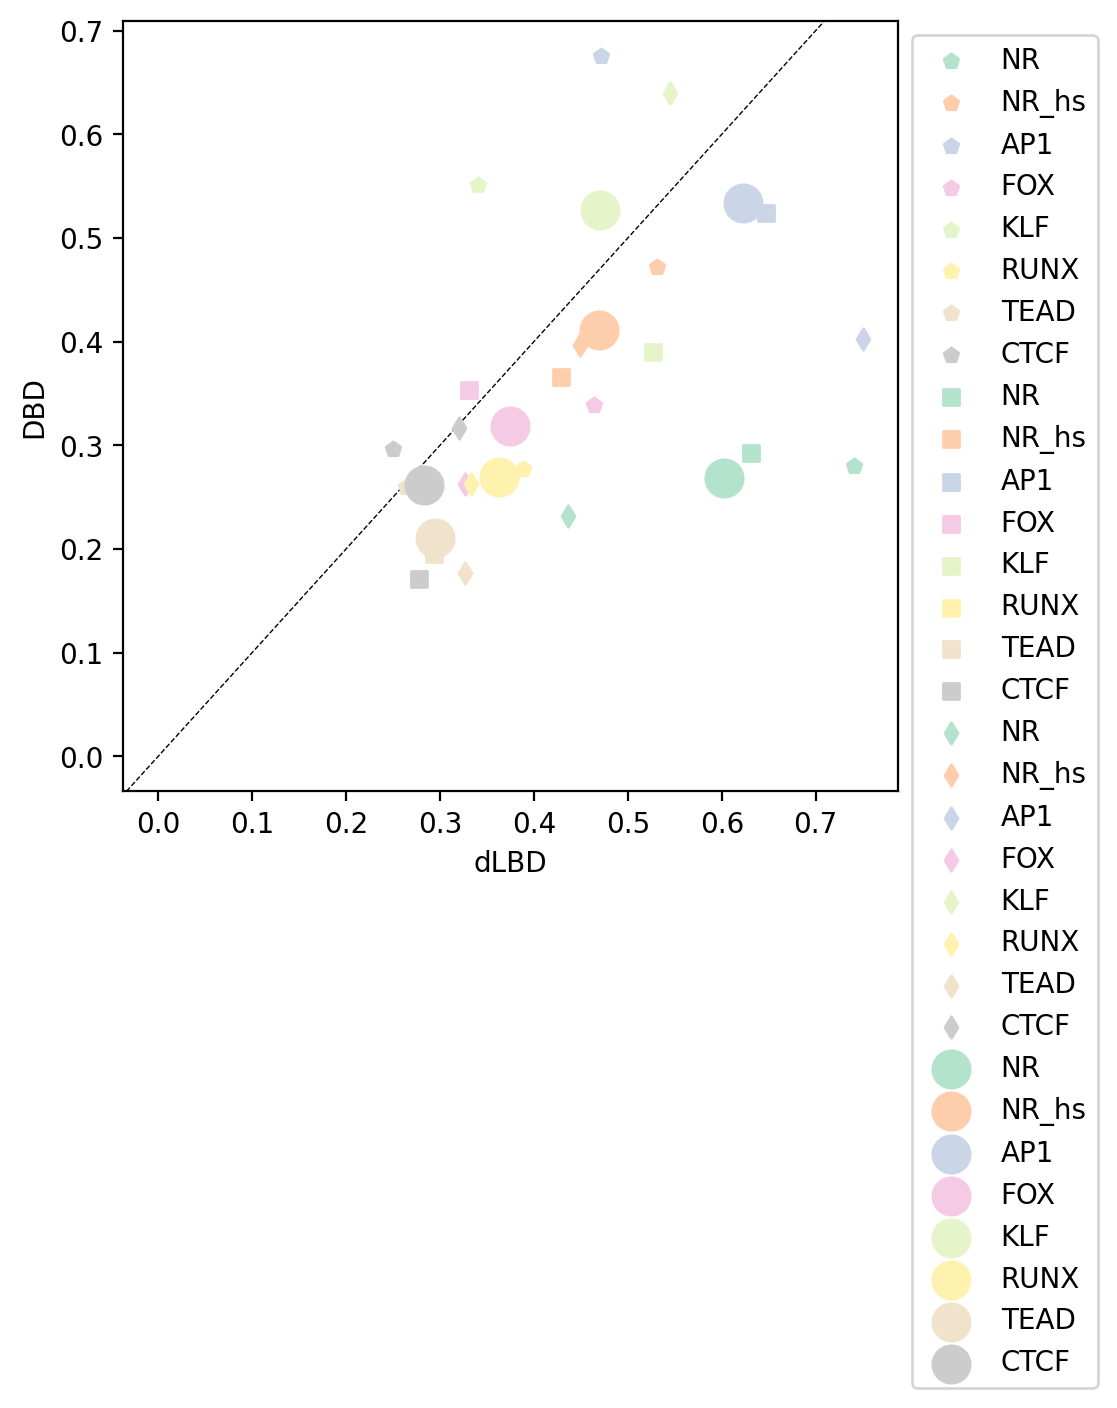

In [18]:
fig, ax = plt.subplots(1, figsize=(5,5))

x1 = pd.DataFrame(((clustered_w_motifs_ar.loc[dl_ind_ar].filter(regex='cluster')>0).sum() / len(dl_ind_ar)))
y1 = pd.DataFrame(((clustered_w_motifs_ar.loc[dbd_ind_ar].filter(regex='cluster')>0).sum() / len(dbd_ind_ar)))
y1.index = [x.split('_nm')[0] for x in y1.index]
x1.index = [x.split('_nm')[0] for x in x1.index]

pal = dict(zip(x1.index, sns.color_palette('Pastel2', n_colors=x1.index.shape[0])))

for i in x1.index:
    ax.scatter(x1.loc[i],y1.loc[i], label=i, c=pal[i], s=30,  zorder=20, marker='p')

    

x2 = pd.DataFrame(((clustered_w_motifs_pr.loc[dl_ind_pr].filter(regex='cluster')>0).sum() / len(dl_ind_pr)))
y2 = pd.DataFrame(((clustered_w_motifs_pr.loc[dbd_ind_pr].filter(regex='cluster')>0).sum() / len(dbd_ind_pr)))
y2.index = [x.split('_nm')[0] for x in y2.index]
x2.index = [x.split('_nm')[0] for x in x2.index]
for i in x1.index:
    ax.scatter(x2.loc[i],y2.loc[i], label=i, c=pal[i], s=30, zorder=20, marker='s')
    

x3 = pd.DataFrame(((clustered_w_motifs_gr.loc[dl_ind_gr].filter(regex='cluster')>0).sum() / len(dl_ind_gr)))
y3 = pd.DataFrame(((clustered_w_motifs_gr.loc[dbd_ind_gr].filter(regex='cluster')>0).sum() / len(dbd_ind_gr)))
y3.index = [x.split('_nm')[0] for x in y3.index]
x3.index = [x.split('_nm')[0] for x in x3.index]
for i in x1.index:
    ax.scatter(x3.loc[i],y3.loc[i], label=i, c=pal[i], s=30, zorder=20, marker='d')
    
    
    
x = pd.DataFrame(pd.concat([x1,x2,x3], axis=1).mean(axis=1))
y = pd.DataFrame(pd.concat([y1,y2,y3], axis=1).mean(axis=1))
y.index = [x.split('_nm')[0] for x in y.index]
x.index = [x.split('_nm')[0] for x in x.index]
for i in x1.index:
    ax.scatter(x.loc[i],y.loc[i], label=i, c=pal[i], s=180, zorder=20)

ax.axline((0,0), slope=1, zorder=1, ls='--', c='k', lw=.5)

ax.legend(bbox_to_anchor=[1,1])
ax.set_xlabel('dLBD')
ax.set_ylabel('DBD')
fig.savefig('figures/Fig6/frac_diff.pdf')

In [19]:
def prep_peak_fimos(key, fam, metadata):
    gr = metadata.loc[key]
    peak = gr.iloc[-1]
    peak = pr.read_bed(peak).df
    
    gr_wt_lig_fimod = pivoted.filter(regex=fam).filter(regex=key+"$", axis=0)
    loaded_fimos = {key:pr.PyRanges(pr.read_gff3(os.path.join(value, 'fimo.gff')).df.loc[:, ['Chromosome', 'Start', 'End']]) for key, value in gr_wt_lig_fimod.T.squeeze().to_dict().items()}
    
    return gr, peak, loaded_fimos
def plot_coccurrent_motifs(peak, loaded_fimos):
    range_peaks = pr.PyRanges(peak.loc[:, ['Chromosome', 'Start', 'End']])
    conc_fimo_peaks = lambda x: range_peaks.join(loaded_fimos[x], how='left', suffix='_'+x.split('_')[1]).cluster().df.groupby("Cluster").agg(lambda x: list(x)[0]).iloc[:, -1:]
    mot_occurences = (pd.concat(map(conc_fimo_peaks, list(loaded_fimos.keys())), axis=1)>0)*1
    mot_occ_df = pd.concat([range_peaks.df, mot_occurences.reset_index()], axis=1).drop("Cluster", axis=1)

    total_overlaps = pd.DataFrame(mot_occ_df.filter(regex='End_').sum(axis=1)).groupby(0).size()
    total_overlaps_frac = (total_overlaps / total_overlaps.sum()) *100
    fig, ax = plt.subplots(1)
    ax.bar(total_overlaps.index, total_overlaps, ec='k', lw=.5, width=1)
    for key, value in total_overlaps.to_dict().items():
        ax.text(key-.25, value+25, np.round(total_overlaps_frac.loc[key], 2))

    ax.set_xlabel('Number of cooccurent motif types')
    ax.set_ylabel('Number of peaks')
    return fig
def calculate_motif_distances(ogfimo, self_motif_name, loaded_fimos, peak, slack=500):
    nr_range = pr.PyRanges(pr.read_gff3(ogfimo).df.loc[:, ["Chromosome", 'Start', 'End']])

    for name,i in loaded_fimos.items():
        if name == self_motif_name:
            continue
        nr_range = nr_range.join(i, slack=500, how='outer', suffix="_" + name.split('_')[1])
    nr_range = nr_range.df

    # If you want to use the motif strands, you will need to find them from here
    nr_range = nr_range.loc[:, ['Chromosome', 'Start', 'End', 'Start_AP1',
           'End_AP1', 'Start_FOX','End_FOX' ,'Start_TEAD',
           'End_TEAD', 'Start_KLF', 'End_KLF', 'Start_RUNX',
           'End_RUNX', 'Start_halfsite', 'End_halfsite', 'Start_CTCF', 'End_CTCF']]
    nr_range = nr_range.replace(-1, np.nan)
    nr_range.columns = ['Chromosome', 'Start_NR', 'End_NR', 'Start_AP1', 'End_AP1', 'Start_FOX',
           'End_FOX', 'Start_TEAD', 'End_TEAD', 'Start_KLF', 'End_KLF',
           'Start_RUNX', 'End_RUNX', 'Start_halfsite', 'End_halfsite', 'Start_CTCF', 'End_CTCF']
    for i in ['NR', 'AP1', 'FOX', 'TEAD', 'KLF', 'RUNX', 'halfsite', 'CTCF']:
        cd = nr_range.loc[:, [f'Start_{i}', f'End_{i}']]
        mid = cd.iloc[:, 0] + np.ceil(((cd.iloc[:, 1] - cd.iloc[:, 0])/2))
        nr_range.loc[:, f'{i}_Mid'] = mid.values


    mid_motifs = nr_range.loc[:, ['Chromosome', 'NR_Mid', 'AP1_Mid', 'FOX_Mid', 'TEAD_Mid', 'KLF_Mid', 'RUNX_Mid', 'halfsite_Mid', 'CTCF_Mid']]

    for mid in ['NR_Mid', 'AP1_Mid', 'FOX_Mid', 'TEAD_Mid', 'KLF_Mid', 'RUNX_Mid', 'halfsite_Mid', 'CTCF_Mid']:
        distances = nr_range.filter(regex='Mid').apply(lambda x: x - nr_range.loc[:, mid]).drop(mid, axis=1)
        distances.columns = ["{}_minus_{}".format(x.replace("_Mid", ''), mid.replace('_Mid', '')) for x in distances.columns]
        mid_motifs = pd.concat([mid_motifs, distances], axis=1)
    mid_motifs.loc[:, 'dummy_strand'] = '+'
    coocc = (mid_motifs.filter(regex='Mid')>0) * 1
    coocc.columns = [x.replace("_Mid", '_Occ') for x in coocc.columns]
    mid_motifs.loc[:, 'unique'] = np.nan


    for col in coocc.columns:
        cun = (coocc[coocc[col]==1].drop(col, axis=1).sum(axis=1)==0)
        mid_motifs.loc[cun[cun].index, 'unique'] = col.replace('_Occ', '')

    main_peaks_pyrange = pr.PyRanges(peak.loc[:, ['Chromosome', 'Start', 'End']])
    npeaks = main_peaks_pyrange.df.shape[0]
    
    return mid_motifs, npeaks, main_peaks_pyrange




    

    
def extract_signals_with_dists(nr_comps, avebw, mlist, main_peaks_pyrange):
    means_dist = defaultdict(dict)
    fps = dict()
    for i in mlist:
        print(i)
        trial = nr_comps.filter(regex=f'Mid|{i}|Chrom').dropna()
        trial.loc[:, 'Strand'] = trial.iloc[:, -1].apply(lambda x: '+' if x>0 else '-')
        trial.index = trial.iloc[:,0].astype(str) + ':' + trial.iloc[:,1].astype(str)+ ':' + trial.iloc[:,2].astype(str)
        trial = trial[~trial.index.duplicated()]
        trial = trial.loc[np.abs(trial.iloc[:,2]).sort_values(ascending=True).index]


        for_pyrange = trial.copy().iloc[:, [0,1,-1]]
        for_pyrange.columns = ['Chromosome', 'Start', 'Strand']
        for_pyrange.loc[:, 'End'] = for_pyrange.Start+1
        npyrange = pr.PyRanges(for_pyrange)
        overlappedp = main_peaks_pyrange.join(npyrange).cluster().df.Cluster.max()
        sigs = process_window_peaks(trial,avebw , 1000, trial.columns[1],)
        df = pd.DataFrame(sigs)

        df.loc[:, 'absdist'] = np.abs(trial.iloc[:, -2].values)
        fps[i] = df

        num_thresh = 50
        if df.query("absdist<=100").shape[0]>num_thresh:
            means_dist[i]['l100'] = df.query("absdist<=100").iloc[:, :-1].mean()
        else:
            means_dist[i]['l100'] = np.zeros(df.query("absdist<=100").shape[1])

        if df.query("absdist>100 & absdist<=200").shape[0]>num_thresh:
            means_dist[i]['100_200'] = df.query("absdist>100 & absdist<=200").iloc[:, :-1].mean()
        else:
            means_dist[i]['100_200'] = np.zeros(df.query("absdist>100 & absdist<=200").shape[1])

        if df.query("absdist>200 & absdist<=300").shape[0]>num_thresh:
            means_dist[i]['200_300'] = df.query("absdist>200 & absdist<=300").iloc[:, :-1].mean()
        else:
            means_dist[i]['200_300'] = np.zeros(df.query("absdist>200 & absdist<=300").shape[1])

        if df.query("absdist>300 & absdist<=400").shape[0]>num_thresh:
            means_dist[i]['300_400'] = df.query("absdist>300 & absdist<=400").iloc[:, :-1].mean()
        else:
            means_dist[i]['300_400'] = np.zeros(df.query("absdist>300 & absdist<=400").shape[1])

        if df.query("absdist>400").shape[0]>num_thresh:
            means_dist[i]['u400'] = df.query("absdist>400").iloc[:, :-1].mean()
        else:
            means_dist[i]['u400'] = np.zeros(df.query("absdist>400").shape[1])
    return (means_dist, fps)

def plot_profiles(means_dist, fps, mlist):
    fig, ax = plt.subplots(len(mlist),5, sharey=True, sharex=True, figsize=(15,len(mlist)*3))
    rmse = defaultdict(dict)

    for i,k in enumerate(mlist):

        if len(mlist) == 1:
            axi = ax

            axi[0].set_ylabel(k)
        else:
            axi = ax[i]

            axi[0].set_ylabel(k)
        for axii, key, lines, quer in zip(axi, ['l100', '100_200', '200_300', '300_400', 'u400'],
                                    [(400,500), (300,400), (200,300), (100,200), (0, 100)],
                                   ["absdist<=100","absdist>100 & absdist<=200","absdist>200 & absdist<=300",
                                   "absdist>300 & absdist<=400","absdist>400 & absdist<475"]):
            smoothed = uniform_filter(means_dist[k][key], 20)
            proximal=smoothed[:500]
            distal = smoothed[500:][::-1]

            if  means_dist[k][key].sum() > 0:
                axii.plot(np.arange(500), proximal, label=f'Proximal to {k}', c='gray', lw=1, zorder=20)
                axii.plot(np.arange(lines[0], lines[1]), proximal[lines[0]:lines[1]], label=f'{k} distance from NR', c='darkorchid', lw=2.5, zorder=20)
                axii.plot(np.arange(500), distal,  label=f'Distal from {k}', c='k', lw=1.5, zorder=20)

                ins = axii.inset_axes([0.15,0.75,0.2,0.2])

                ins.plot(np.mean(fps[k].query(quer).apply(lambda x: x[475-x['absdist']:525-x['absdist']].values, axis=1), axis=0), c='navy', lw=.7)
                ins.set_xticklabels('')
                sns.despine(ax=ins, right=True, top=True)
                ins.set_xticks(np.arange(0,75, 25), np.arange(-25,50,25), size=5)
                ins.set_yticklabels(ins.get_yticklabels(), size=5)

                rmse[k][f'{key}_rmse'] = np.sqrt(np.mean((proximal[lines[0]:lines[1]]- distal[lines[0]:lines[1]])**2))
                # rmse[k][f'{key}_rmse'] = proximal[lines[0]:lines[1]].mean() / distal[lines[0]:lines[1]].mean()

                rmse[k][f'{key}_peak'] = distal[400:500].mean()
            if i==0 and axii == axi[0]:
                fig2, newax = plt.subplots(1,2, figsize=(6,2.5), sharey=True)
                newax[0].plot(np.arange(500), proximal, label=f'Proximal to {k}', c='darkorchid', lw=2, zorder=20)
                newax[0].plot(np.arange(500,1000), distal[::-1],  label=f'Distal from {k}', c='k', lw=2, zorder=20)
                newax[1].plot(np.arange(500), proximal, label=f'Proximal to {k}', c='darkorchid', lw=2, zorder=20)
                newax[1].plot(np.arange(500), distal,  label=f'Distal from {k}', c='k', lw=2, zorder=20)

            axii.axvspan(lines[0], lines[1], alpha=0.3, color='cadetblue')
            axii.set_title(key)

        axi[0].legend(bbox_to_anchor=[0, 1.4])
    return (rmse, fig, fig2)
    


In [20]:
ardbd, arpeak, loaded_fimos_ardbd = prep_peak_fimos('nmumg_mar_dbd', 'AR', metadata)
grdbd, grpeak, loaded_fimos_grdbd = prep_peak_fimos('nmumg_hgr_dlbd_dn400', 'GR', metadata)
prdbd, prpeak, loaded_fimos_prdbd = prep_peak_fimos('nmumg_hpr_dbd', 'PR', metadata)

ardlbd, ardlbdpeak, loaded_fimos_ardlbd = prep_peak_fimos('nmumg_mar_dlbd', 'AR', metadata)
grdlbd, grdlbdpeak, loaded_fimos_grdlbd = prep_peak_fimos('nmumg_hgr_dlbd', 'GR', metadata)
prdlbd, prdlbdpeak, loaded_fimos_prdlbd = prep_peak_fimos('nmumg_hpr_del_lbd', 'PR', metadata)

arlig, arligpeak, loaded_fimos_arlig = prep_peak_fimos('nmumg_mar_wt_lig', 'AR', metadata)
grlig, grligpeak, loaded_fimos_grlig = prep_peak_fimos('nmumg_hgr_wt_lig', 'GR', metadata)
prlig, prligpeak, loaded_fimos_prlig = prep_peak_fimos('nmumg_hpr_wt_lig', 'PR', metadata)

/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curr

/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}


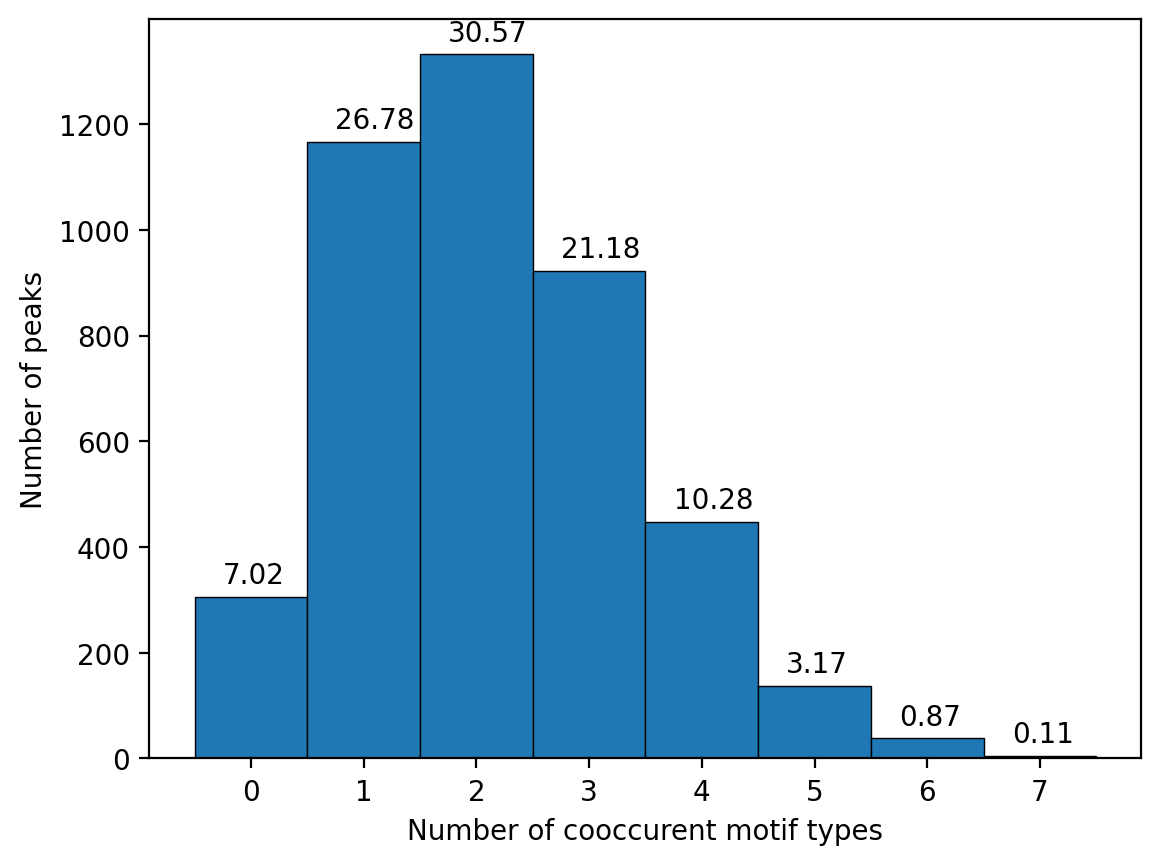

In [21]:
fig = plot_coccurrent_motifs(arpeak, loaded_fimos_ardbd)
plt.show()
fig.savefig('figures/Fig6/cocc_ardbd_peaks.pdf')

/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}


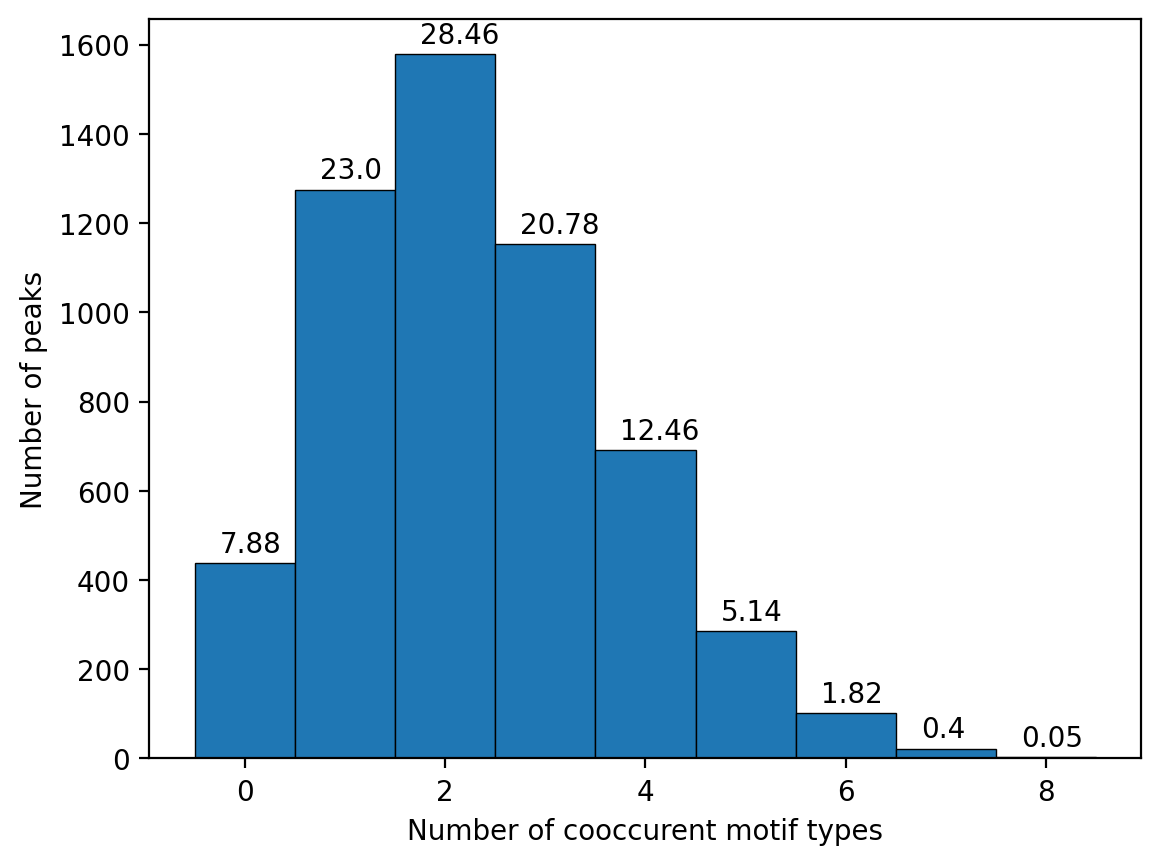

In [22]:
fig = plot_coccurrent_motifs(grpeak, loaded_fimos_grdbd)
plt.show()
fig.savefig('figures/Fig6/cocc_grdbd_peaks.pdf')

In [23]:
mid_motifs_ardbd, npeaks_ardbd, pyranges_ardbd = calculate_motif_distances('combined_threshed_peaks_wsummits/output_fimo_fasta_nmumg_mar_dbd_fc10_AR_NR_mot/fimo.gff', 'AR_NR_mot', loaded_fimos=loaded_fimos_ardbd, peak= arpeak)
mid_motifs_prdbd, npeaks_prdbd, pyranges_prdbd = calculate_motif_distances('combined_threshed_peaks_wsummits/output_fimo_fasta_nmumg_hpr_dbd_fc10_PR_NR_mot/fimo.gff', 'PR_NR_mot', loaded_fimos=loaded_fimos_prdbd, peak= prpeak)
mid_motifs_grdbd, npeaks_grdbd, pyranges_grdbd = calculate_motif_distances('combined_threshed_peaks_wsummits/output_fimo_fasta_nmumg_hgr_dlbd_dn400_fc10_GR_NR_mot/fimo.gff', 'GR_NR_mot', loaded_fimos=loaded_fimos_grdbd, peak= grpeak)

mid_motifs_ardlbd, npeaks_ardlbd, pyranges_ardlbd = calculate_motif_distances('combined_threshed_peaks_wsummits/output_fimo_fasta_nmumg_mar_dlbd_fc10_AR_NR_mot/fimo.gff', 'AR_NR_mot', loaded_fimos=loaded_fimos_ardlbd, peak=ardlbdpeak )
mid_motifs_prdlbd, npeaks_prdlbd, pyranges_prdlbd = calculate_motif_distances('combined_threshed_peaks_wsummits/output_fimo_fasta_nmumg_hpr_del_lbd_fc10_PR_NR_mot/fimo.gff', 'PR_NR_mot', loaded_fimos=loaded_fimos_prdlbd, peak= prdlbdpeak)
mid_motifs_grdlbd, npeaks_grdlbd, pyranges_grdlbd = calculate_motif_distances('combined_threshed_peaks_wsummits/output_fimo_fasta_nmumg_hgr_dlbd_fc10_GR_NR_mot/fimo.gff', 'GR_NR_mot', loaded_fimos=loaded_fimos_grdlbd, peak= grdlbdpeak)

mid_motifs_arlig, npeaks_arlig, pyranges_arlig = calculate_motif_distances('combined_threshed_peaks_wsummits/output_fimo_fasta_nmumg_mar_wt_lig_fc10_AR_NR_mot/fimo.gff', 'AR_NR_mot', loaded_fimos=loaded_fimos_arlig, peak=arligpeak )
mid_motifs_prlig, npeaks_prlig, pyranges_prlig = calculate_motif_distances('combined_threshed_peaks_wsummits/output_fimo_fasta_nmumg_hpr_wt_lig_fc10_PR_NR_mot/fimo.gff', 'PR_NR_mot', loaded_fimos=loaded_fimos_prlig, peak= prligpeak)
mid_motifs_grlig, npeaks_grlig, pyranges_grlig = calculate_motif_distances('combined_threshed_peaks_wsummits/output_fimo_fasta_nmumg_hgr_wt_lig_fc10_GR_NR_mot/fimo.gff', 'GR_NR_mot', loaded_fimos=loaded_fimos_grlig, peak= grligpeak)


avebwar = average_bgs(ardbd.NormBG)
avebwpr = average_bgs(prdbd.NormBG)
avebwgr = average_bgs(grdbd.NormBG)

avebwardlbd = average_bgs(ardlbd.NormBG)
avebwprdlbd = average_bgs(prdlbd.NormBG)
avebwgrdlbd = average_bgs(grdlbd.NormBG)

avebwarlig = average_bgs(arlig.NormBG)
avebwprlig = average_bgs(prlig.NormBG)
avebwgrlig = average_bgs(grlig.NormBG)

/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/tmp/ipykernel_4140466/4080449369.py:64: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NR' has dtype incompatible with float64, please explicitly cast to a compa

In [24]:
mlist = ['AP1', 'KLF', 'RUNX', 'FOX', 'TEAD', 'halfsite','CTCF']

In [25]:
mlist = ['AP1', 'KLF', 'RUNX', 'FOX', 'TEAD', 'halfsite','CTCF']
means_dist_ar, fps_ar = extract_signals_with_dists(mid_motifs_ardbd.filter(regex='Chromosome|NR_'),avebwar, mlist, pyranges_ardbd)
means_dist_pr, fps_gr = extract_signals_with_dists(mid_motifs_prdbd.filter(regex='Chromosome|NR_'),avebwpr, mlist, pyranges_prdbd)
means_dist_gr, fps_pr = extract_signals_with_dists(mid_motifs_grdbd.filter(regex='Chromosome|NR_'),avebwgr, mlist, pyranges_grdbd)

means_dist_ardlbd, fps_ardlbd = extract_signals_with_dists(mid_motifs_ardlbd.filter(regex='Chromosome|NR_'),avebwardlbd, mlist, pyranges_ardlbd)
means_dist_prdlbd, fps_prdlbd = extract_signals_with_dists(mid_motifs_prdlbd.filter(regex='Chromosome|NR_'),avebwprdlbd, mlist, pyranges_prdlbd)
means_dist_grdlbd, fps_grdlbd = extract_signals_with_dists(mid_motifs_grdlbd.filter(regex='Chromosome|NR_'),avebwgrdlbd, mlist, pyranges_grdlbd)

means_dist_arlig, fps_arlig = extract_signals_with_dists(mid_motifs_ardlbd.filter(regex='Chromosome|NR_'),avebwarlig, mlist, pyranges_arlig)
means_dist_prlig, fps_prlig = extract_signals_with_dists(mid_motifs_prdlbd.filter(regex='Chromosome|NR_'),avebwprlig, mlist, pyranges_prlig)
means_dist_grlig, fps_grlig = extract_signals_with_dists(mid_motifs_grdlbd.filter(regex='Chromosome|NR_'),avebwgrlig, mlist, pyranges_grlig)

AP1


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


KLF


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


RUNX


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


FOX


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


TEAD


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


halfsite


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


CTCF


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


AP1


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


KLF


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


RUNX


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


FOX


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


TEAD


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


halfsite


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


CTCF


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


AP1


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


KLF


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


RUNX


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


FOX


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


TEAD


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


halfsite


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


CTCF


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


AP1


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


KLF


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


RUNX


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


FOX


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


TEAD


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


halfsite


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


CTCF


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


AP1


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


KLF


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


RUNX


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


FOX


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


TEAD


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


halfsite


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


CTCF


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


AP1


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


KLF


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


RUNX


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


FOX


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


TEAD


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


halfsite


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


CTCF


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


AP1


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


KLF


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


RUNX


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


FOX


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


TEAD


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


halfsite


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


CTCF


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


AP1


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


KLF


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


RUNX


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


FOX


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


TEAD


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


halfsite


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


CTCF


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


AP1


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


KLF


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


RUNX


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


FOX


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


TEAD


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


halfsite


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


CTCF


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


/tmp/ipykernel_4140466/4080449369.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ins.set_yticklabels(ins.get_yticklabels(), size=5)
/tmp/ipykernel_4140466/4080449369.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ins.set_yticklabels(ins.get_yticklabels(), size=5)
/tmp/ipykernel_4140466/4080449369.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ins.set_yticklabels(ins.get_yticklabels(), size=5)
/tmp/ipykernel_4140466/4080449369.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ins.set_yticklabels(ins.get_yticklabels(), size=5)
/tmp/ipykernel_4140466/4080449369.py:160: UserWarning: set_ticklabels() should only be used with a fixed num

AP1


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


KLF


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


RUNX


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


FOX


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


TEAD


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


NR


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


CTCF


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.
/tmp/ipykernel_4140466/4080449369.py:160: Us

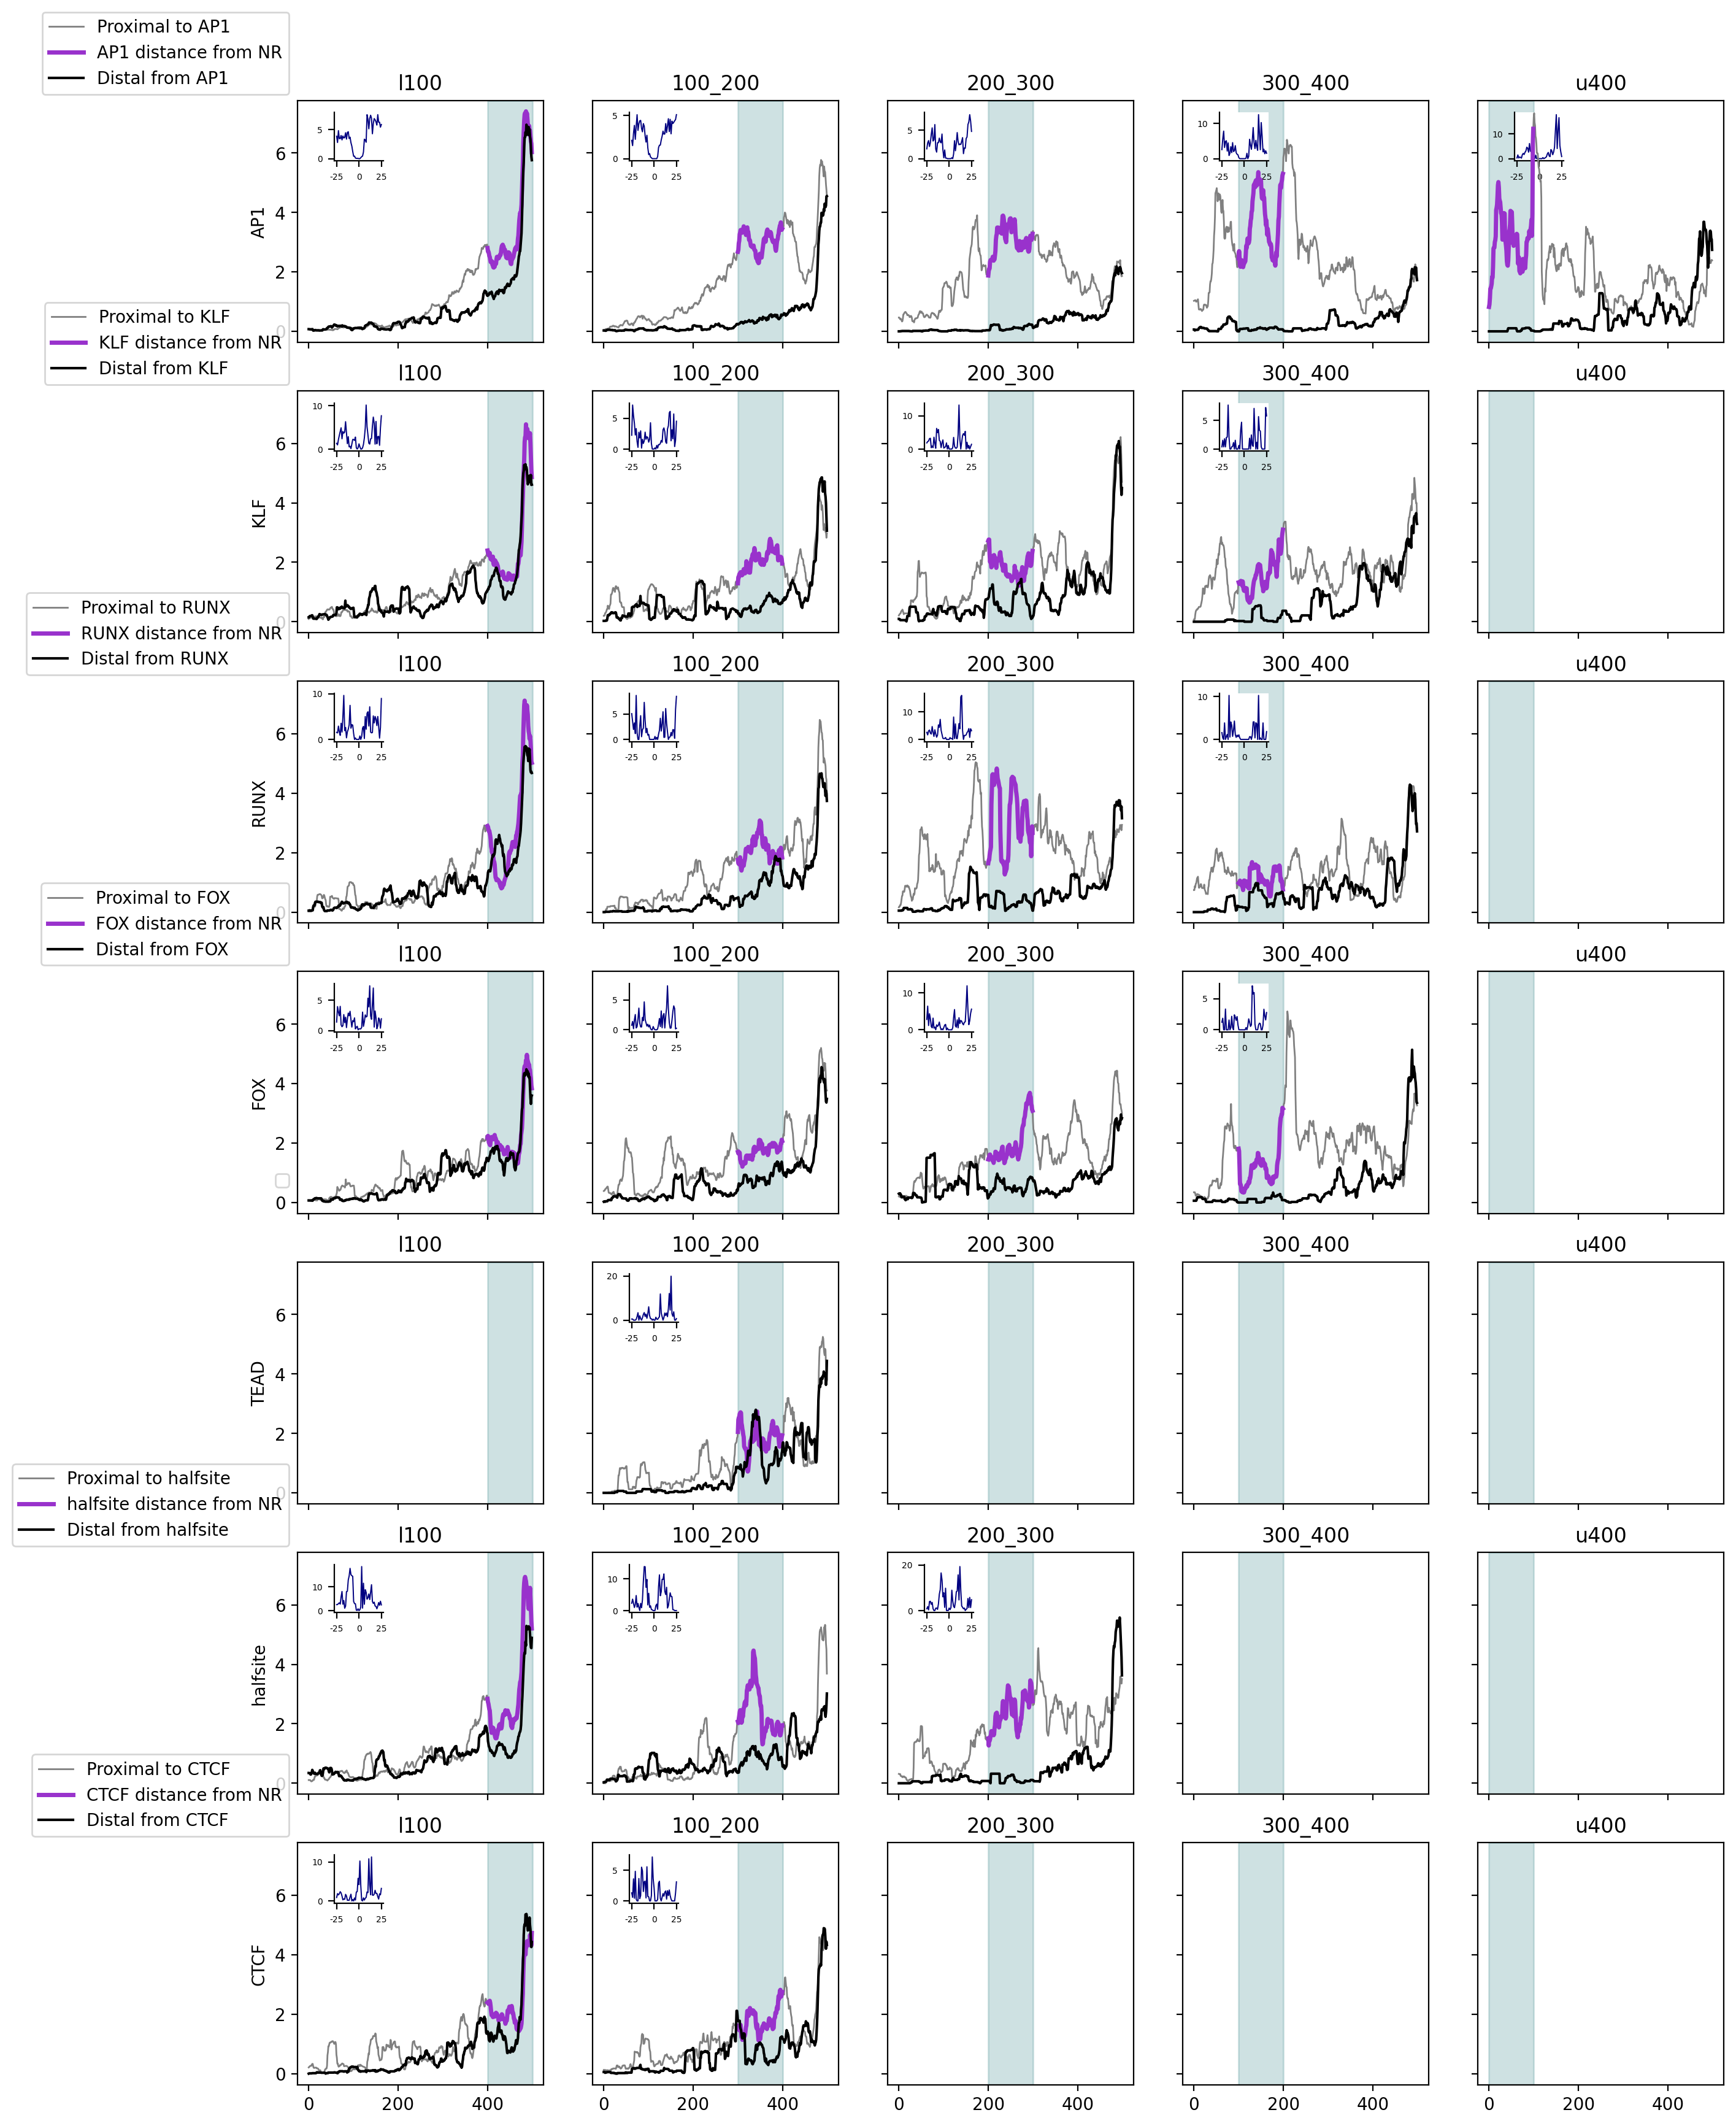

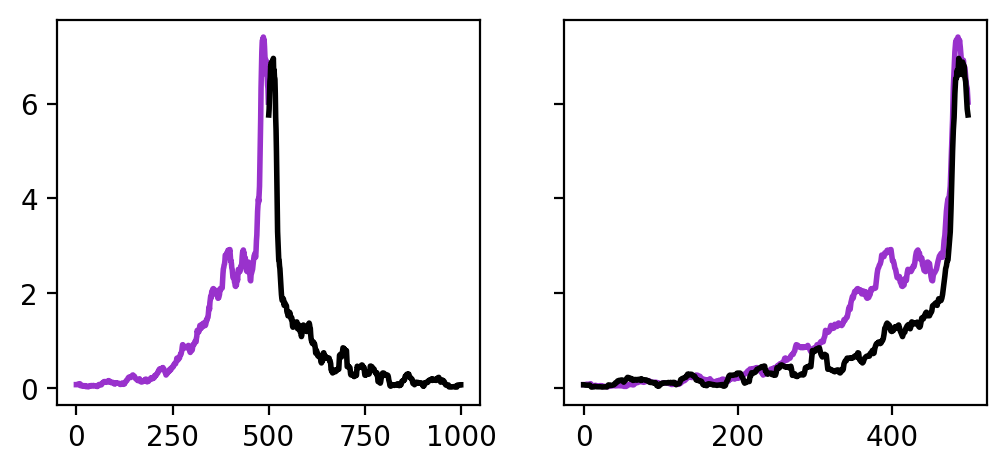

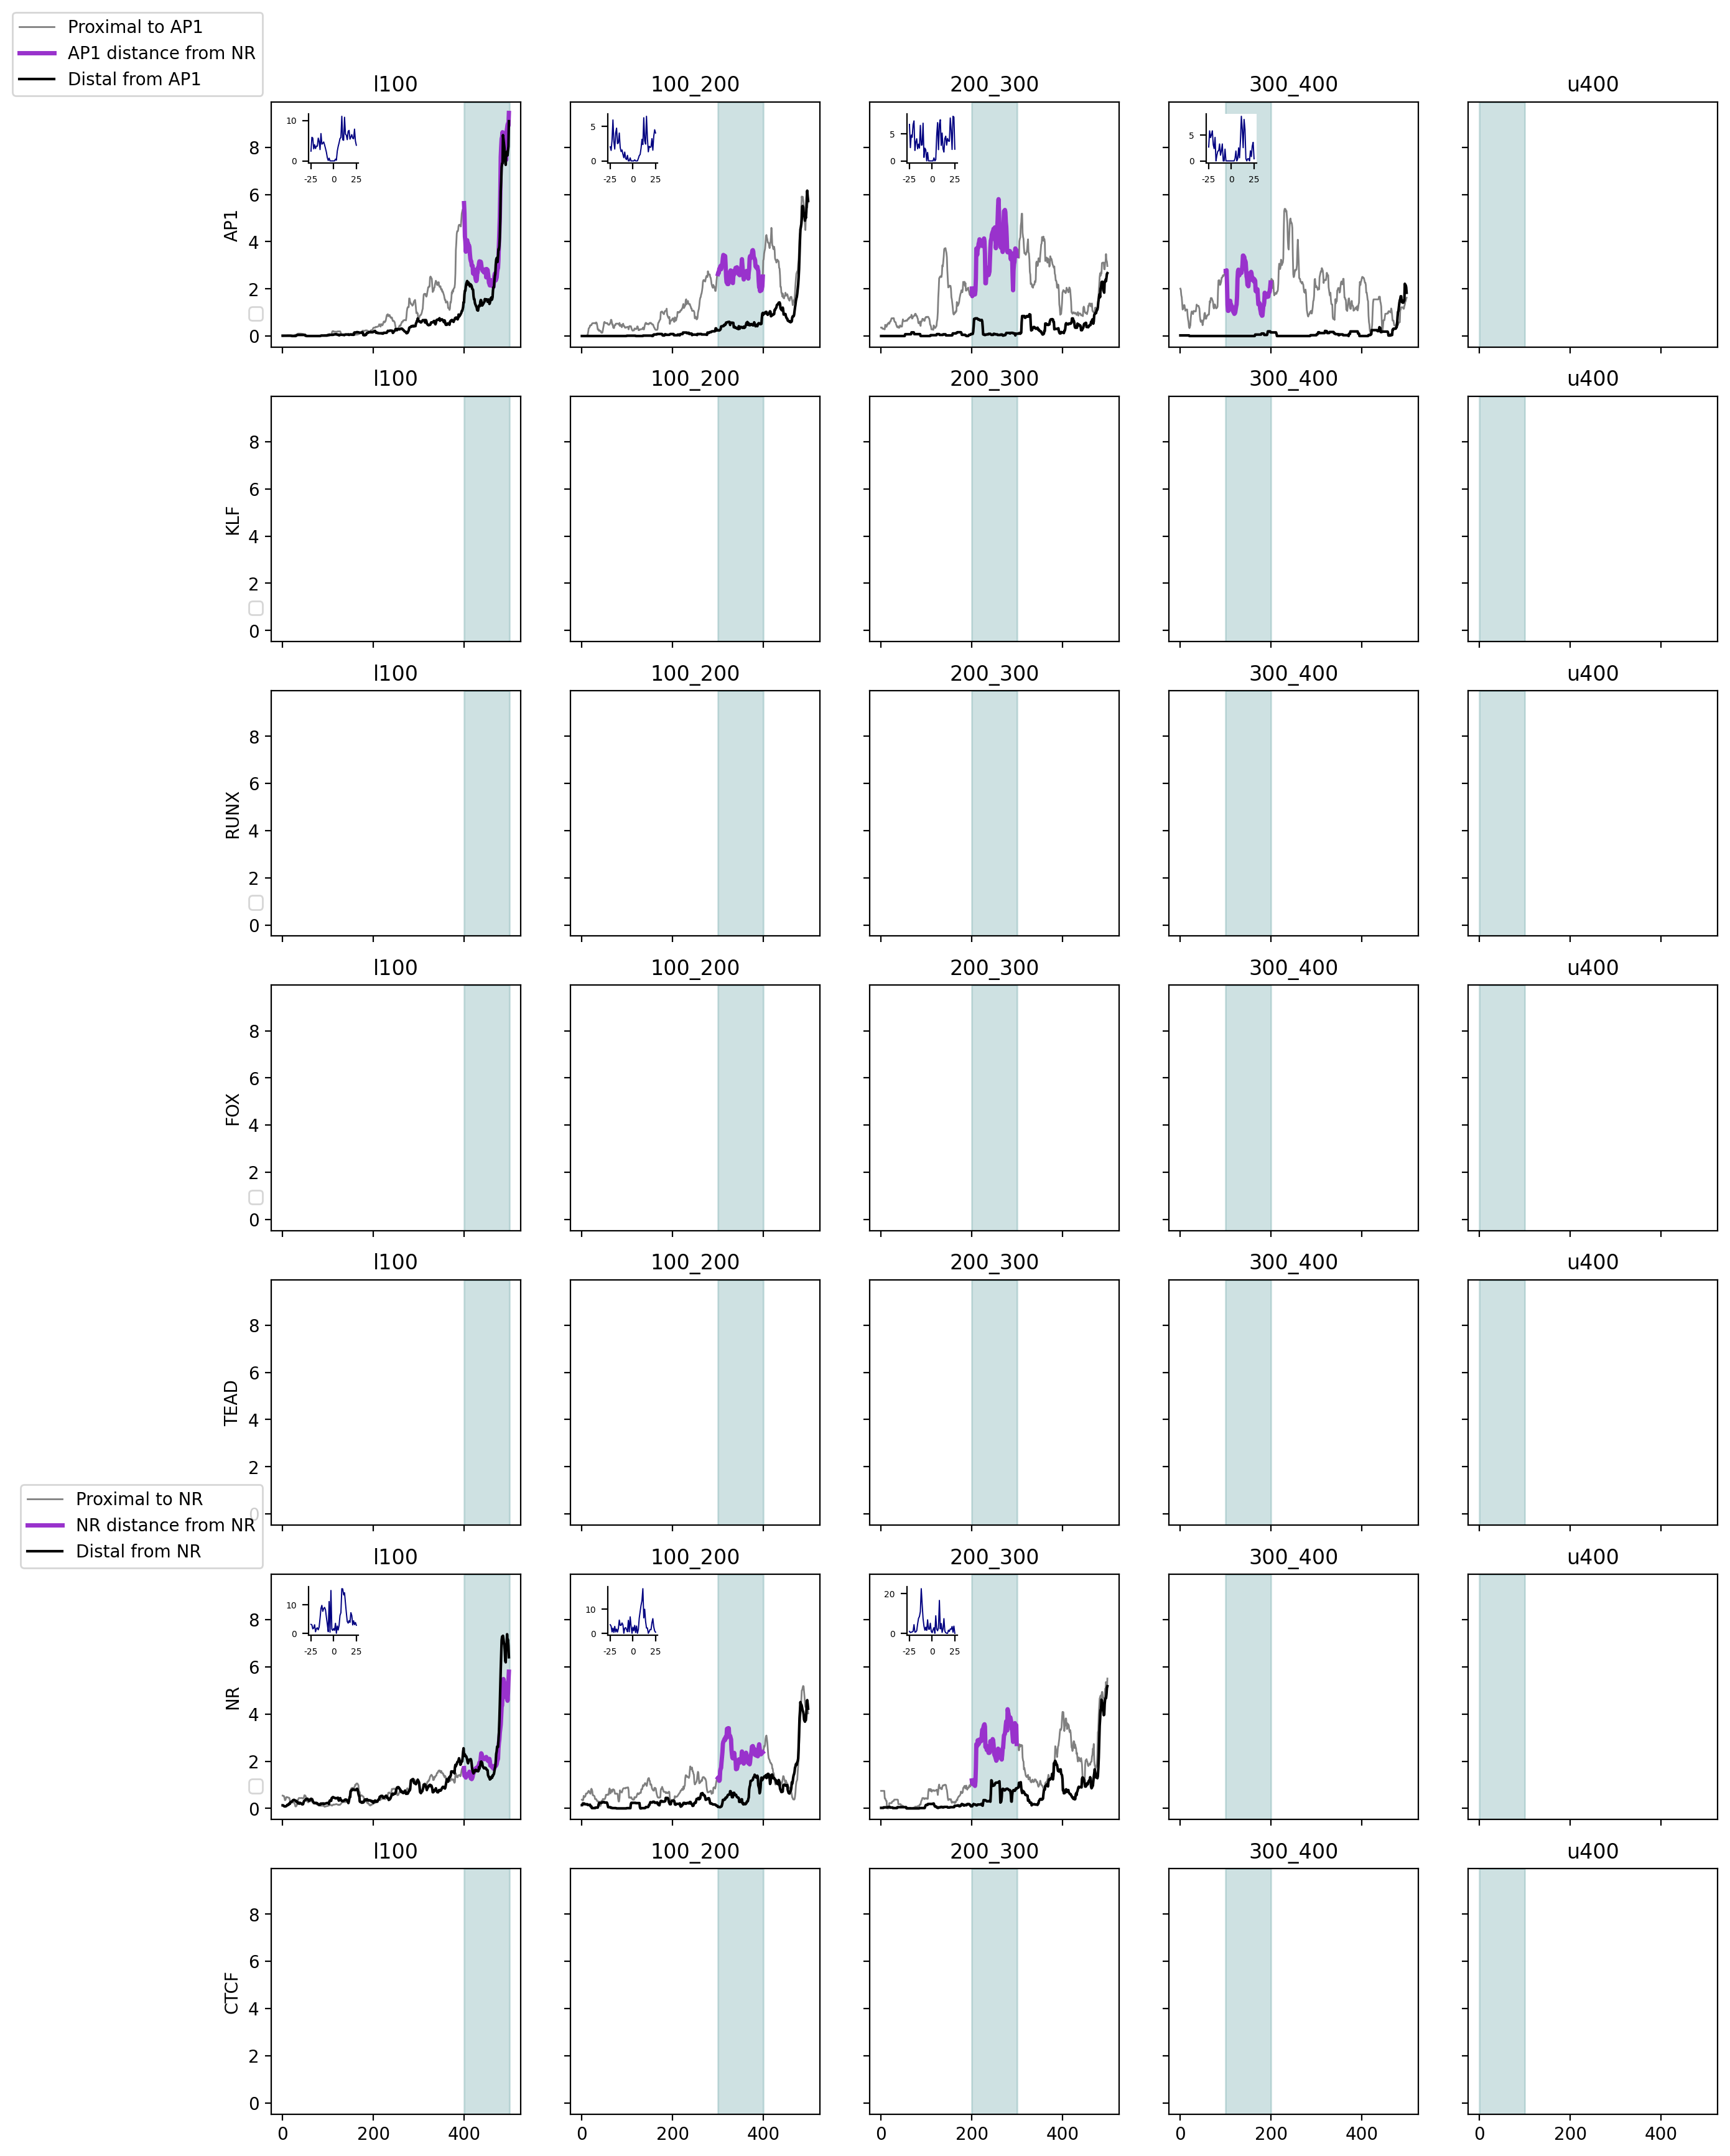

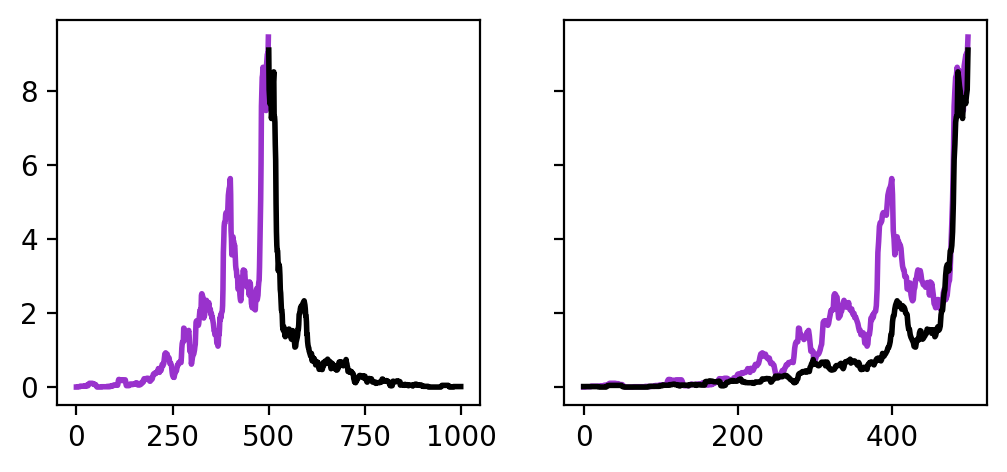

In [26]:
mlist = ['AP1', 'KLF', 'RUNX', 'FOX', 'TEAD', 'halfsite','CTCF']

rmsear, fig, _ = plot_profiles(means_dist_ar, fps_ar, mlist)

fig.savefig('figures/Fig6/ar_NR_drop.pdf')

mlist = ['AP1', 'KLF', 'RUNX', 'FOX', 'TEAD', 'NR','CTCF']

means_dist_ar_hs, fps_ar_hs = extract_signals_with_dists(mid_motifs_ardbd.filter(regex='Chromosome|halfsite_'),avebwar, mlist, pyranges_ardbd)
rmsear, fig_hs, _ = plot_profiles(means_dist_ar_hs, fps_ar_hs, mlist)
fig_hs.savefig('figures/Fig6/ar_hs_drop.pdf')


/tmp/ipykernel_4140466/4080449369.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ins.set_yticklabels(ins.get_yticklabels(), size=5)
/tmp/ipykernel_4140466/4080449369.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ins.set_yticklabels(ins.get_yticklabels(), size=5)
/tmp/ipykernel_4140466/4080449369.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ins.set_yticklabels(ins.get_yticklabels(), size=5)
/tmp/ipykernel_4140466/4080449369.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ins.set_yticklabels(ins.get_yticklabels(), size=5)
/tmp/ipykernel_4140466/4080449369.py:160: UserWarning: set_ticklabels() should only be used with a fixed num

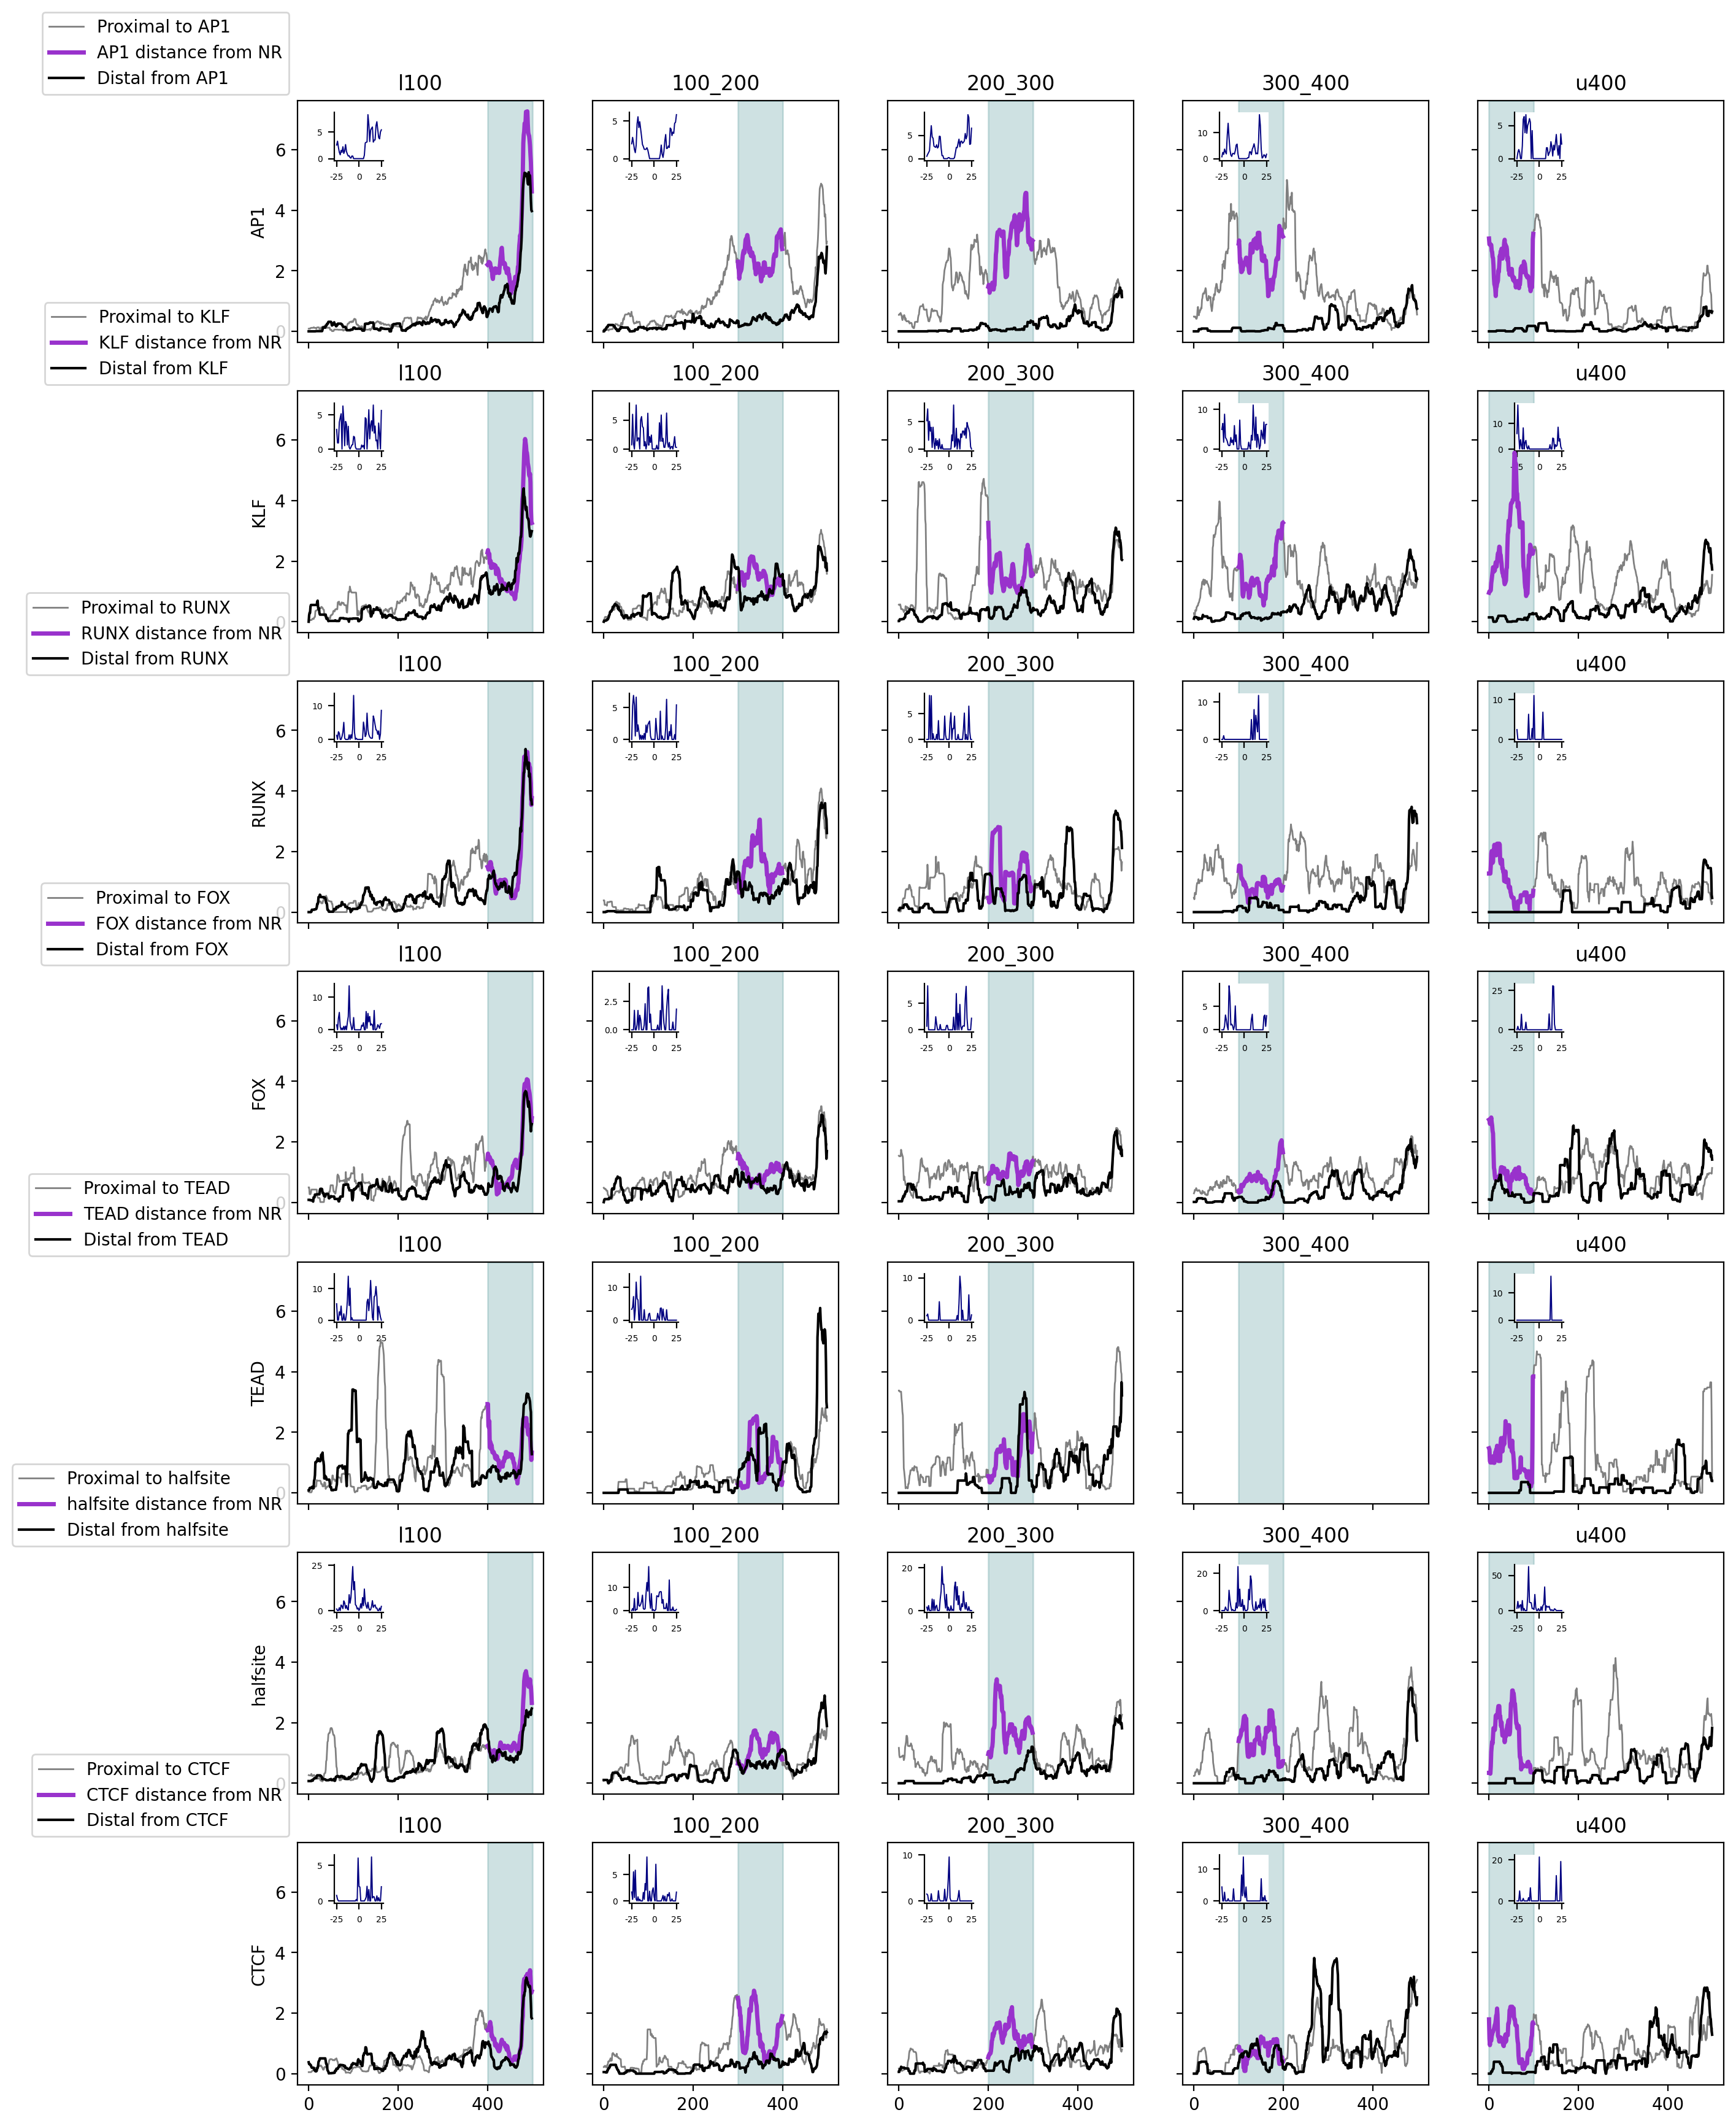

In [35]:
mlist = ['AP1', 'KLF', 'RUNX', 'FOX', 'TEAD', 'halfsite','CTCF']

rmsear, fig, f2 = plot_profiles(means_dist_pr, fps_pr, mlist)

fig.savefig('figures/Fig6/pr_NR_drop.pdf')
plt.close(f2)

/tmp/ipykernel_4140466/4080449369.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ins.set_yticklabels(ins.get_yticklabels(), size=5)
/tmp/ipykernel_4140466/4080449369.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ins.set_yticklabels(ins.get_yticklabels(), size=5)
/tmp/ipykernel_4140466/4080449369.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ins.set_yticklabels(ins.get_yticklabels(), size=5)
/tmp/ipykernel_4140466/4080449369.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ins.set_yticklabels(ins.get_yticklabels(), size=5)
/tmp/ipykernel_4140466/4080449369.py:160: UserWarning: set_ticklabels() should only be used with a fixed num

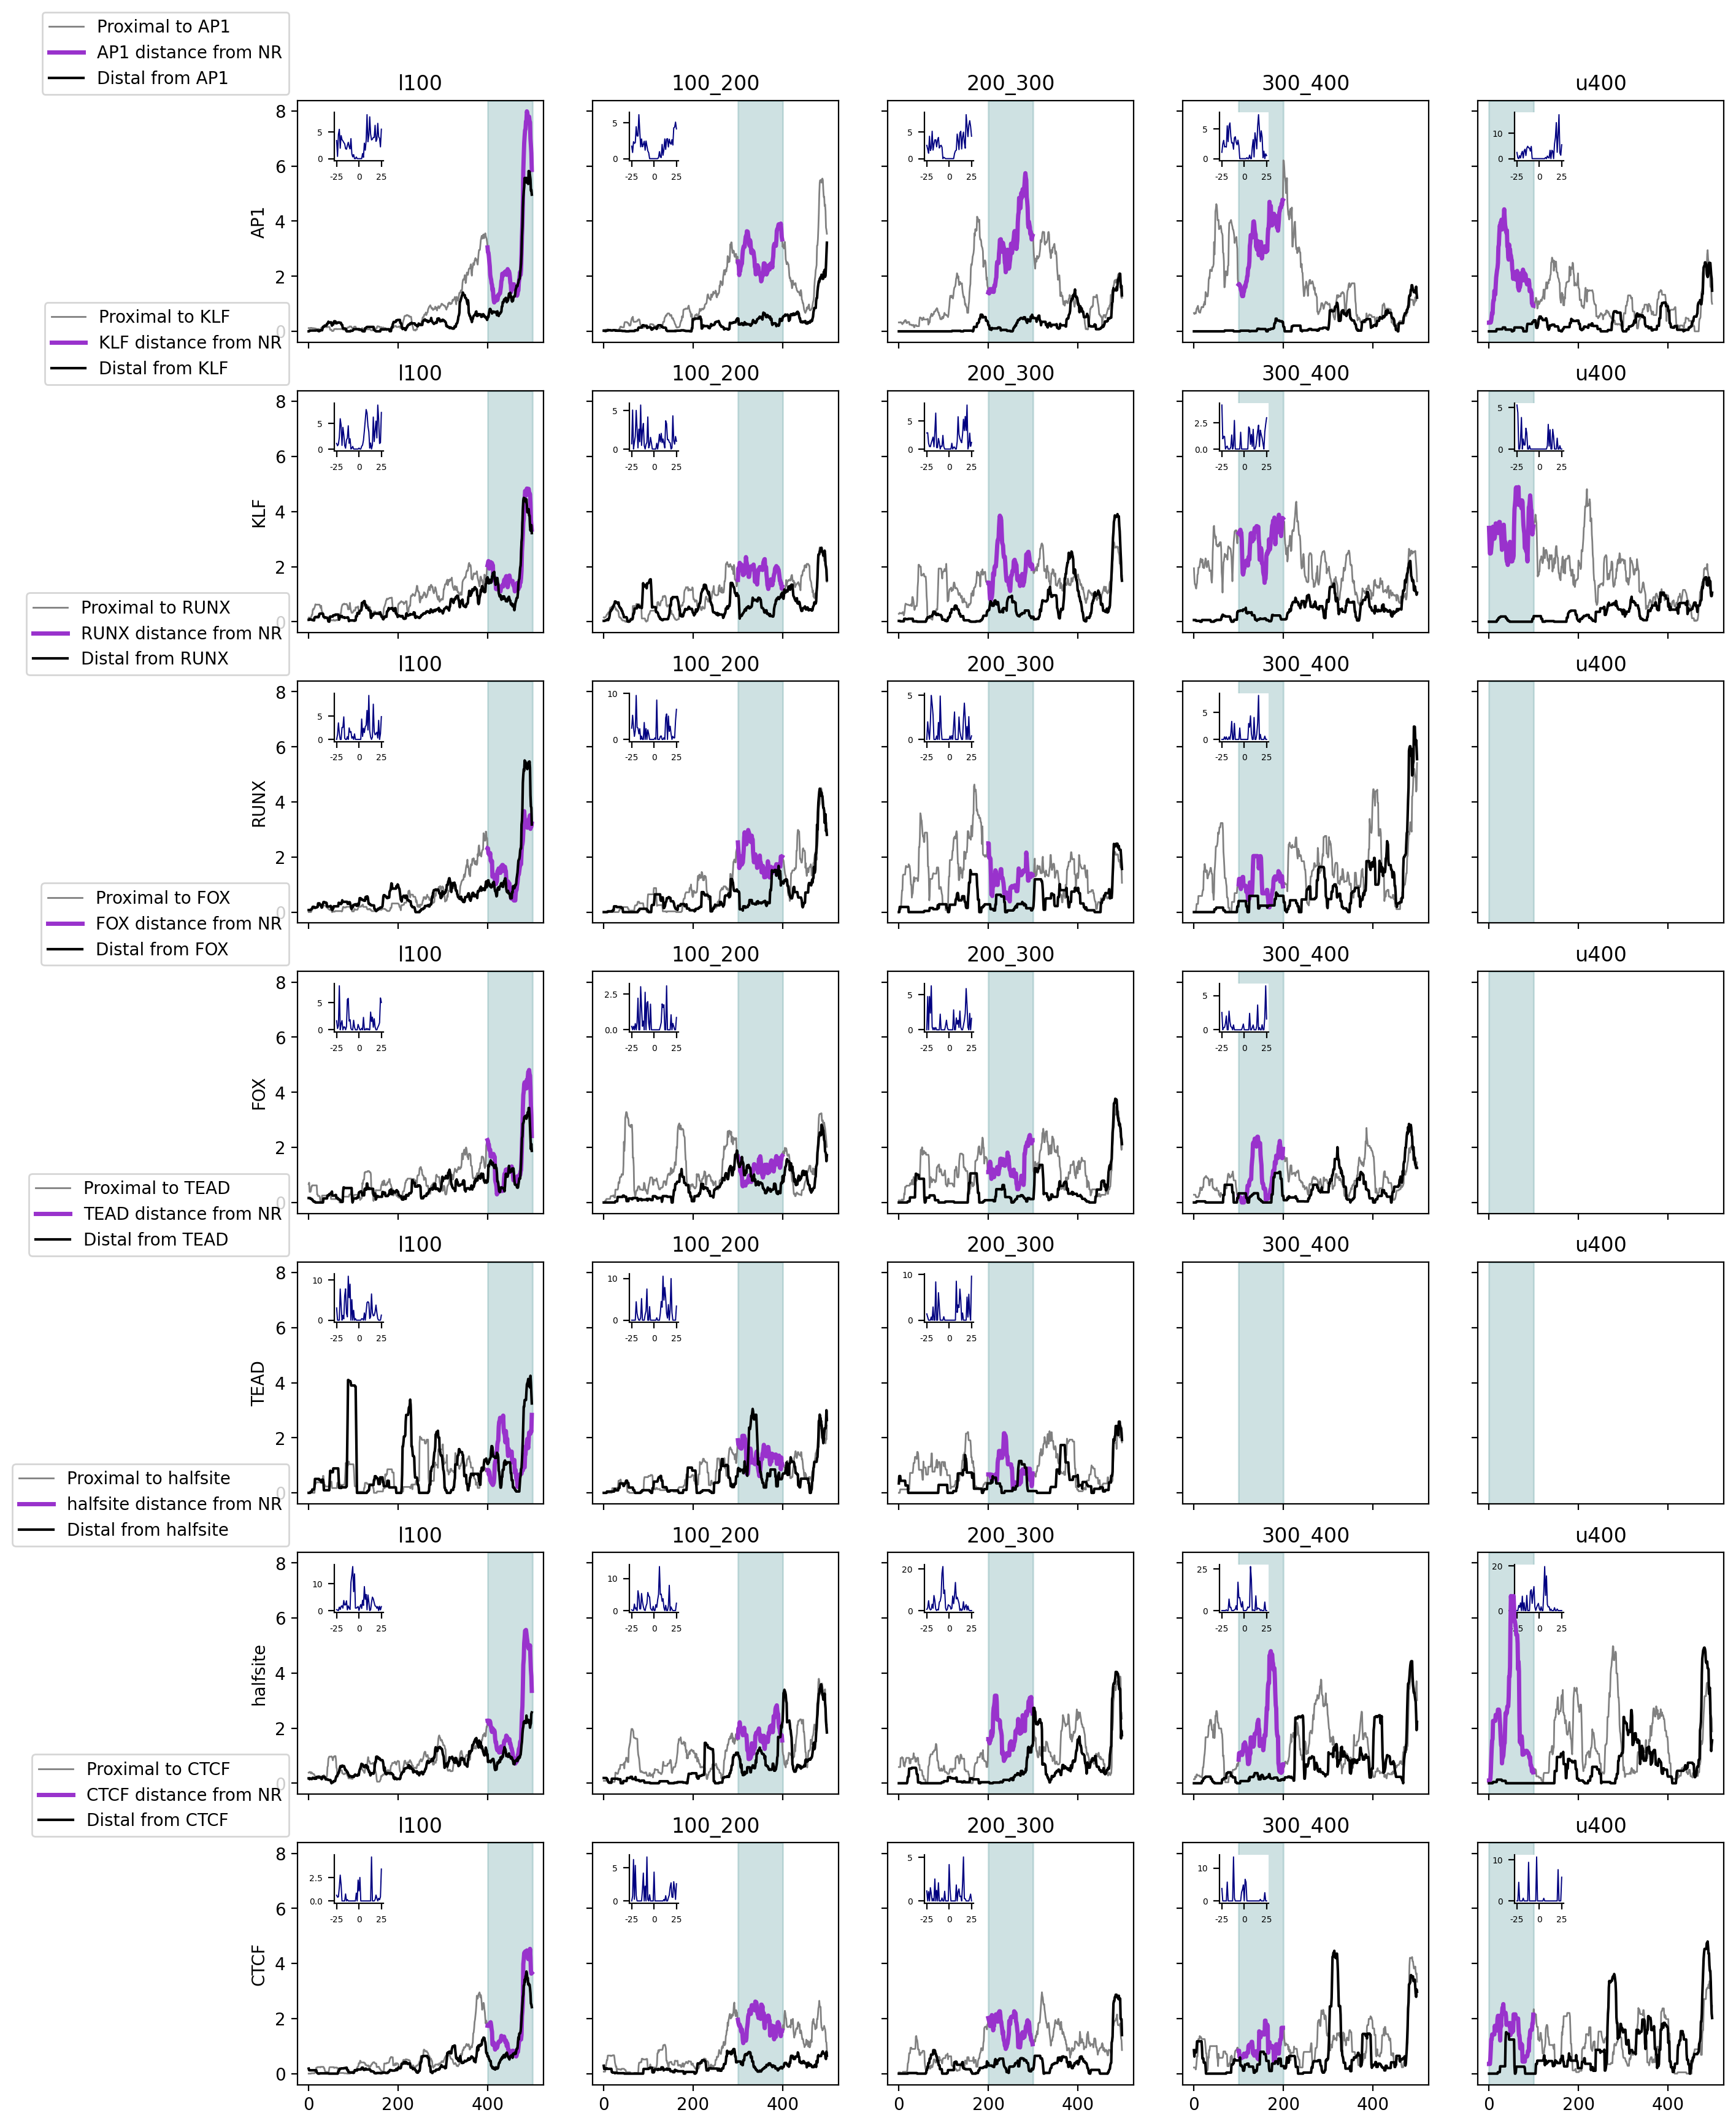

In [36]:
mlist = ['AP1', 'KLF', 'RUNX', 'FOX', 'TEAD', 'halfsite','CTCF']

rmsear, fig, f2 = plot_profiles(means_dist_gr, fps_gr, mlist)

fig.savefig('figures/Fig6/gr_NR_drop.pdf')
plt.close(f2)

In [27]:

# fig, (ax,ax1,ax2) = plt.subplots(3,1, sharey=True, figsize=(3.5,10), sharex=True, dpi=150)

# stats_df = pd.DataFrame(rmsearlig)
# stats_df.filter(regex='rmse', axis=0).loc[:, 'AP1'].plot(ax=ax, marker='o', lw=0.5, ls=':', label='AP1 diff from SR')
# stats_df.filter(regex='peak', axis=0).loc[:, 'AP1'].plot(ax=ax, marker='o', lw=0.5, ls=':', label='SR peak signal')

# stats_df = pd.DataFrame(rmseardlbd)
# stats_df.filter(regex='rmse', axis=0).loc[:, 'AP1'].plot(ax=ax1, marker='o', lw=0.5, ls=':', label='AP1 diff from SR')
# stats_df.filter(regex='peak', axis=0).loc[:, 'AP1'].plot(ax=ax1, marker='o', lw=0.5, ls=':', label='SR peak signal')

# stats_df = pd.DataFrame(rmsear)
# stats_df.filter(regex='rmse', axis=0).loc[:, 'AP1'].plot(ax=ax2, marker='o', lw=0.5, ls=':', label='AP1 diff from SR')
# stats_df.filter(regex='peak', axis=0).loc[:, 'AP1'].plot(ax=ax2, marker='o', lw=0.5, ls=':', label='SR peak signal')

# for axi,title in zip((ax,ax1,ax2), ['WT+lig', 'dLBD', 'DBD']):
#     axi.legend(bbox_to_anchor=[1,1])
#     axi.set_title(title)
# fig.suptitle('AR')

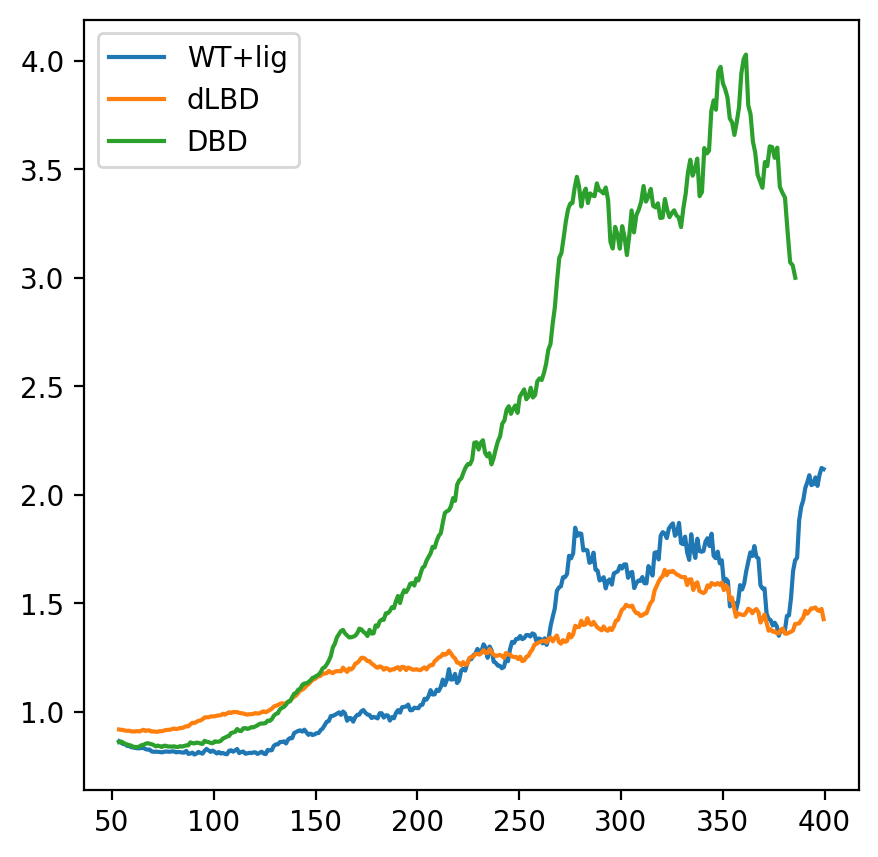

In [28]:
fig, ax = plt.subplots(1, figsize=(5,5))



sum_mid = fps_arlig['AP1'].iloc[:, 450:550].mean(axis=1)
t = pd.concat([sum_mid, fps_arlig['AP1'].iloc[:, -1], fps_arlig['AP1'].query("absdist<450").apply(lambda x: x[450-x['absdist']:550-x['absdist']].mean(), axis=1)], axis=1).dropna()
t = t.groupby('absdist').mean().reset_index().rolling(window=100, center=False).apply(lambda x: stats.trim_mean(x, 0.05)) 
ax.plot(t.iloc[:,0], t.iloc[:, 2]/t.iloc[:, 1], label='WT+lig')


sum_mid = fps_ardlbd['AP1'].iloc[:, 450:550].mean(axis=1)
t = pd.concat([sum_mid, fps_ardlbd['AP1'].iloc[:, -1], fps_ardlbd['AP1'].query("absdist<450").apply(lambda x: x[450-x['absdist']:550-x['absdist']].mean(), axis=1)], axis=1).dropna()
t = t.groupby('absdist').mean().reset_index().rolling(window=100, center=False).apply(lambda x: stats.trim_mean(x, 0.05)) 
ax.plot(t.iloc[:,0], t.iloc[:, 2]/t.iloc[:, 1], label='dLBD')

sum_mid = fps_ar['AP1'].iloc[:, 450:550].mean(axis=1)
t = pd.concat([sum_mid, fps_ar['AP1'].iloc[:, -1], fps_ar['AP1'].query("absdist<450").apply(lambda x: x[450-x['absdist']:550-x['absdist']].mean(), axis=1)], axis=1).dropna()
t = t.groupby('absdist').mean().reset_index().rolling(window=100, center=False).apply(lambda x: stats.trim_mean(x, 0.05)) 
ax.plot(t.iloc[:,0], t.iloc[:, 2]/t.iloc[:, 1], label='DBD')

ax.legend()

fig.savefig('figures/Fig6/ap1_effect_ar.pdf')

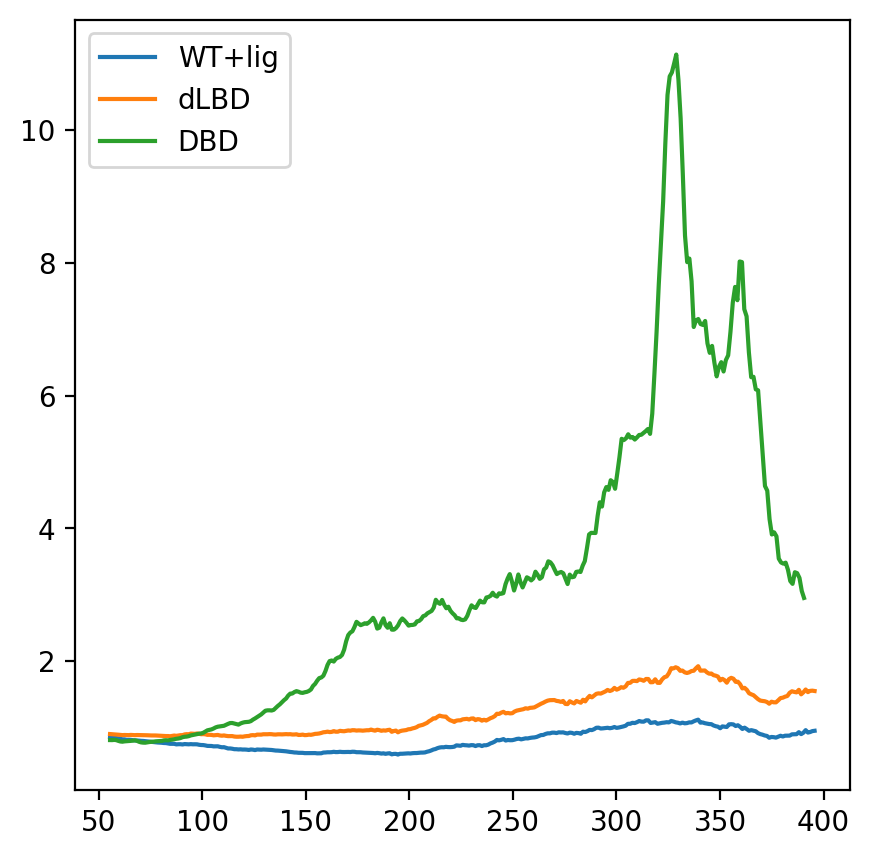

In [29]:
fig, ax = plt.subplots(1, figsize=(5,5))


sum_mid = fps_prlig['AP1'].iloc[:, 450:550].mean(axis=1)
t = pd.concat([sum_mid, fps_prlig['AP1'].iloc[:, -1], fps_prlig['AP1'].query("absdist<450").apply(lambda x: x[450-x['absdist']:550-x['absdist']].mean(), axis=1)], axis=1).dropna()
t = t.groupby('absdist').mean().reset_index().rolling(window=100, center=False).apply(lambda x: stats.trim_mean(x, 0.05)) 
ax.plot(t.iloc[:,0], t.iloc[:, 2]/t.iloc[:, 1], label='WT+lig')

sum_mid = fps_prdlbd['AP1'].iloc[:, 450:550].mean(axis=1)
t = pd.concat([sum_mid, fps_prdlbd['AP1'].iloc[:, -1], fps_prdlbd['AP1'].query("absdist<450").apply(lambda x: x[450-x['absdist']:550-x['absdist']].mean(), axis=1)], axis=1).dropna()
t = t.groupby('absdist').mean().reset_index().rolling(window=100, center=False).apply(lambda x: stats.trim_mean(x, 0.05)) 
ax.plot(t.iloc[:,0], t.iloc[:, 2]/t.iloc[:, 1], label='dLBD')

sum_mid = fps_pr['AP1'].iloc[:, 450:550].mean(axis=1)
t = pd.concat([sum_mid, fps_pr['AP1'].iloc[:, -1], fps_pr['AP1'].query("absdist<450").apply(lambda x: x[450-x['absdist']:550-x['absdist']].mean(), axis=1)], axis=1).dropna()
t = t.groupby('absdist').mean().reset_index().rolling(window=100, center=False).apply(lambda x: stats.trim_mean(x, 0.05)) 
ax.plot(t.iloc[:,0], t.iloc[:, 2]/t.iloc[:, 1], label='DBD')

ax.legend()

fig.savefig('figures/Fig6/ap1_effect_pr.pdf')

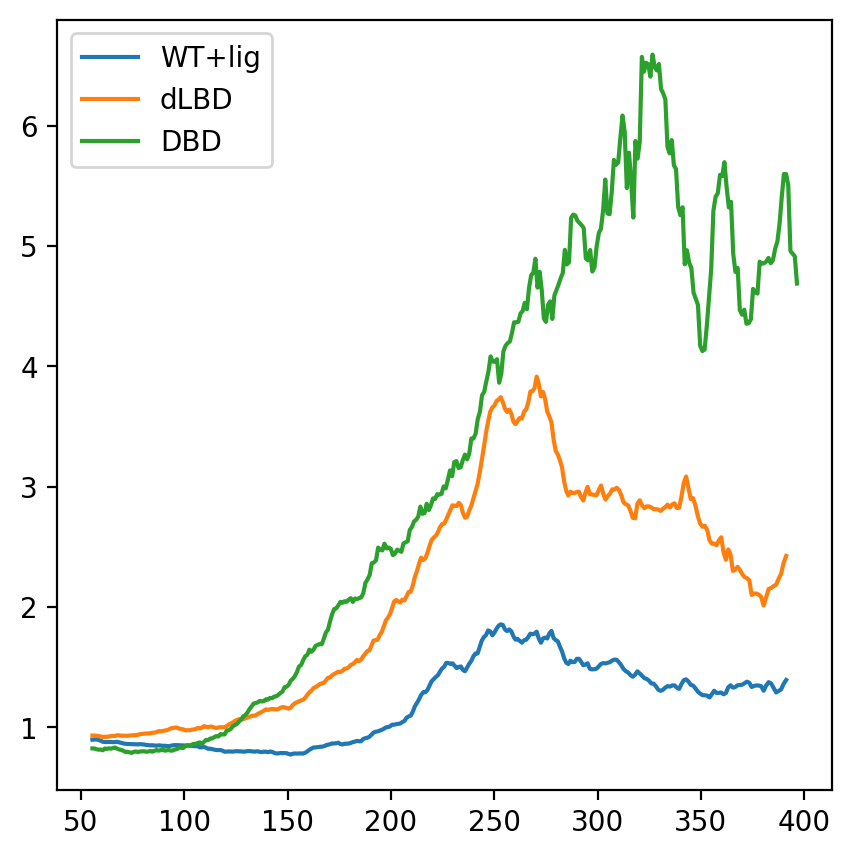

In [30]:
fig, ax = plt.subplots(1, figsize=(5,5))


sum_mid = fps_grlig['AP1'].iloc[:, 450:550].mean(axis=1)
t = pd.concat([sum_mid, fps_grlig['AP1'].iloc[:, -1], fps_grlig['AP1'].query("absdist<450").apply(lambda x: x[450-x['absdist']:550-x['absdist']].mean(), axis=1)], axis=1).dropna()
t = t.groupby('absdist').mean().reset_index().rolling(window=100, center=False).apply(lambda x: stats.trim_mean(x, 0.05)) 
ax.plot(t.iloc[:,0], t.iloc[:, 2]/t.iloc[:, 1], label='WT+lig')

sum_mid = fps_grdlbd['AP1'].iloc[:, 450:550].mean(axis=1)
t = pd.concat([sum_mid, fps_grdlbd['AP1'].iloc[:, -1], fps_grdlbd['AP1'].query("absdist<450").apply(lambda x: x[450-x['absdist']:550-x['absdist']].mean(), axis=1)], axis=1).dropna()
t = t.groupby('absdist').mean().reset_index().rolling(window=100, center=False).apply(lambda x: stats.trim_mean(x, 0.05)) 
ax.plot(t.iloc[:,0], t.iloc[:, 2]/t.iloc[:, 1], label='dLBD')

sum_mid = fps_gr['AP1'].iloc[:, 450:550].mean(axis=1)
t = pd.concat([sum_mid, fps_gr['AP1'].iloc[:, -1], fps_gr['AP1'].query("absdist<450").apply(lambda x: x[450-x['absdist']:550-x['absdist']].mean(), axis=1)], axis=1).dropna()
t = t.groupby('absdist').mean().reset_index().rolling(window=100, center=False).apply(lambda x: stats.trim_mean(x, 0.05)) 
ax.plot(t.iloc[:,0], t.iloc[:, 2]/t.iloc[:, 1], label='DBD')

ax.legend()

fig.savefig('figures/Fig6/ap1_effect_gr.pdf')

In [31]:
# mlist = ['AP1', 'KLF', 'RUNX', 'FOX', 'TEAD', 'NR','CTCF']
# means_dist_ar, fps_ar = extract_signals_with_dists(mid_motifs_ardbd.filter(regex='Chromosome|halfsite_'),avebwar, mlist, pyranges_ardbd)
# means_dist_pr, fps_gr = extract_signals_with_dists(mid_motifs_grdbd.filter(regex='Chromosome|halfsite_'),avebwpr, mlist, pyranges_prdbd)
# means_dist_gr, fps_pr = extract_signals_with_dists(mid_motifs_prdbd.filter(regex='Chromosome|halfsite_'),avebwgr, mlist, pyranges_grdbd)

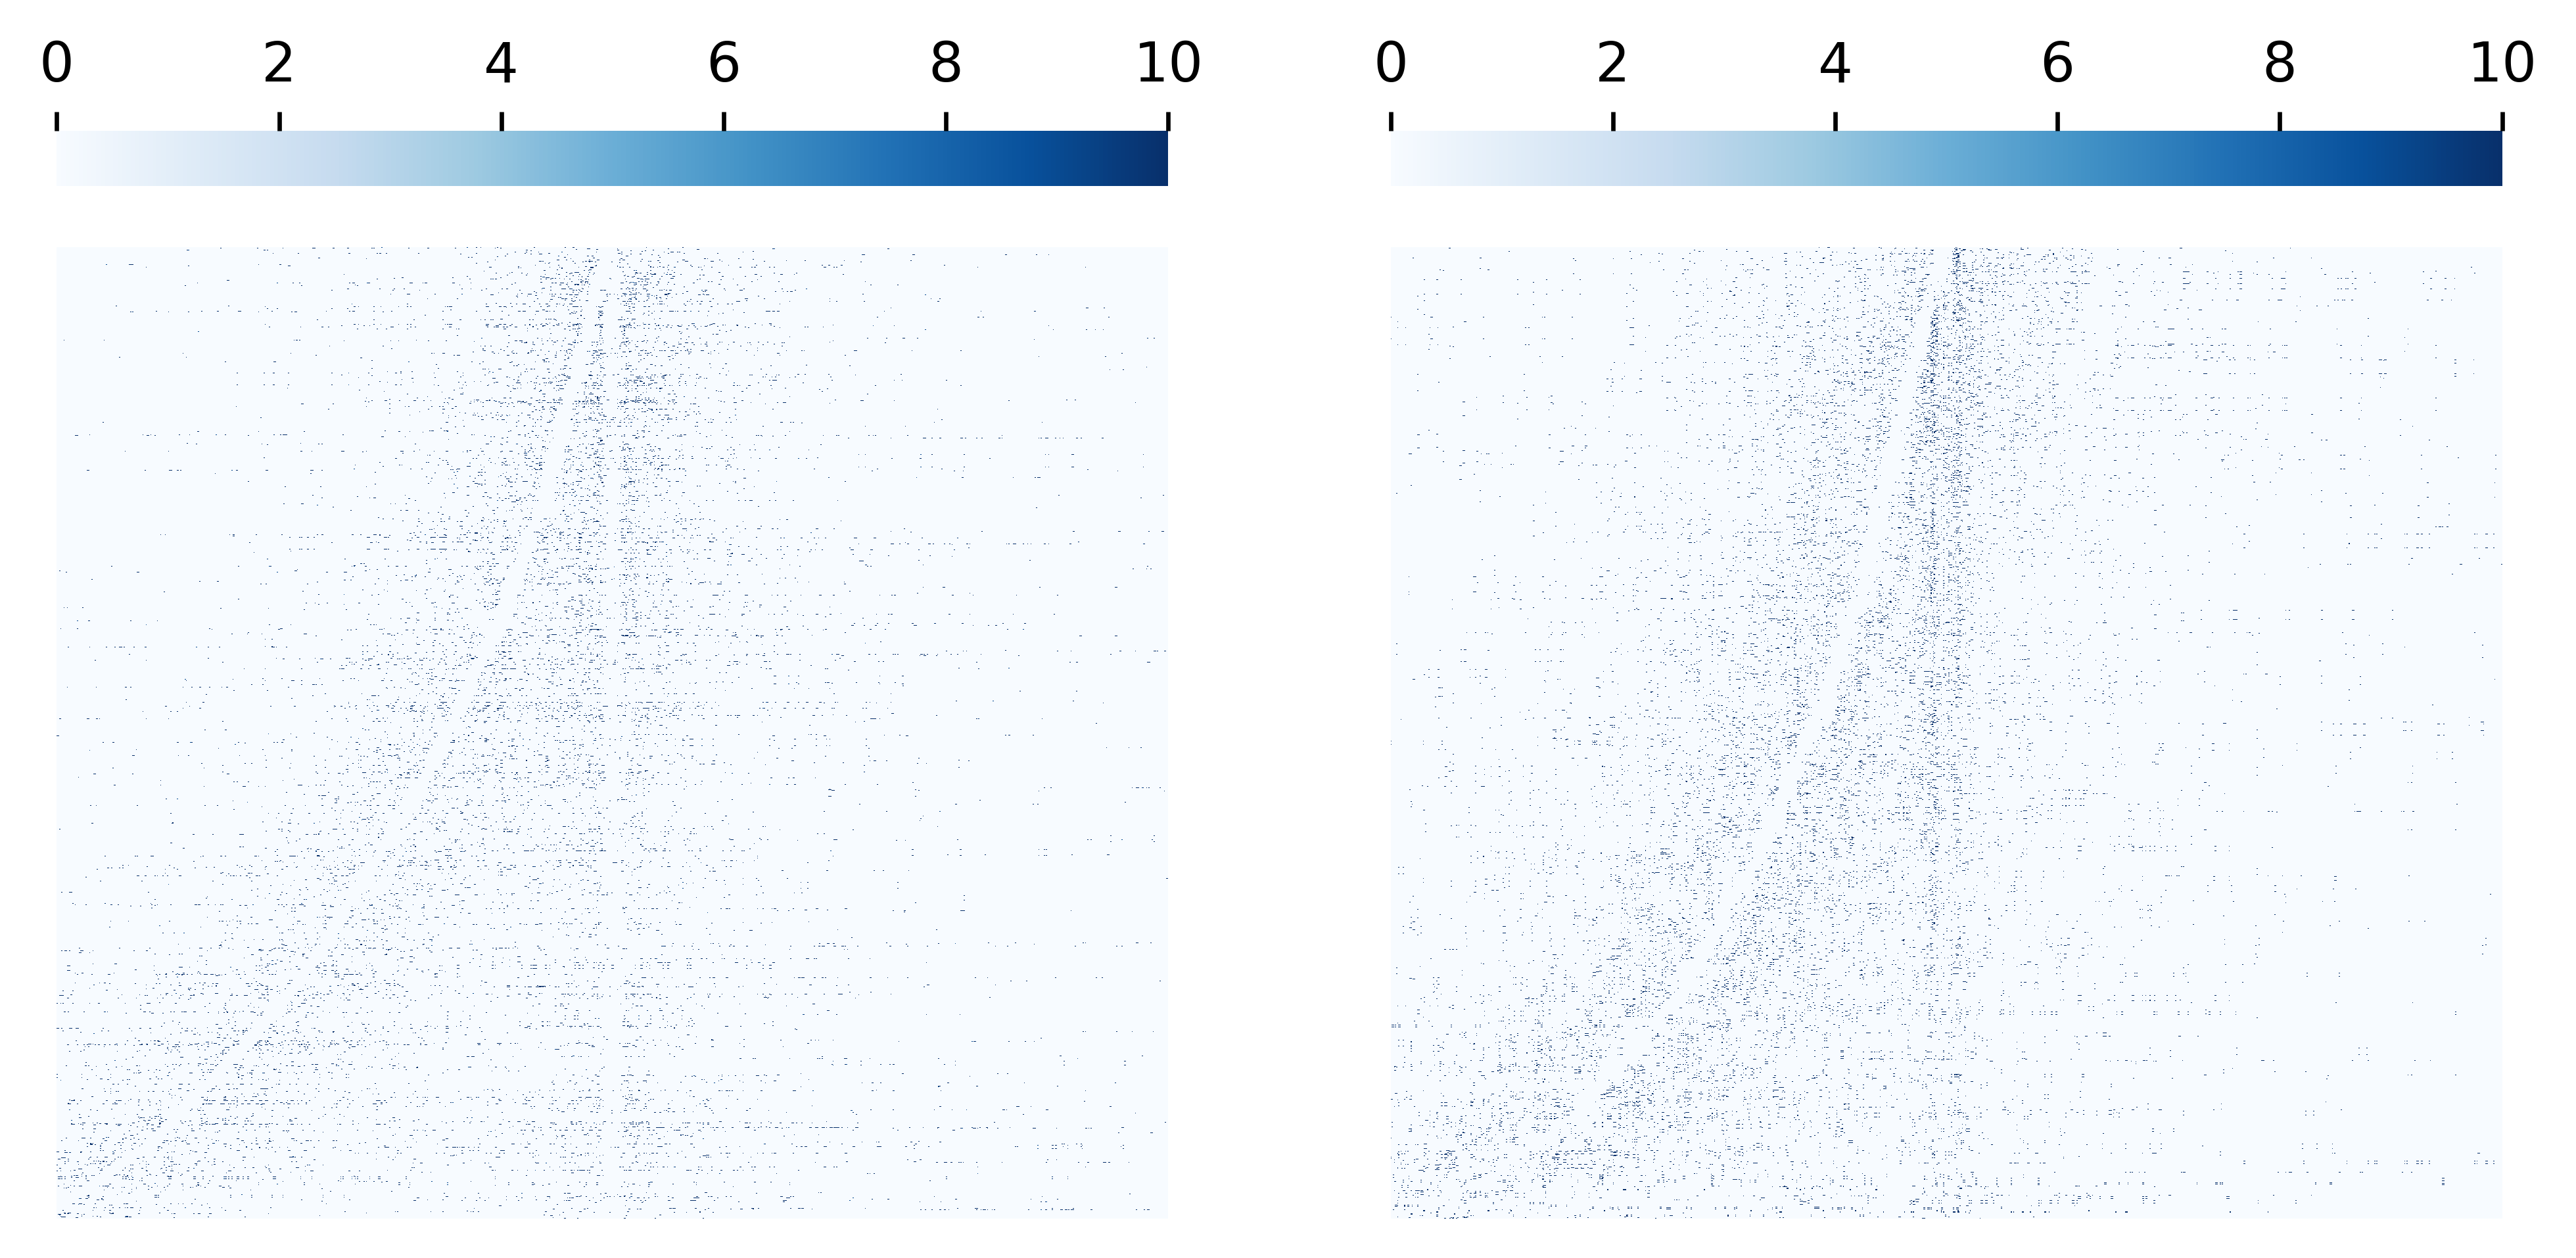

In [32]:
fig, ax = plt.subplots(1,2, dpi=300, figsize=(8,4))

sns.heatmap(fps_ardlbd['AP1'].iloc[:, :-1], cmap='Blues', ax=ax[0], vmax=10,
            xticklabels=False, yticklabels=False, rasterized=True, cbar_kws={'location':'top'})


sns.heatmap(fps_ar['AP1'].iloc[:, :-1], cmap='Blues', ax=ax[1], vmax=10,
            xticklabels=False, yticklabels=False, rasterized=True, cbar_kws={'location':'top'})

fig.savefig('figures/Fig6/sig_drop_ar_htmp.png')

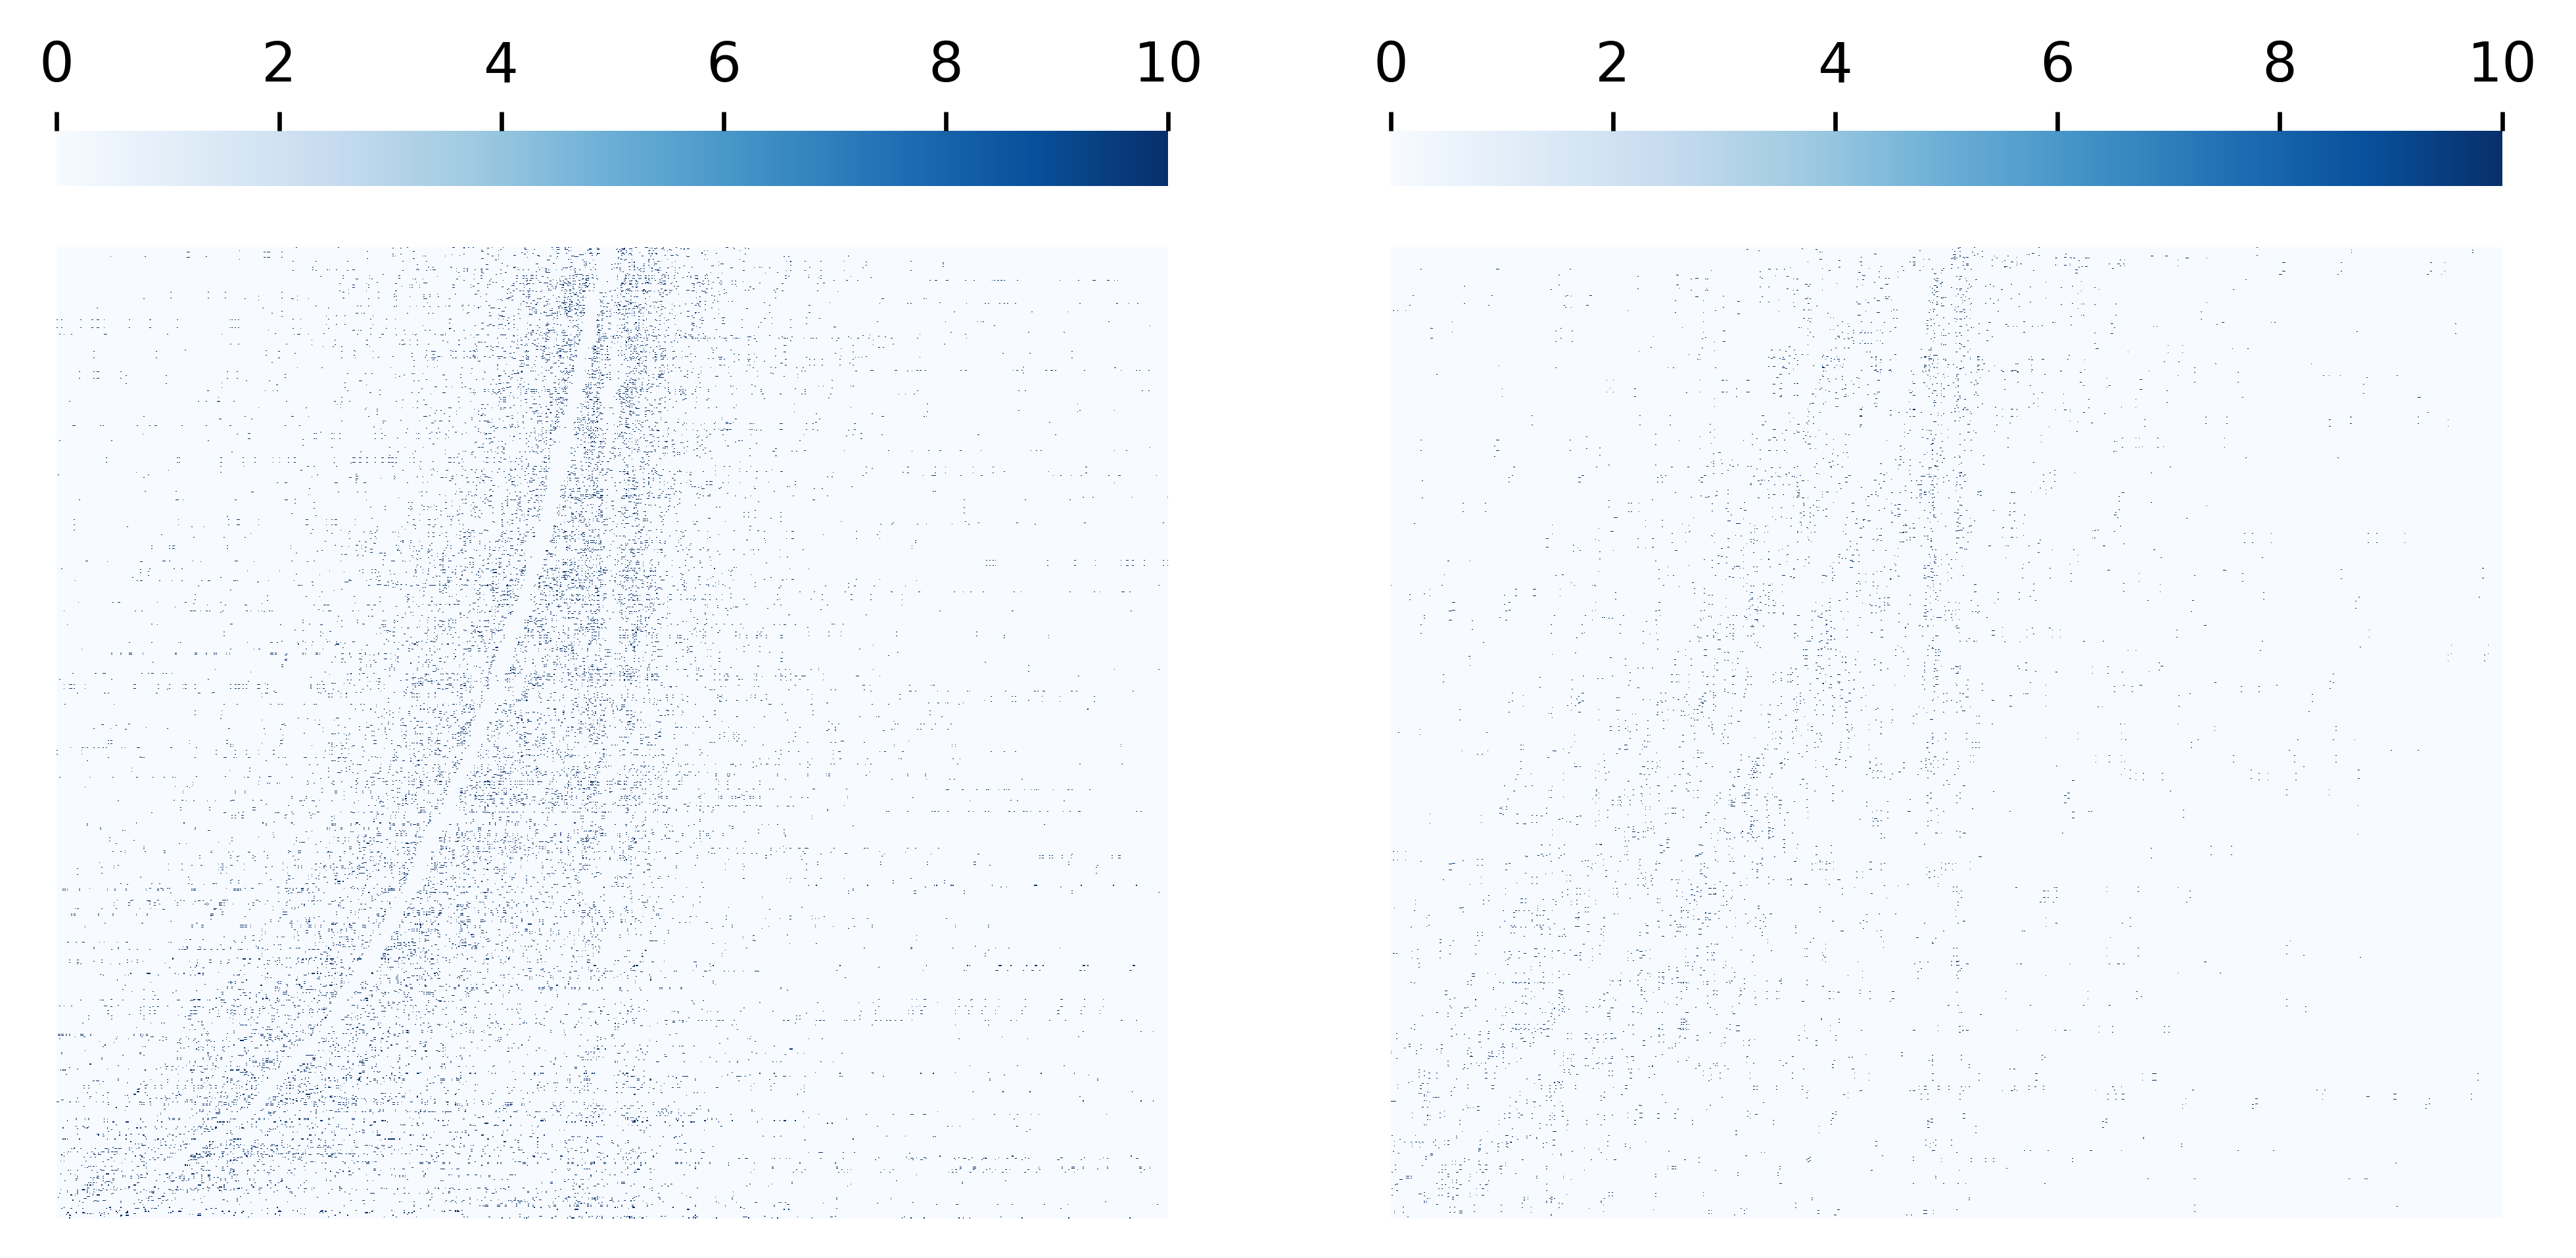

In [33]:
fig, ax = plt.subplots(1,2, dpi=300, figsize=(8,4))


sns.heatmap(fps_grdlbd['AP1'].iloc[:, :-1], cmap='Blues', ax=ax[0], vmax=10,
            xticklabels=False, yticklabels=False, rasterized=True, cbar_kws={'location':'top'})


sns.heatmap(fps_gr['AP1'].iloc[:, :-1], cmap='Blues', ax=ax[1], vmax=10,
            xticklabels=False, yticklabels=False, rasterized=True, cbar_kws={'location':'top'})

fig.savefig('figures/Fig6/sig_drop_gr_htmp.png')

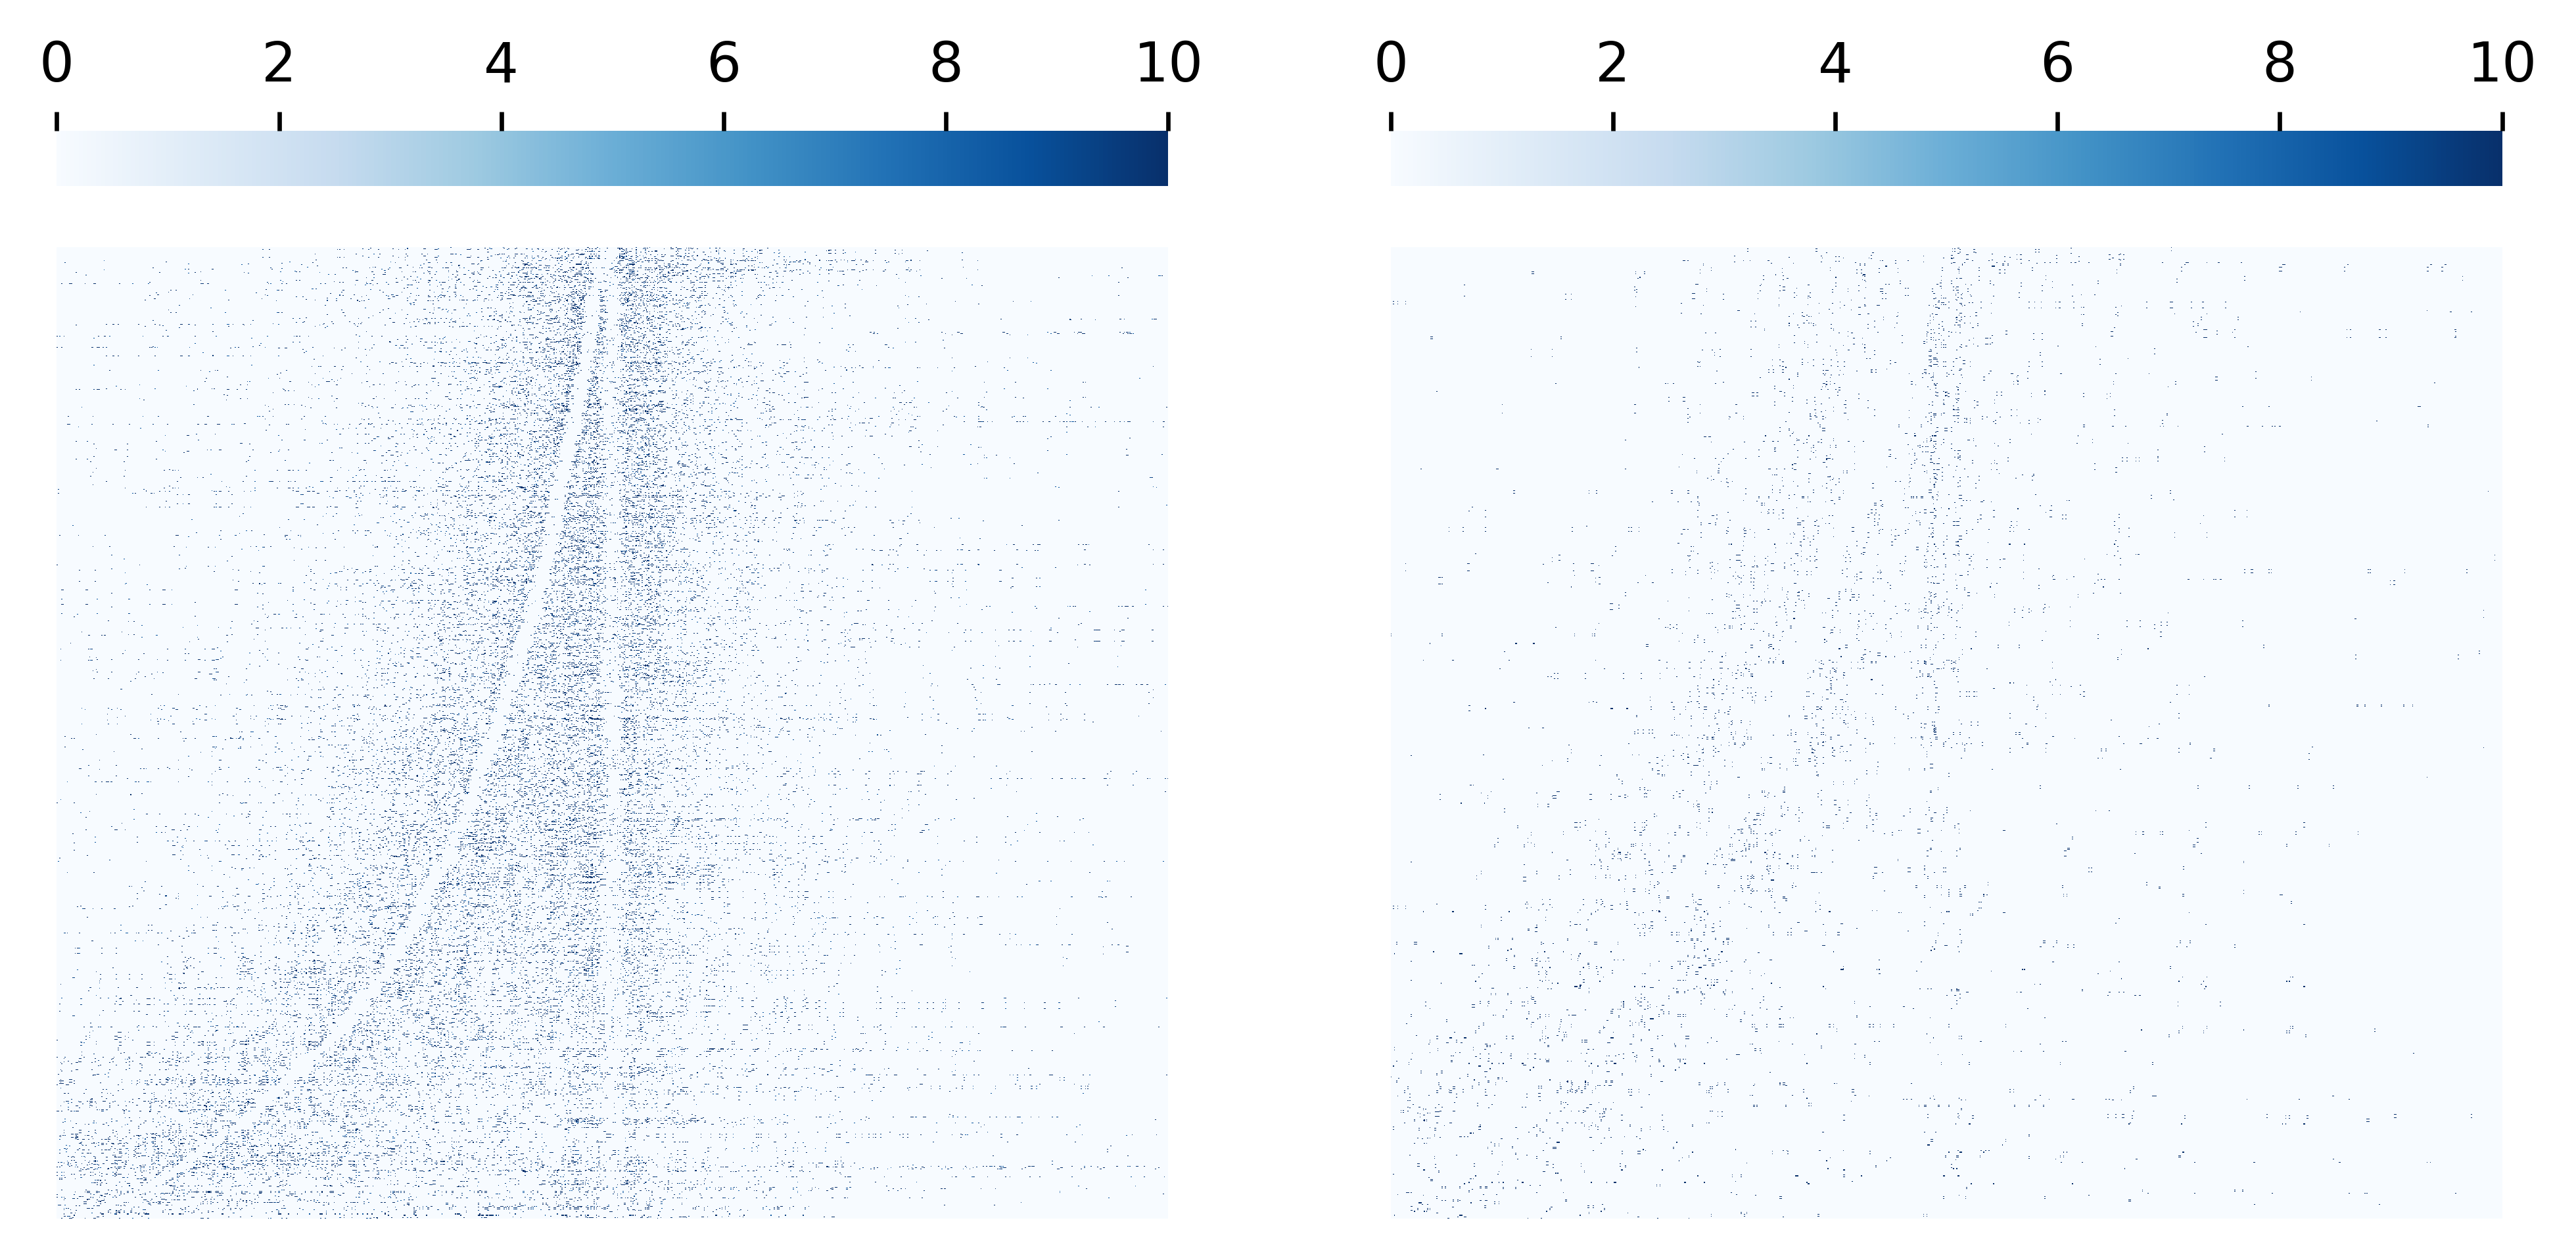

In [34]:
fig, ax = plt.subplots(1,2, dpi=300, figsize=(8,4))


sns.heatmap(fps_prdlbd['AP1'].iloc[:, :-1], cmap='Blues', ax=ax[0], vmax=10,
            xticklabels=False, yticklabels=False, rasterized=True, cbar_kws={'location':'top'})


sns.heatmap(fps_pr['AP1'].iloc[:, :-1], cmap='Blues', ax=ax[1], vmax=10,
            xticklabels=False, yticklabels=False, rasterized=True, cbar_kws={'location':'top'})

fig.savefig('figures/Fig6/sig_drop_pr_htmp.png')

In [34]:
keys = ['nmumg_mar_dlbd', 'nmumg_ar_dlbd_dn100', 'nmumg_ar_dlbd_dn150', 'nmumg_ar_dlbd_dn200',
  'nmumg_mar_dlbd_dn300', 'nmumg_mar_dlbd_dn350', 'nmumg_mar_dlbd_dn400', 'nmumg_mar_dlbd_dn450', 'nmumg_mar_dbd',  ]
mlist = ['AP1']

# fig, ax = plt.subplots(1)
sig_dict = dict()
for i in keys:
    params, cpeak, lf = prep_peak_fimos(i, 'AR', metadata)
    mid_m, npeaks, cpyranges = calculate_motif_distances(f'combined_threshed_peaks_wsummits/output_fimo_fasta_{i}_fc10_AR_NR_mot/fimo.gff', 'AR_NR_mot', loaded_fimos=lf, peak= cpeak)
    cavbw = average_bgs(params.NormBG)
    cmd, cfps = extract_signals_with_dists(mid_m.filter(regex='Chromosome|NR_'),cavbw, mlist, cpyranges)
    sig_dict[i] = cfps



/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curr

AP1


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python

AP1


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python

AP1


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.
/home/labs/barkailab/vovam/.local/lib/python

AP1


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.
/home/labs/barkailab/vovam/.local/lib/python

AP1


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curr

AP1


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curr

AP1


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.
/home/labs/barkailab/vovam/.local/lib/python

AP1


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curr

AP1


/tmp/ipykernel_2655029/4160797367.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(i, val, c=color,)
/tmp/ipykernel_2655029/4160797367.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(i, val, c=color,)
/tmp/ipykernel_2655029/4160797367.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its len

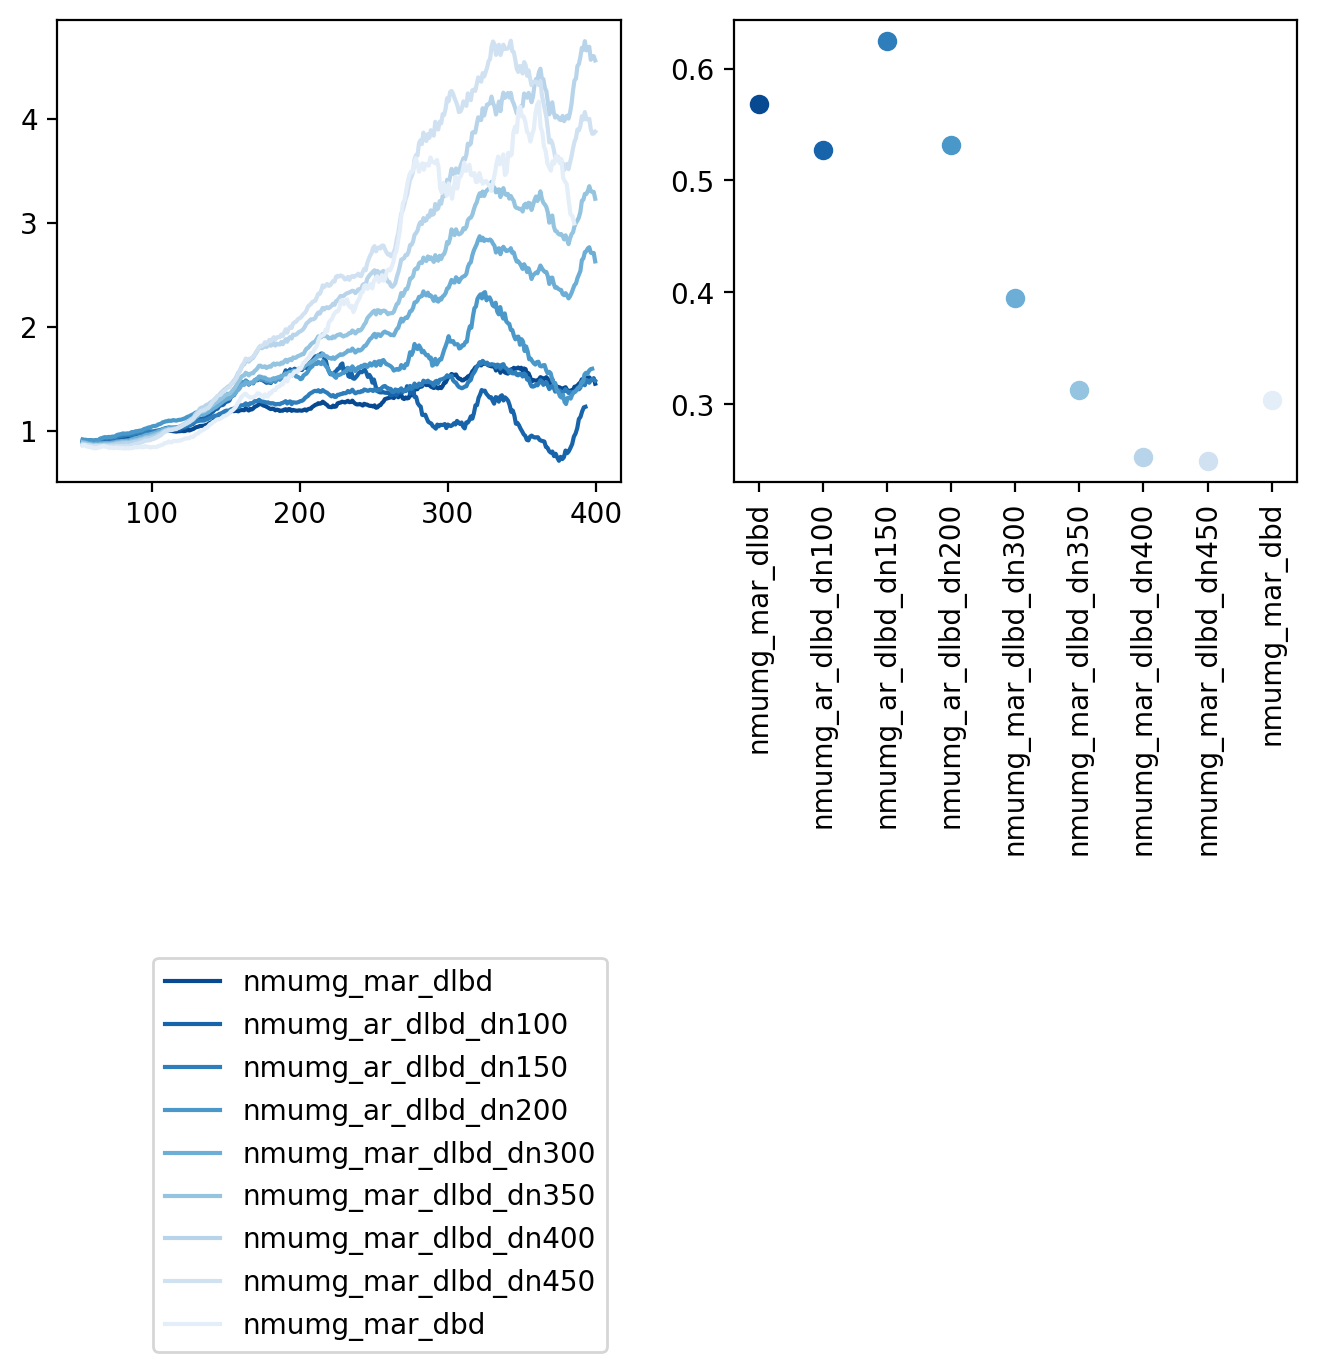

In [35]:
fig, (ax,ax1) = plt.subplots(1,2, sharey=False, figsize=(8,3))
palette = sns.color_palette('Blues_r', n_colors=len(sig_dict))
rmsed = dict()
i=0
for (key, value), color in zip(sig_dict.items(), palette):
    sum_mid = value['AP1'].iloc[:, 450:550].mean(axis=1)
    t = pd.concat([sum_mid, value['AP1'].iloc[:, -1], value['AP1'].query("absdist<450").apply(lambda x: x[450-x['absdist']:550-x['absdist']].mean(), axis=1)], axis=1).dropna()
    smoothed = t.groupby('absdist').mean().reset_index().rolling(window=100, center=False).apply(lambda x: stats.trim_mean(x, 0.1)).dropna()
    val = smoothed.iloc[-100:,1].mean()/smoothed.iloc[:100,1].mean()

    ax.plot(smoothed.absdist, smoothed.iloc[:, 2]/smoothed.iloc[:, 1], label=key, c=color)
    ax1.scatter(i, val, c=color,)
    i+=1
ax1.set_xticks(np.arange(len(keys)), keys, rotation=90)
ax.legend(bbox_to_anchor=[1,-1])
fig.savefig('figures/Fig6/truncations_ap1_ar.pdf')

In [36]:
keys = ['nmumg_hpr_del_lbd', 'nmumg_hpr_dlbd_dn100',
       'nmumg_hpr_dlbd_dn300', 'nmumg_hpr_dlbd_dn450', 'nmumg_hpr_dbd', ]
mlist = ['AP1']

# fig, ax = plt.subplots(1)
sig_dict = dict()
for i in keys:
    params, cpeak, lf = prep_peak_fimos(i, 'PR', metadata)
    mid_m, npeaks, cpyranges = calculate_motif_distances(f'combined_threshed_peaks_wsummits/output_fimo_fasta_{i}_fc10_PR_NR_mot/fimo.gff', 'PR_NR_mot', loaded_fimos=lf, peak= cpeak)
    cavbw = average_bgs(params.NormBG)

    cmd, cfps = extract_signals_with_dists(mid_m.filter(regex='Chromosome|NR_'),cavbw, mlist, cpyranges)
    sig_dict[i] = cfps
    # sum_mid = cfps['AP1'].iloc[:, 450:550].mean(axis=1)
    # t = pd.concat([sum_mid, cfps['AP1'].iloc[:, -1], cfps['AP1'].query("absdist<450").apply(lambda x: x[450-x['absdist']:550-x['absdist']].mean(), axis=1)], axis=1).dropna()
    # t = t.groupby('absdist').mean().reset_index().apply(lambda x: uniform_filter(x, 100))
    # (t.iloc[:,2]/t.iloc[:, 1]).plot(ax=ax, label=i)
    # ax.legend()


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curr

AP1


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python

AP1


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curr

AP1


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python

AP1


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.
/home/labs/barkailab/vovam/.local/lib/python

AP1


/tmp/ipykernel_2655029/317760537.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(i, val, c=color,)
/tmp/ipykernel_2655029/317760537.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(i, val, c=color,)
/tmp/ipykernel_2655029/317760537.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length

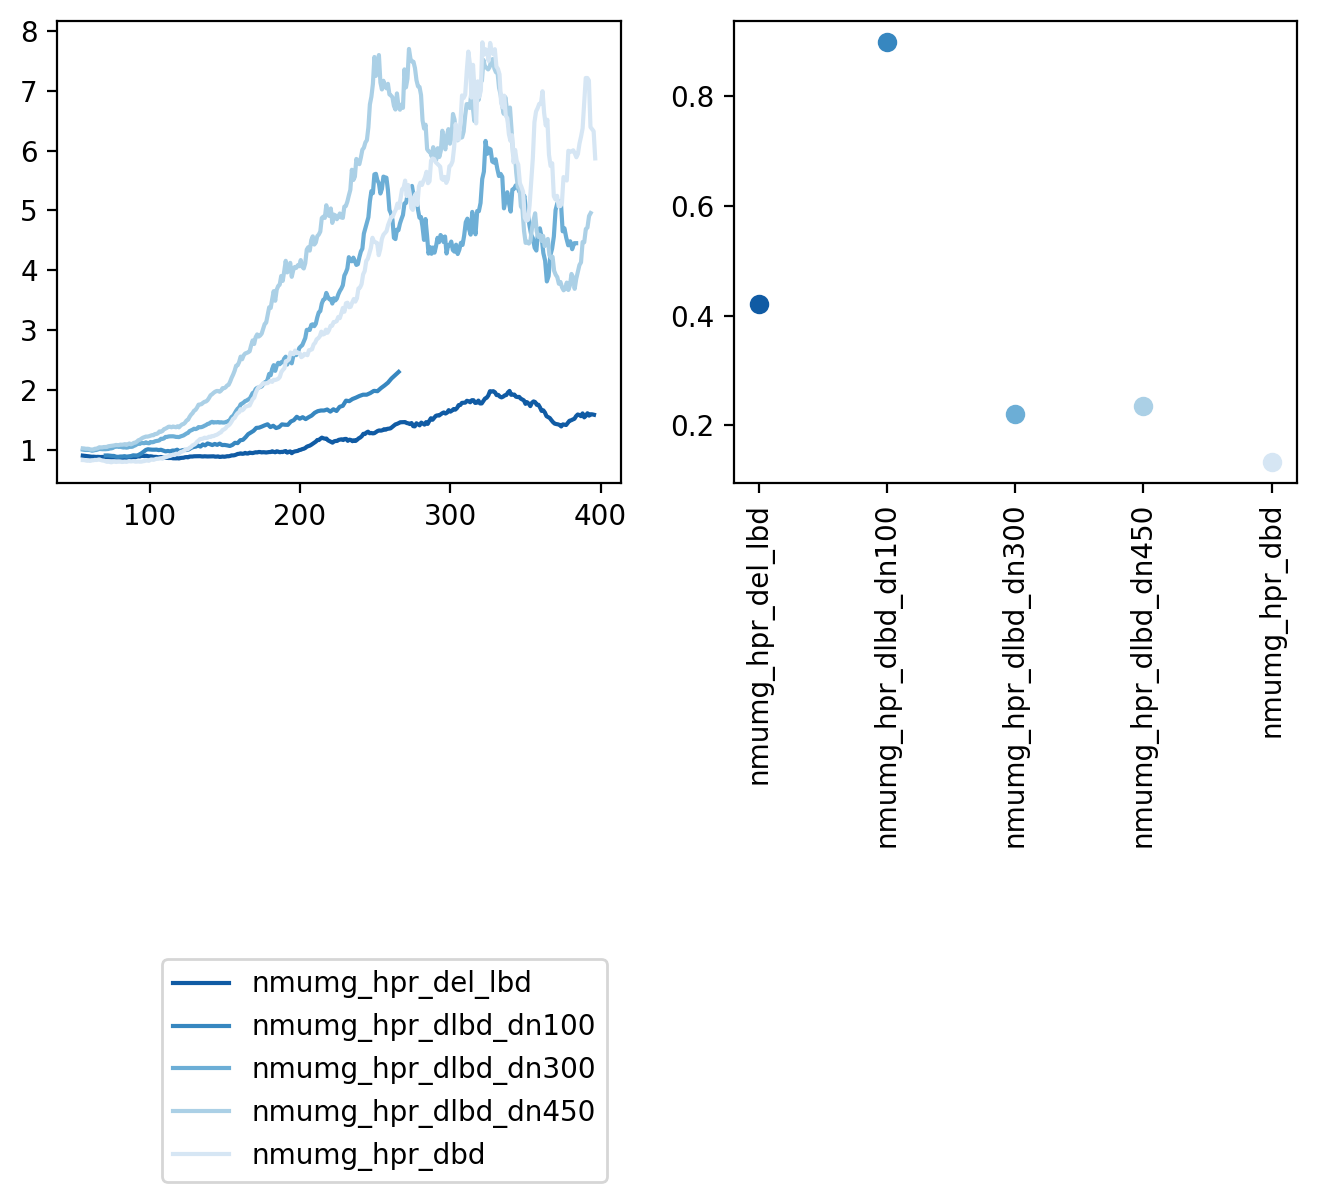

In [37]:
fig, (ax,ax1) = plt.subplots(1,2, sharey=False, figsize=(8,3))
palette = sns.color_palette('Blues_r', n_colors=len(sig_dict))
rmsed = dict()
i=0
for (key, value), color in zip(sig_dict.items(), palette):
    sum_mid = value['AP1'].iloc[:, 450:550].mean(axis=1)
    t = pd.concat([sum_mid, value['AP1'].iloc[:, -1], value['AP1'].query("absdist<450").apply(lambda x: x[450-x['absdist']:550-x['absdist']].mean(), axis=1)], axis=1).dropna()
    smoothed = t.groupby('absdist').mean().reset_index().rolling(window=100, center=False).apply(lambda x: stats.trim_mean(x, 0.1)).dropna()
    val = smoothed.iloc[-100:,1].mean()/smoothed.iloc[:100,1].mean()

    ax.plot(smoothed.absdist, smoothed.iloc[:, 2]/smoothed.iloc[:, 1], label=key, c=color)
    ax1.scatter(i, val, c=color,)
    i+=1
ax1.set_xticks(np.arange(len(keys)), keys, rotation=90)
ax.legend(bbox_to_anchor=[1,-1])
fig.savefig('figures/Fig6/truncations_ap1_pr.pdf')

In [38]:
keys =['nmumg_hgr_dlbd', 'nmumg_hgr_dlbd_dn50','nmumg_gr_dlbd_dn100', 
       'nmumg_hgr_dlbd_dn150', 'nmumg_hgr_dlbd_dn250', 'nmumg_hgr_dlbd_dn300',
       'nmumg_hgr_dbd', 'nmumg_hgr_dlbd_dn400']


mlist = ['AP1']

# fig, ax = plt.subplots(1)
sig_dict = dict()
for i in keys:
    params, cpeak, lf = prep_peak_fimos(i, 'GR', metadata)
    mid_m, npeaks, cpyranges = calculate_motif_distances(f'combined_threshed_peaks_wsummits/output_fimo_fasta_{i}_fc10_GR_NR_mot/fimo.gff', 'GR_NR_mot', loaded_fimos=lf, peak= cpeak)
    cavbw = average_bgs(params.NormBG)

    cmd, cfps = extract_signals_with_dists(mid_m.filter(regex='Chromosome|NR_'),cavbw, mlist, cpyranges)
    sig_dict[i] = cfps



/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curr

AP1


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curr

AP1


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curr

AP1


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curr

AP1


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curr

AP1


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python

AP1


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.
/home/labs/barkailab/vovam/.local/lib/python

AP1


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curr

AP1


/tmp/ipykernel_2655029/1423311452.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(i, val, c=color,)
/tmp/ipykernel_2655029/1423311452.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(i, val, c=color,)
/tmp/ipykernel_2655029/1423311452.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its len

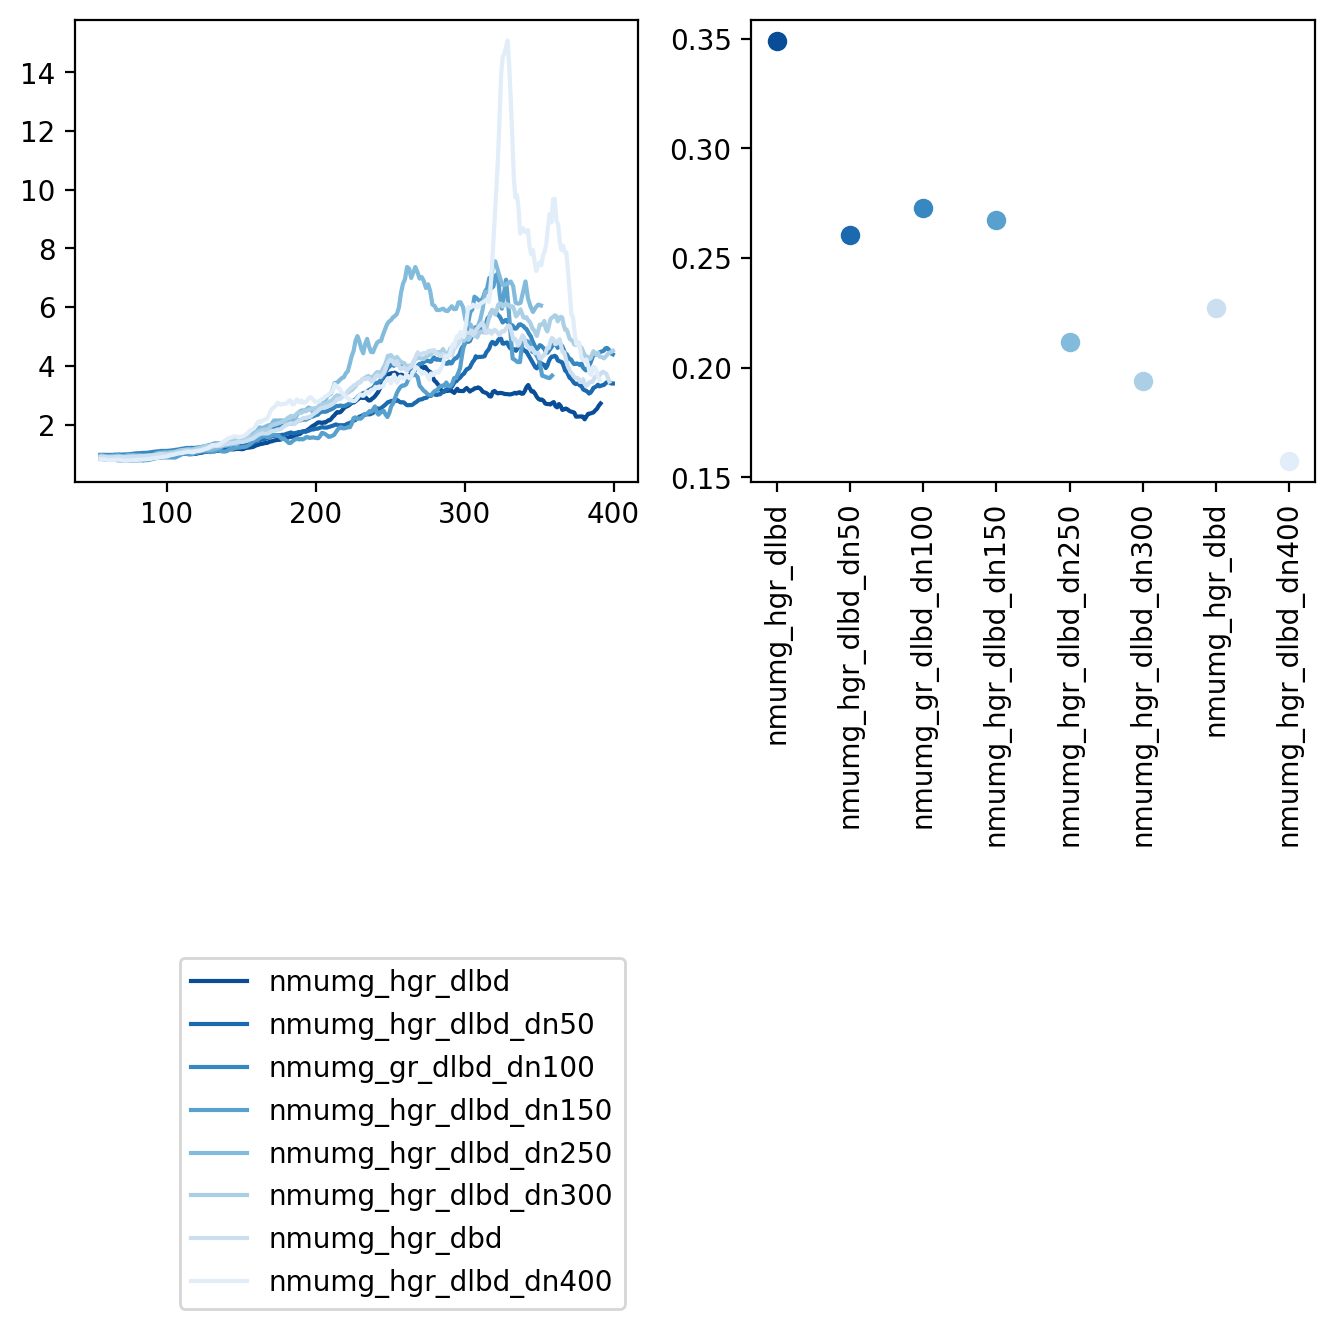

In [39]:
fig, (ax,ax1) = plt.subplots(1,2, sharey=False, figsize=(8,3))
palette = sns.color_palette('Blues_r', n_colors=len(sig_dict))
rmsed = dict()
i=0
for (key, value), color in zip(sig_dict.items(), palette):
    sum_mid = value['AP1'].iloc[:, 450:550].mean(axis=1)
    t = pd.concat([sum_mid, value['AP1'].iloc[:, -1], value['AP1'].query("absdist<450").apply(lambda x: x[450-x['absdist']:550-x['absdist']].mean(), axis=1)], axis=1).dropna()
    smoothed = t.groupby('absdist').mean().reset_index().rolling(window=100, center=False).apply(lambda x: stats.trim_mean(x, 0.1)).dropna()
    val = smoothed.iloc[-100:,1].mean()/smoothed.iloc[:100,1].mean()

    ax.plot(smoothed.absdist, smoothed.iloc[:, 2]/smoothed.iloc[:, 1], label=key, c=color)
    ax1.scatter(i, val, c=color,)
    i+=1
ax1.set_xticks(np.arange(len(keys)), keys, rotation=90)
ax.legend(bbox_to_anchor=[1,-1])
fig.savefig('figures/Fig6/truncations_ap1_gr.pdf')

/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curr

AP1


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curr

AP1


/tmp/ipykernel_2655029/2465768189.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(i, val, c=color,)
/tmp/ipykernel_2655029/2465768189.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(i, val, c=color,)


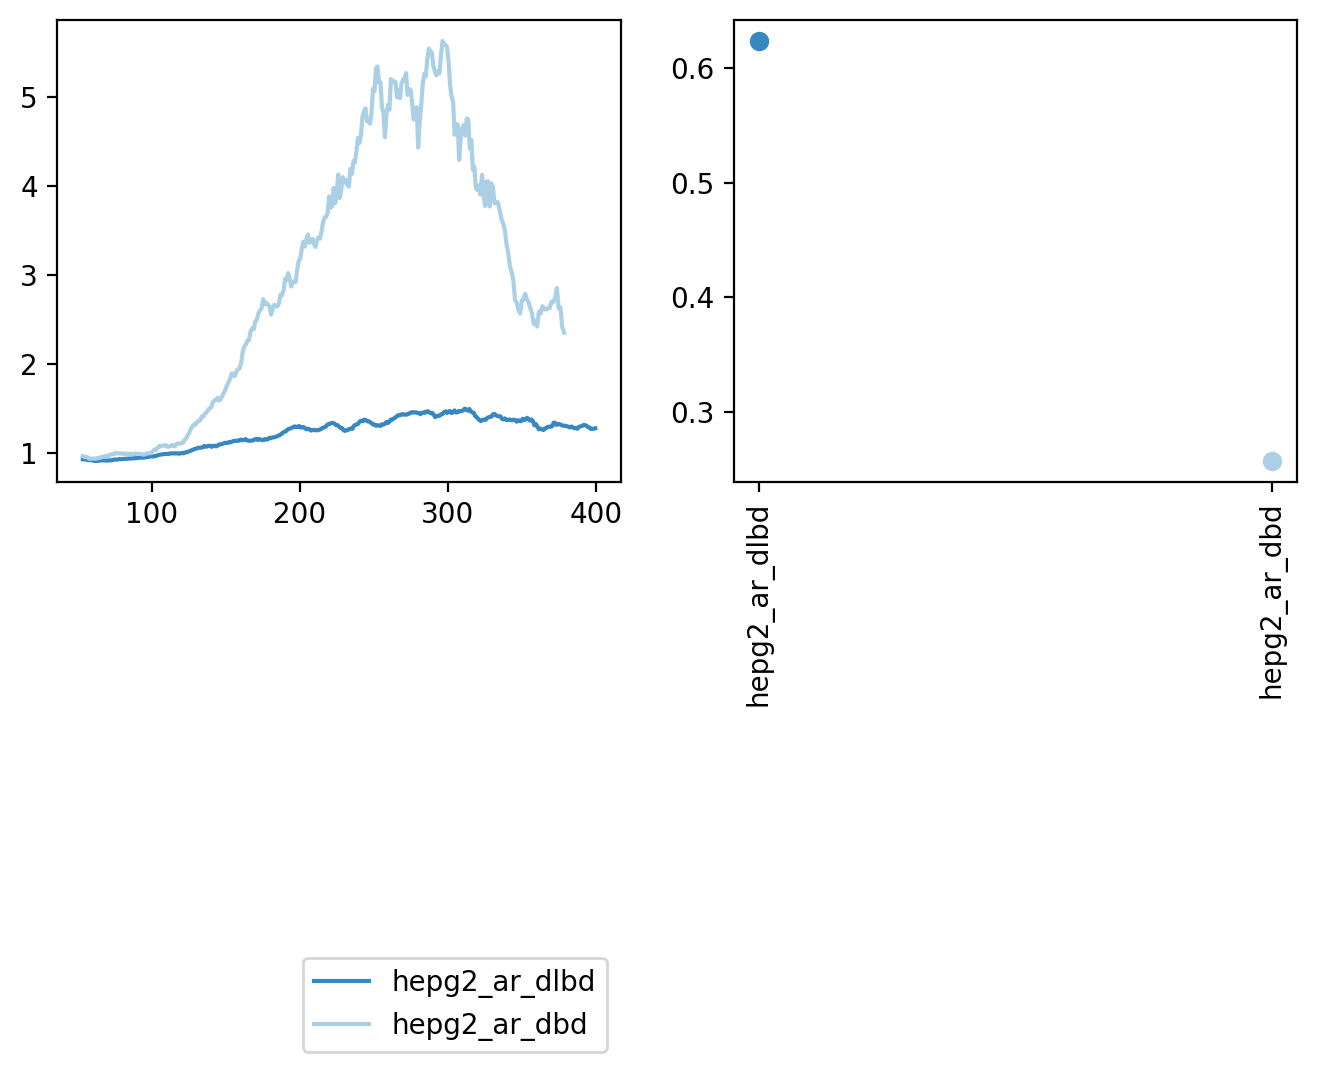

In [40]:
keys =['hepg2_ar_dlbd', 'hepg2_ar_dbd']


mlist = ['AP1']

# fig, ax = plt.subplots(1)
sig_dict = dict()
for i in keys:
    params, cpeak, lf = prep_peak_fimos(i, 'AR', metadata)
    mid_m, npeaks, cpyranges = calculate_motif_distances(f'combined_threshed_peaks_wsummits/output_fimo_fasta_{i}_fc10_AR_NR_mot/fimo.gff', 'AR_NR_mot', loaded_fimos=lf, peak= cpeak)
    cavbw = average_bgs(params.NormBG)

    cmd, cfps = extract_signals_with_dists(mid_m.filter(regex='Chromosome|NR_'),cavbw, mlist, cpyranges)
    sig_dict[i] = cfps

fig, (ax,ax1) = plt.subplots(1,2, sharey=False, figsize=(8,3))
palette = sns.color_palette('Blues_r', n_colors=len(sig_dict))
rmsed = dict()
i=0
for (key, value), color in zip(sig_dict.items(), palette):
    sum_mid = value['AP1'].iloc[:, 450:550].mean(axis=1)
    t = pd.concat([sum_mid, value['AP1'].iloc[:, -1], value['AP1'].query("absdist<450").apply(lambda x: x[450-x['absdist']:550-x['absdist']].mean(), axis=1)], axis=1).dropna()
    smoothed = t.groupby('absdist').mean().reset_index().rolling(window=100, center=False).apply(lambda x: stats.trim_mean(x, 0.1)).dropna()
    val = smoothed.iloc[-100:,1].mean()/smoothed.iloc[:100,1].mean()

    ax.plot(smoothed.absdist, smoothed.iloc[:, 2]/smoothed.iloc[:, 1], label=key, c=color)
    ax1.scatter(i, val, c=color,)
    i+=1
ax1.set_xticks(np.arange(len(keys)), keys, rotation=90)
ax.legend(bbox_to_anchor=[1,-1])
fig.savefig('figures/Fig6/hepg2_ap1_ratios_ar.pdf')

/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curr

AP1


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.
/home/labs/barkailab/vovam/.local/lib/python

AP1


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_removed = df.groupby(["Chromosome", "Strand"])
join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.
/tmp/ipykernel_2655029/2414906556.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(i, val, c=color,)
/tmp/ipykernel_2655

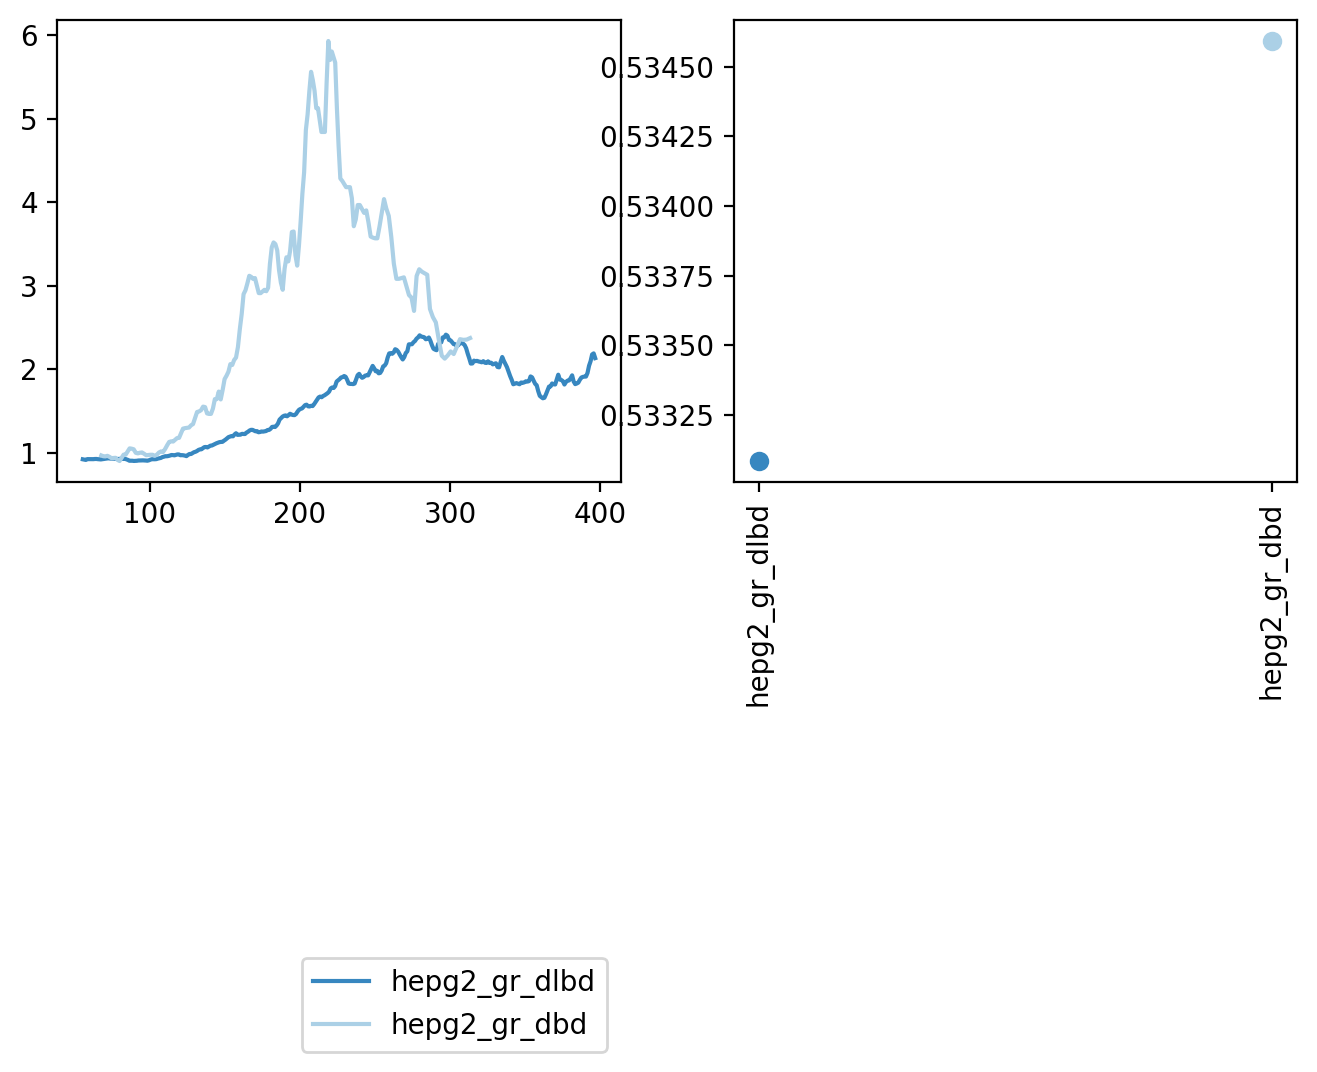

In [41]:
keys =['hepg2_gr_dlbd', 'hepg2_gr_dbd']


mlist = ['AP1']

# fig, ax = plt.subplots(1)
sig_dict = dict()
for i in keys:
    params, cpeak, lf = prep_peak_fimos(i, 'GR', metadata)
    mid_m, npeaks, cpyranges = calculate_motif_distances(f'combined_threshed_peaks_wsummits/output_fimo_fasta_{i}_fc10_GR_NR_mot/fimo.gff', 'GR_NR_mot', loaded_fimos=lf, peak= cpeak)
    cavbw = average_bgs(params.NormBG)

    cmd, cfps = extract_signals_with_dists(mid_m.filter(regex='Chromosome|NR_'),cavbw, mlist, cpyranges)
    sig_dict[i] = cfps

fig, (ax,ax1) = plt.subplots(1,2, sharey=False, figsize=(8,3))
palette = sns.color_palette('Blues_r', n_colors=len(sig_dict))
rmsed = dict()
i=0
for (key, value), color in zip(sig_dict.items(), palette):
    sum_mid = value['AP1'].iloc[:, 450:550].mean(axis=1)
    t = pd.concat([sum_mid, value['AP1'].iloc[:, -1], value['AP1'].query("absdist<450").apply(lambda x: x[450-x['absdist']:550-x['absdist']].mean(), axis=1)], axis=1).dropna()
    smoothed = t.groupby('absdist').mean().reset_index().rolling(window=100, center=False).apply(lambda x: stats.trim_mean(x, 0.1)).dropna()
    val = smoothed.iloc[-100:,1].mean()/smoothed.iloc[:100,1].mean()

    ax.plot(smoothed.absdist, smoothed.iloc[:, 2]/smoothed.iloc[:, 1], label=key, c=color)
    ax1.scatter(i, val, c=color,)
    i+=1
ax1.set_xticks(np.arange(len(keys)), keys, rotation=90)
ax.legend(bbox_to_anchor=[1,-1])
fig.savefig('figures/Fig6/hepg2_ap1_ratios_gr.pdf')

/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curr

AP1


/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/labs/barkailab/vovam/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curr

AP1


/tmp/ipykernel_2655029/1950152262.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(i, val, c=color,)
/tmp/ipykernel_2655029/1950152262.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(i, val, c=color,)


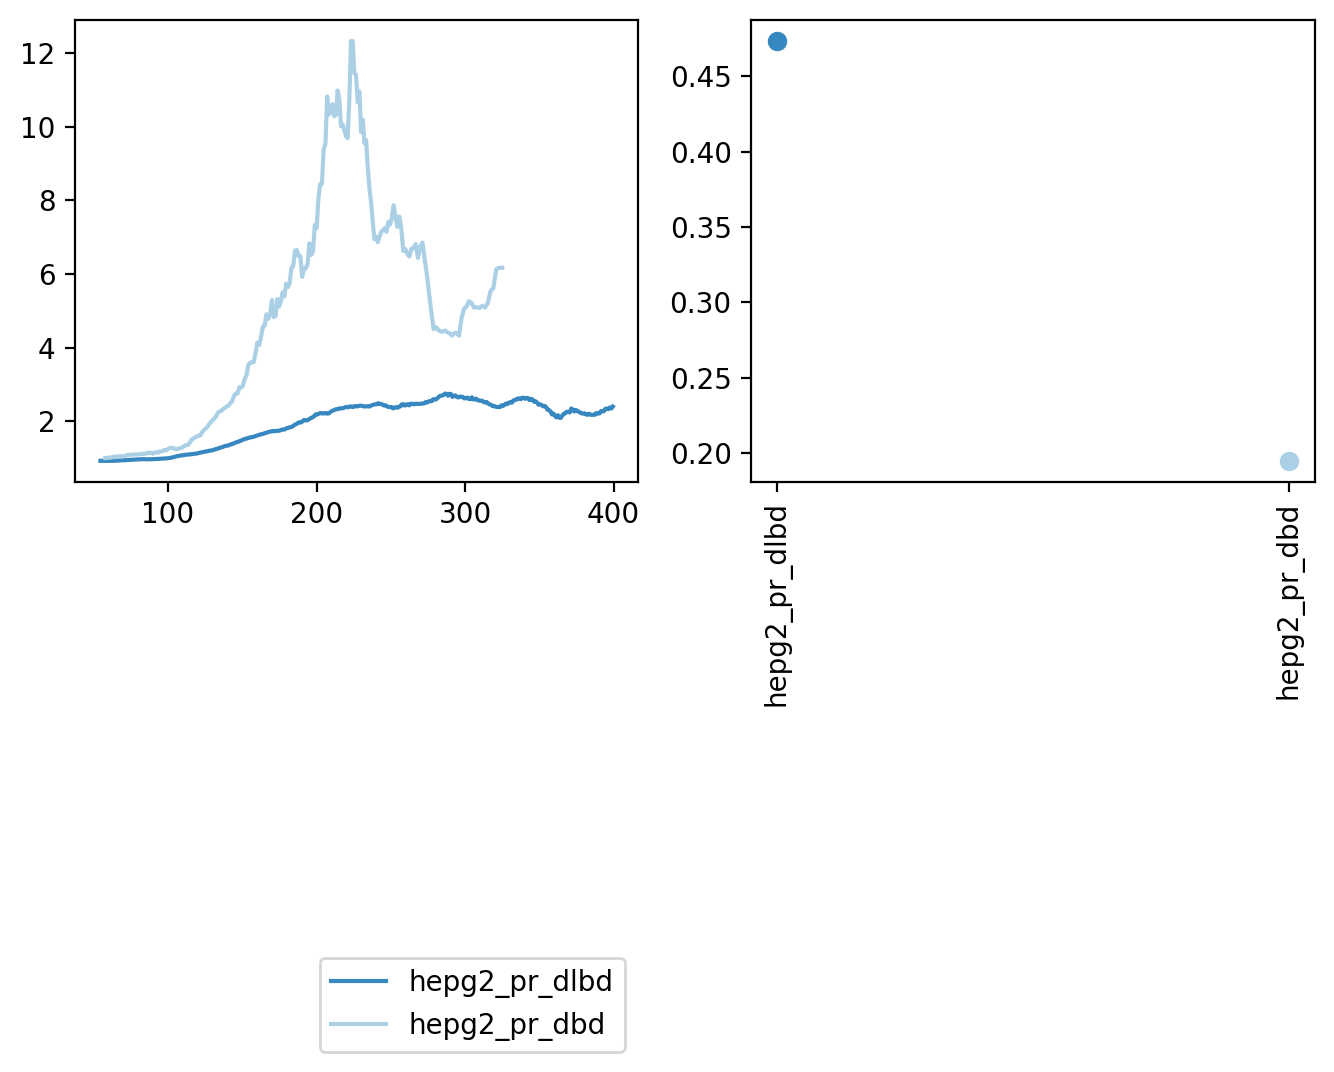

In [42]:
keys =['hepg2_pr_dlbd', 'hepg2_pr_dbd']


mlist = ['AP1']

# fig, ax = plt.subplots(1)
sig_dict = dict()
for i in keys:
    params, cpeak, lf = prep_peak_fimos(i, 'PR', metadata)
    mid_m, npeaks, cpyranges = calculate_motif_distances(f'combined_threshed_peaks_wsummits/output_fimo_fasta_{i}_fc10_PR_NR_mot/fimo.gff', 'PR_NR_mot', loaded_fimos=lf, peak= cpeak)
    cavbw = average_bgs(params.NormBG)

    cmd, cfps = extract_signals_with_dists(mid_m.filter(regex='Chromosome|NR_'),cavbw, mlist, cpyranges)
    sig_dict[i] = cfps

fig, (ax,ax1) = plt.subplots(1,2, sharey=False, figsize=(8,3))
palette = sns.color_palette('Blues_r', n_colors=len(sig_dict))
rmsed = dict()
i=0
for (key, value), color in zip(sig_dict.items(), palette):
    sum_mid = value['AP1'].iloc[:, 450:550].mean(axis=1)
    t = pd.concat([sum_mid, value['AP1'].iloc[:, -1], value['AP1'].query("absdist<450").apply(lambda x: x[450-x['absdist']:550-x['absdist']].mean(), axis=1)], axis=1).dropna()
    smoothed = t.groupby('absdist').mean().reset_index().rolling(window=100, center=False).apply(lambda x: stats.trim_mean(x, 0.1)).dropna()
    val = smoothed.iloc[-100:,1].mean()/smoothed.iloc[:100,1].mean()

    ax.plot(smoothed.absdist, smoothed.iloc[:, 2]/smoothed.iloc[:, 1], label=key, c=color)
    ax1.scatter(i, val, c=color,)
    i+=1
ax1.set_xticks(np.arange(len(keys)), keys, rotation=90)
ax.legend(bbox_to_anchor=[1,-1])
fig.savefig('figures/Fig6/hepg2_ap1_ratios_pr.pdf')

/tmp/ipykernel_2655029/4080449369.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ins.set_yticklabels(ins.get_yticklabels(), size=5)
/tmp/ipykernel_2655029/4080449369.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ins.set_yticklabels(ins.get_yticklabels(), size=5)
/tmp/ipykernel_2655029/4080449369.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ins.set_yticklabels(ins.get_yticklabels(), size=5)
/tmp/ipykernel_2655029/4080449369.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ins.set_yticklabels(ins.get_yticklabels(), size=5)
/tmp/ipykernel_2655029/4080449369.py:160: UserWarning: set_ticklabels() should only be used with a fixed num

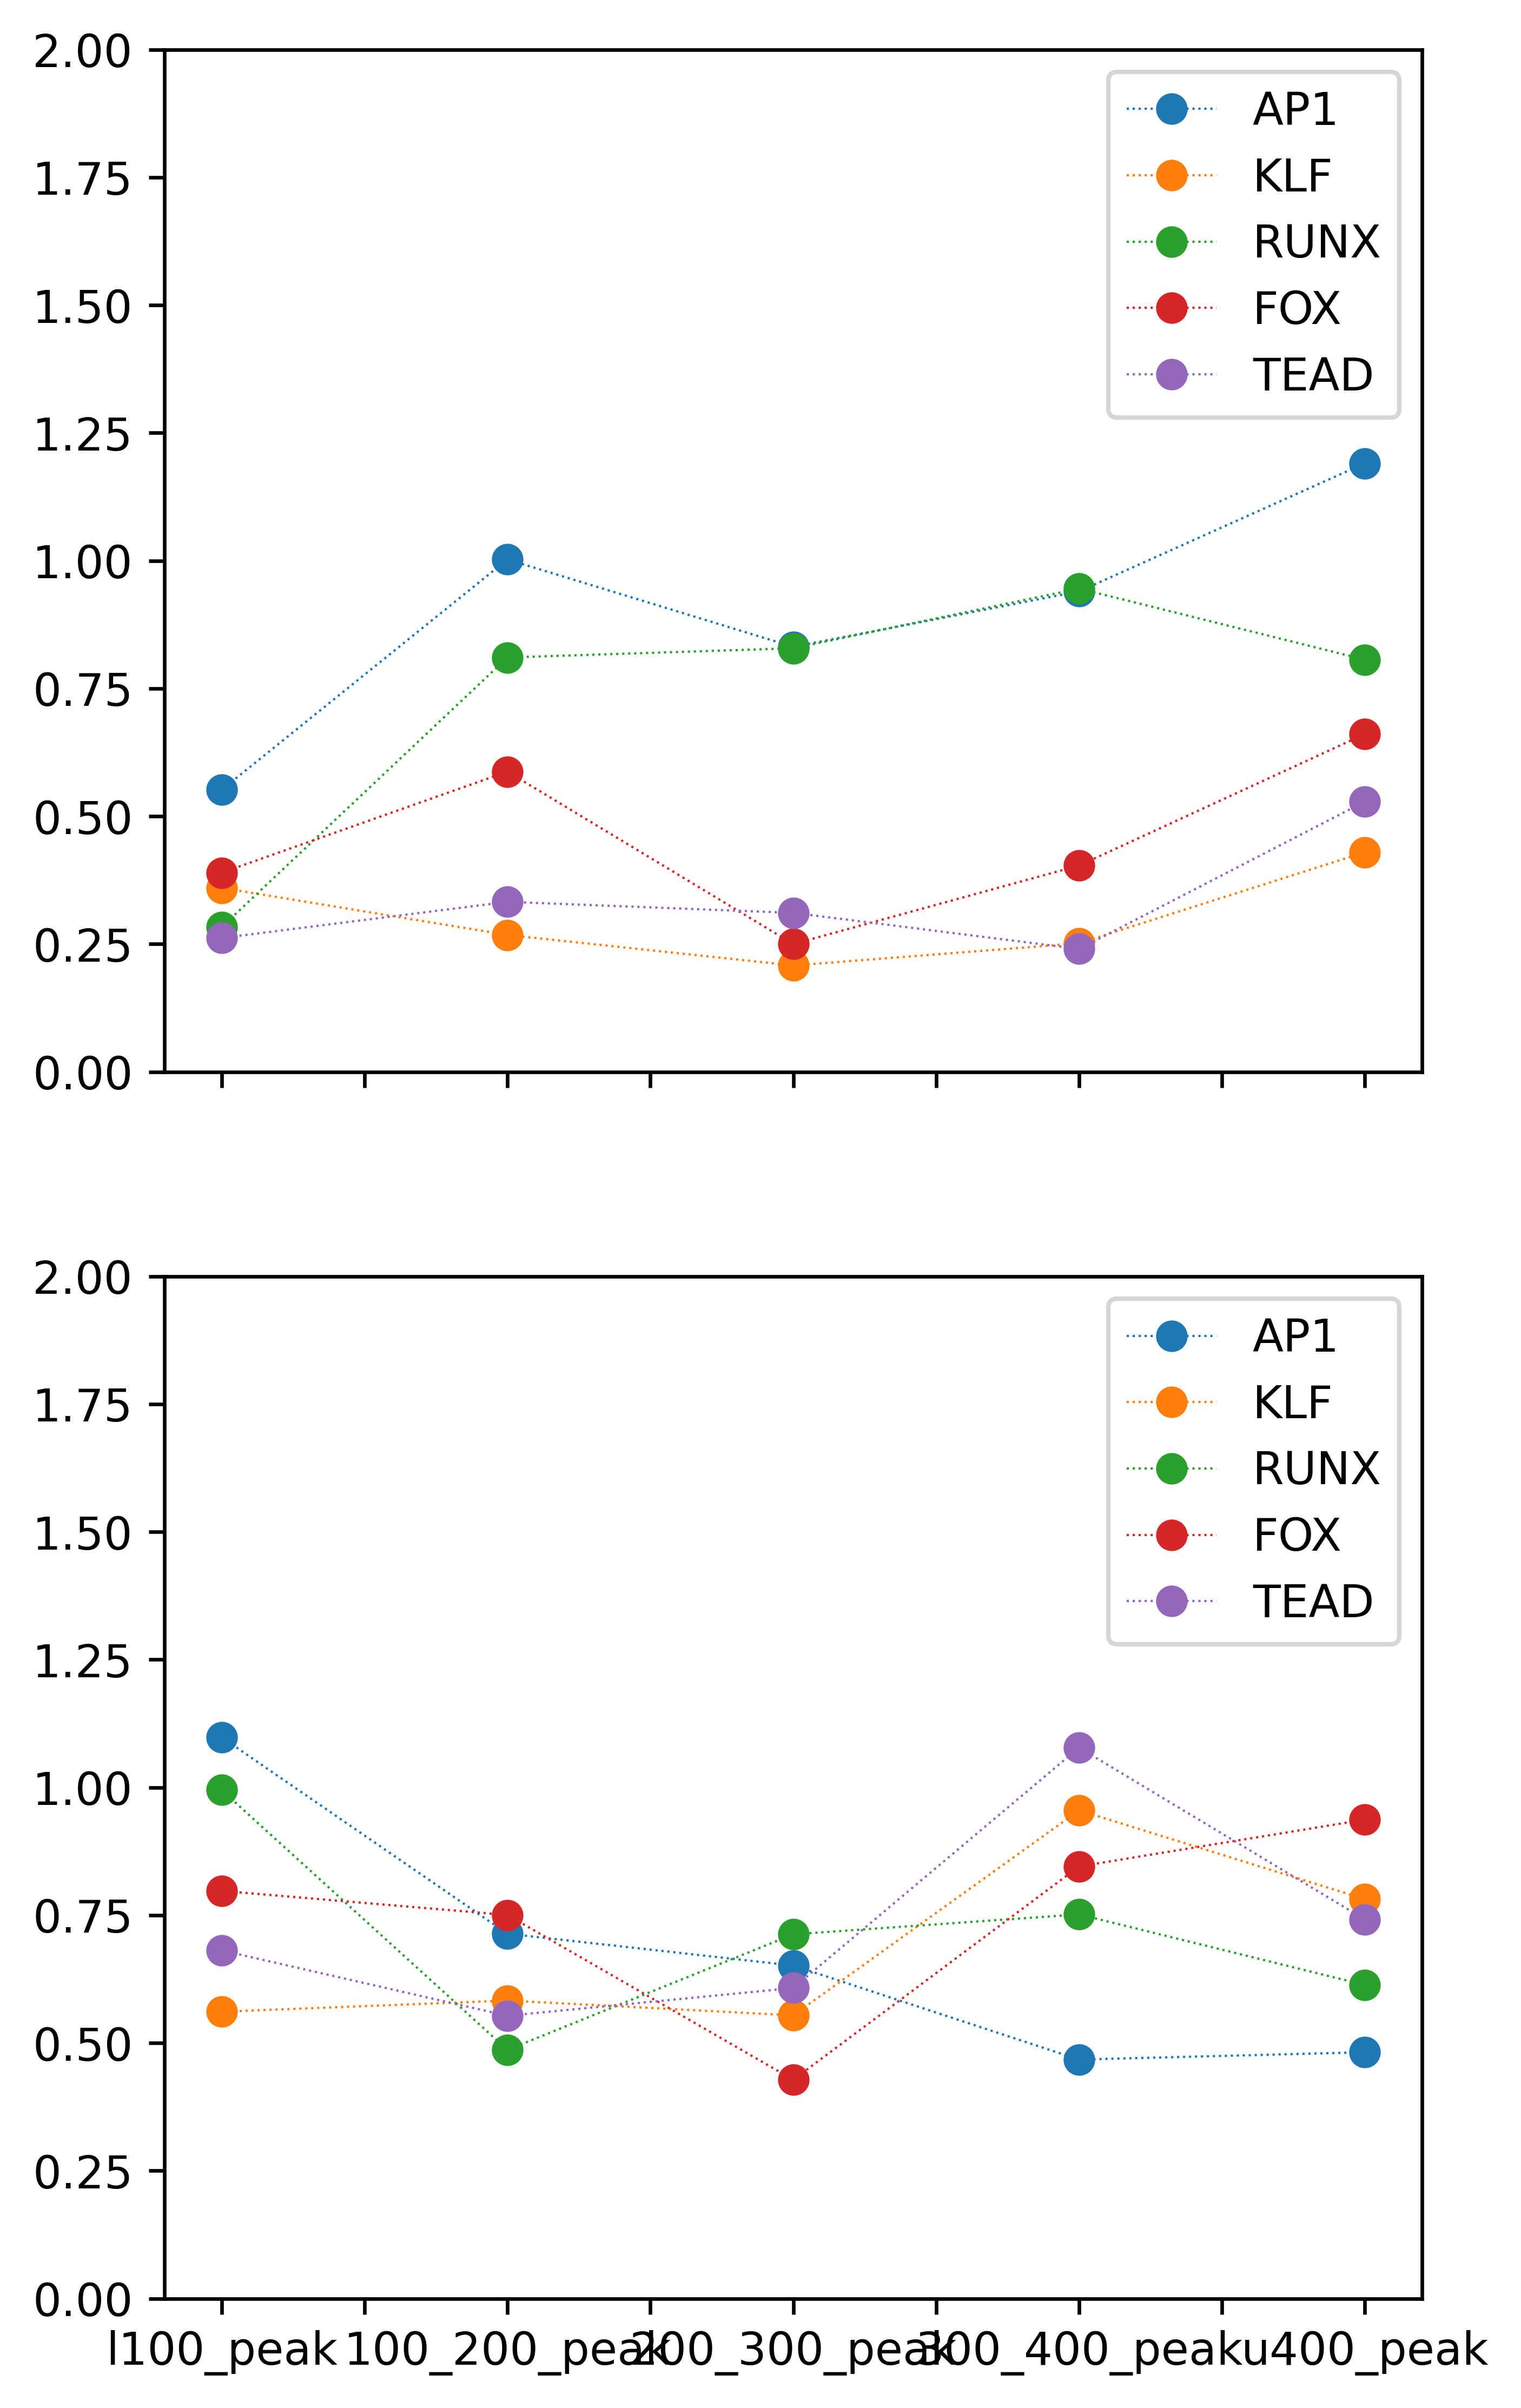

In [50]:
mlist = ['AP1', 'KLF', 'RUNX', 'FOX', 'TEAD']

rmsear, fig, f2 = plot_profiles(means_dist_arlig, fps_arlig, mlist)

plt.close(fig)
plt.close(f2)

stats_df = pd.DataFrame(rmsear)
fig, ax = plt.subplots(2,1, sharey=True, figsize=(5,9), sharex=True, dpi=300)
stats_df.filter(regex='rmse', axis=0).plot(ax=ax[0], marker='o', lw=0.5, ls=':', )
stats_df.filter(regex='peak', axis=0).plot(ax=ax[1], marker='o', lw=0.5, ls=':')
ax[0].set_ylim([0,2])

fig.savefig('figures/Fig1/interactions_summary_ar.pdf')

/tmp/ipykernel_2655029/4080449369.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ins.set_yticklabels(ins.get_yticklabels(), size=5)
/tmp/ipykernel_2655029/4080449369.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ins.set_yticklabels(ins.get_yticklabels(), size=5)
/tmp/ipykernel_2655029/4080449369.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ins.set_yticklabels(ins.get_yticklabels(), size=5)
/tmp/ipykernel_2655029/4080449369.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ins.set_yticklabels(ins.get_yticklabels(), size=5)
/tmp/ipykernel_2655029/4080449369.py:160: UserWarning: set_ticklabels() should only be used with a fixed num

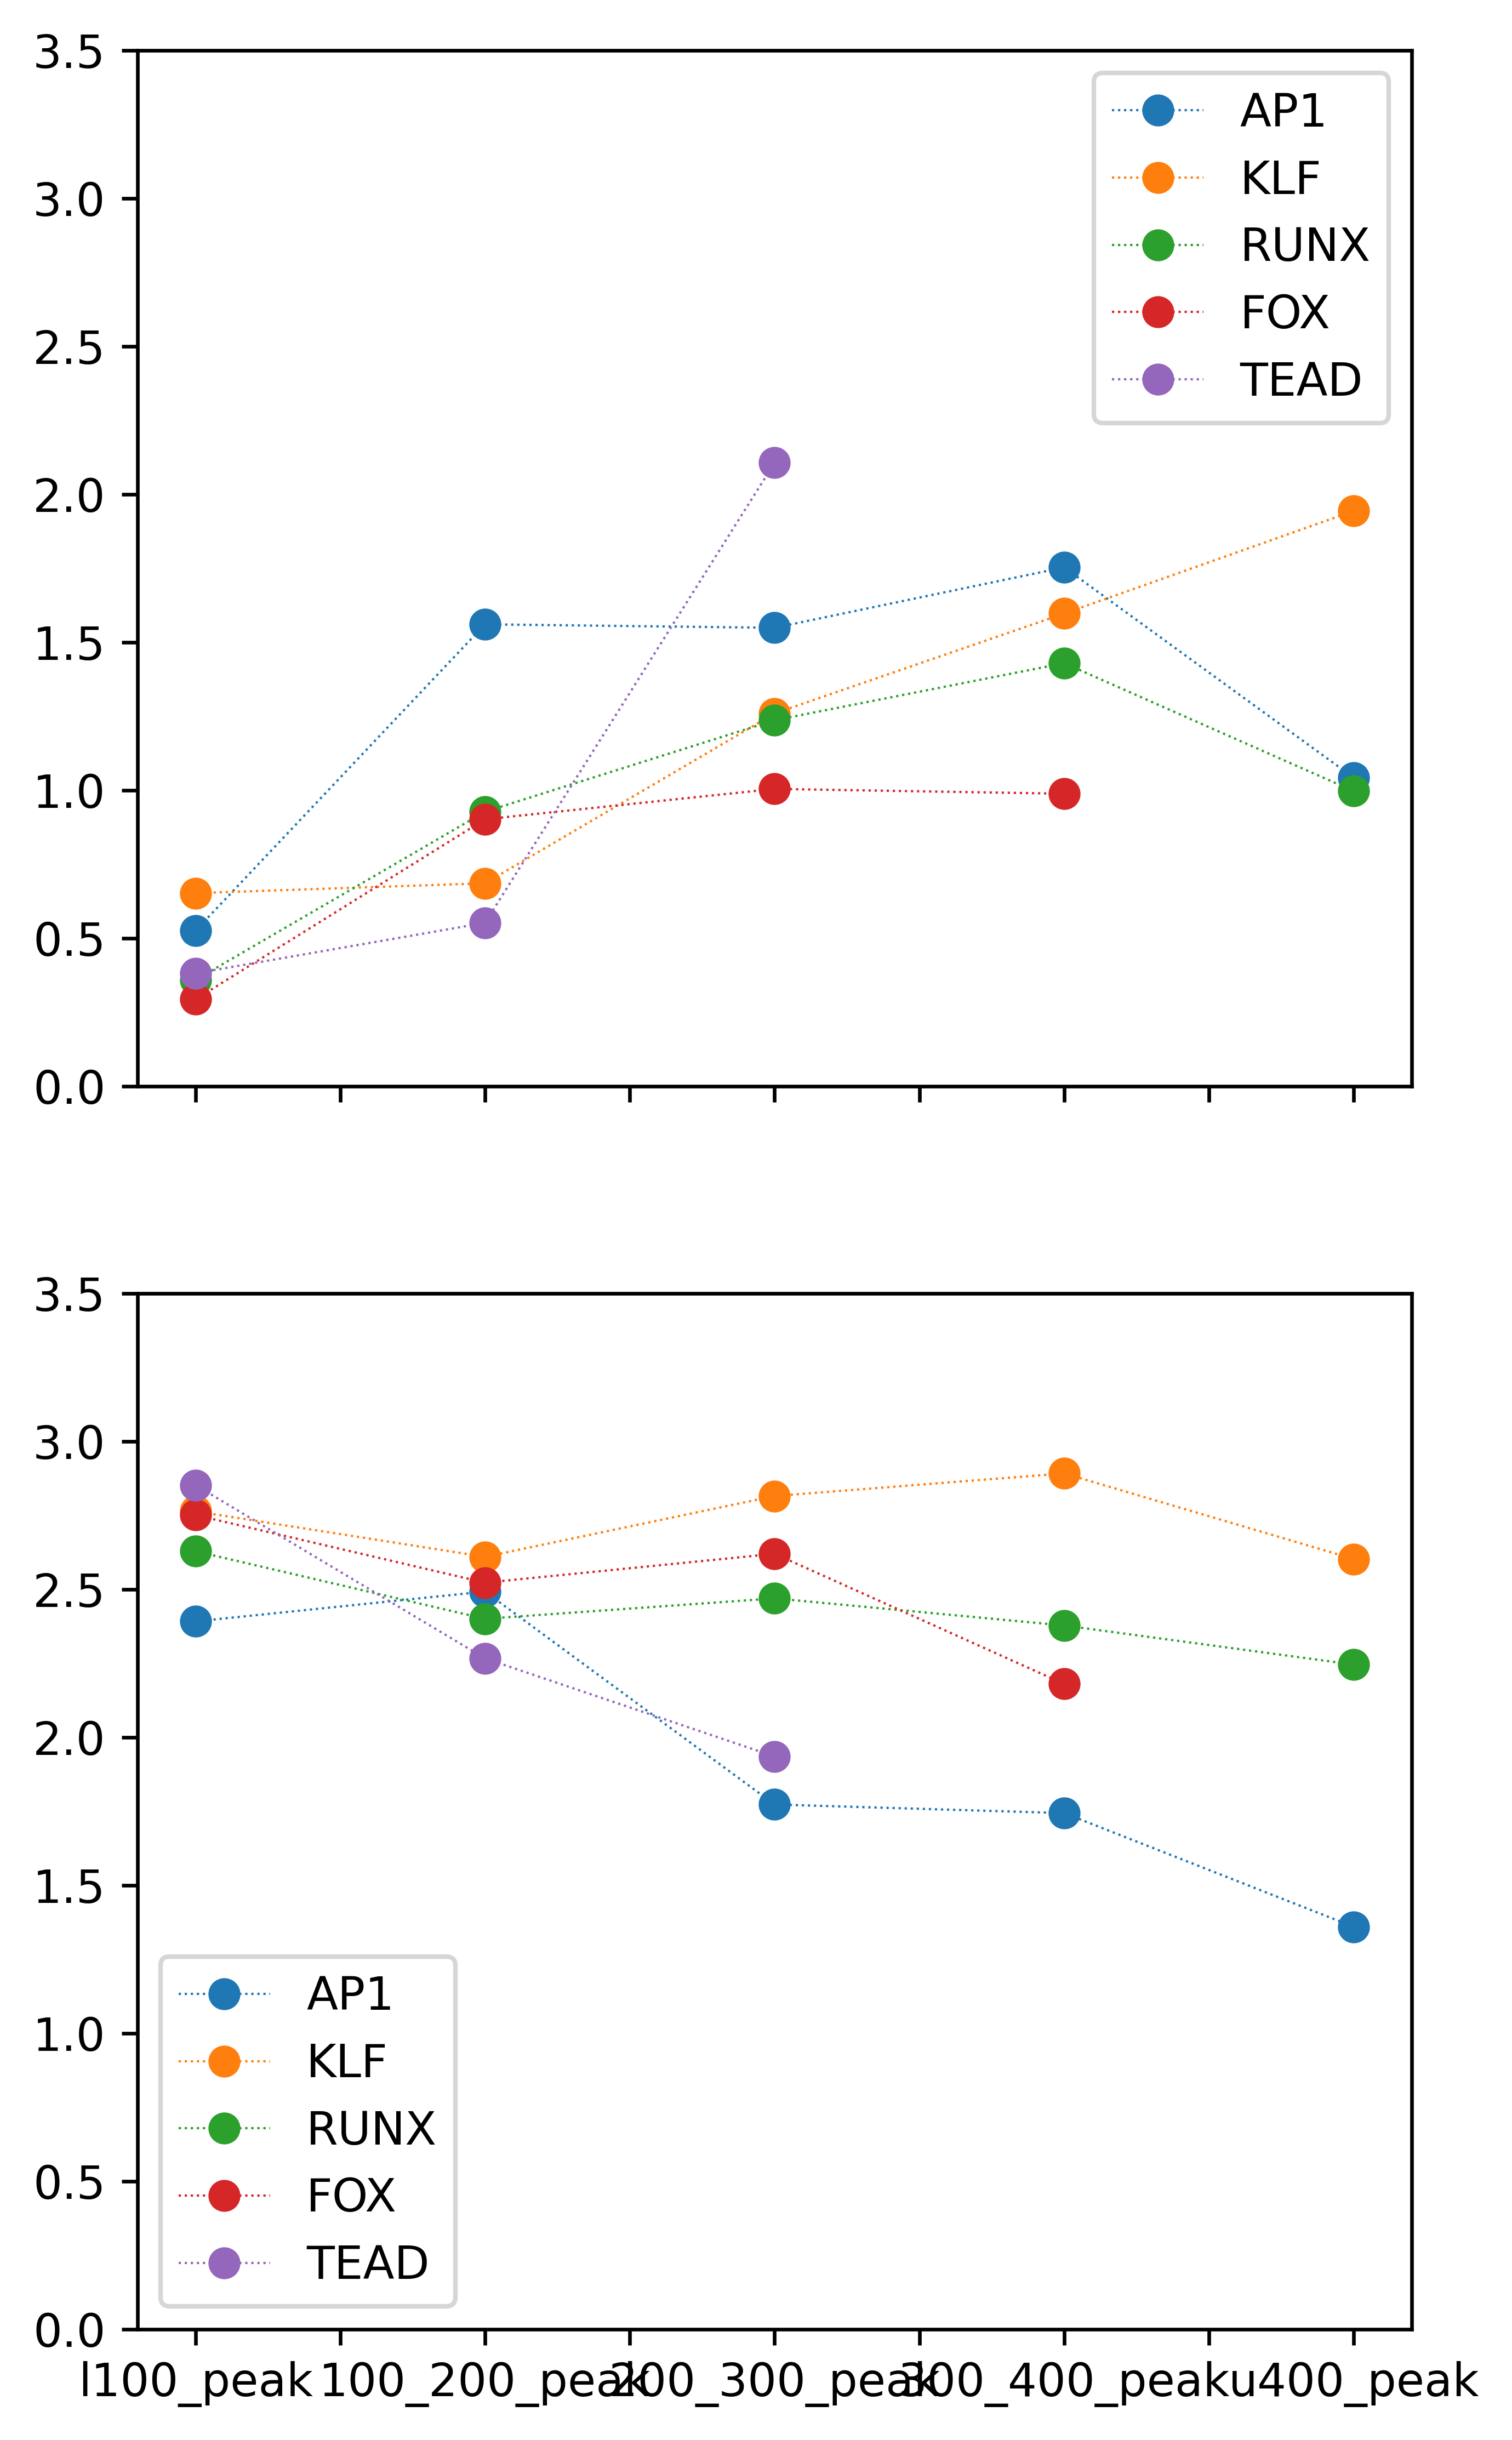

In [54]:
mlist = ['AP1', 'KLF', 'RUNX', 'FOX', 'TEAD']

rmsepr, fig, f2 = plot_profiles(means_dist_prlig, fps_prlig, mlist)

plt.close(fig)
plt.close(f2)

stats_df = pd.DataFrame(rmsepr)
fig, ax = plt.subplots(2,1, sharey=True, figsize=(5,9), sharex=True, dpi=300)
stats_df.filter(regex='rmse', axis=0).plot(ax=ax[0], marker='o', lw=0.5, ls=':', )
stats_df.filter(regex='peak', axis=0).plot(ax=ax[1], marker='o', lw=0.5, ls=':')
ax[0].set_ylim([0,3.5])

fig.savefig('figures/Fig1/interactions_summary_pr.pdf')